## Est. of growing stock, biomass and RN content use UAV survey

# Load all data from .xlsx file

In [1]:
# Import main libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import shap

In [2]:
# Load biomass dataset
site_data = '../05_input_data/Sites_with_Sentinel_bands_data.xlsx'
df = pd.read_excel(site_data, sheet_name='input_2020')
df.head()

,Site #,Origin,Dominant_s,LN_GS_cub_m,LN_M_stem_kg_m2,LN_M_stem_bark_kg_m2,LN_M_crown_kg_m2,LN_M_foliage_kg_m2,LN_M_AG_kg_m2,X_N36,...,r2020B04,r2020B05,r2020B06,r2020B07,r2020B08,r2020B09,r2020B10,r2020B11,r2020B12,r2020B13
0,1,n,Birch,4.771,1.792,-0.211,-0.261,-2.040,1.932,298987.203,...,0.254417,0.175280,0.086611,0.797761,-0.749311,0.491270,-15.527246,-11.385074,0.733806,0.040781
1,2,a,Pine,5.808,2.496,-0.073,0.392,-0.139,2.674,299016.572,...,0.189826,0.092225,0.047120,0.789129,-0.705355,0.659775,-16.547673,-10.947565,0.661723,-0.102776
2,3,a,Pine,5.796,2.546,0.030,0.501,-0.030,2.734,299072.773,...,0.204363,0.093062,0.043824,0.812120,-0.704758,0.631348,-14.341917,-11.884799,0.829603,-0.063200
3,4,a,Pine,5.826,2.643,0.000,0.419,-0.431,2.785,299152.693,...,0.187998,0.102872,0.048585,0.762431,-0.695416,0.601894,-14.885610,-11.725163,0.787609,-0.057177
4,5,a,Pine,6.059,2.643,0.122,0.647,-0.386,2.809,299249.689,...,0.216271,0.096981,0.044880,0.793606,-0.717562,0.642942,-14.647913,-11.512282,0.785698,-0.073830


# List of all parameters for est. of bioproductivity and RN content
"""
All parameters:
'Site #', 'Origin', 'Dominant_s', 'LN_GS_cub_m', 'LN_M_stem_kg_m2', 'LN_M_stem_bark_kg_m2', 'LN_M_crown_kg_m2', 'LN_M_foliage_kg_m2', 'LN_M_AG_kg_m2', 'F_Soil', 'M_Soil', 'X_N36', 'Y_N36', 'Cs_wood_Bq/kg', 'Sr_wood_Bq/kg', 'LN_Cs_wood', 'LN_Sr_wood', 'Tag_Cs', 'Tag_Sr', 'LN_Tag_Cs', 'LN_Tag_Sr', 'Cs_2021_kB', 'Sr_2021_kB', 'AEDR_mean', 'r2019B01', 'r2019B02', 'r2019B03', 'r2019B04', 'r2019B05', 'r2019B06', 'r2019B07', 'r2019B08', 'r2019B09', 'r2019B10', 'r2019B11', 'r2019B12'
"""

In [3]:
# Selecting main working parameters
select = pd.DataFrame(df, columns=['LN_GS_cub_m', 'LN_M_stem_kg_m2', 'LN_M_stem_bark_kg_m2', 'LN_M_crown_kg_m2', 'LN_M_foliage_kg_m2', 'LN_M_AG_kg_m2', 'LN_Tag_Cs', 'LN_Tag_Sr',
                                  'r2020B01', 'r2020B02', 'r2020B03', 'r2020B04', 'r2020B05', 'r2020B06', 'r2020B07', 'r2020B08', 'r2020B09', 'r2020B10', 'r2020B11', 'r2020B12'])

# Show the first five columns
select.head()

,LN_GS_cub_m,LN_M_stem_kg_m2,LN_M_stem_bark_kg_m2,LN_M_crown_kg_m2,LN_M_foliage_kg_m2,LN_M_AG_kg_m2,LN_Tag_Cs,LN_Tag_Sr,r2020B01,r2020B02,r2020B03,r2020B04,r2020B05,r2020B06,r2020B07,r2020B08,r2020B09,r2020B10,r2020B11,r2020B12
0,4.771,1.792,-0.211,-0.261,-2.040,1.932,-0.73,2.58,0.019397,0.035344,0.028616,0.254417,0.175280,0.086611,0.797761,-0.749311,0.491270,-15.527246,-11.385074,0.733806
1,5.808,2.496,-0.073,0.392,-0.139,2.674,0.59,2.92,0.019167,0.033537,0.022230,0.189826,0.092225,0.047120,0.789129,-0.705355,0.659775,-16.547673,-10.947565,0.661723
2,5.796,2.546,0.030,0.501,-0.030,2.734,0.78,2.88,0.019568,0.035957,0.021190,0.204363,0.093062,0.043824,0.812120,-0.704758,0.631348,-14.341917,-11.884799,0.829603
3,5.826,2.643,0.000,0.419,-0.431,2.785,0.52,2.72,0.020556,0.033868,0.025284,0.187998,0.102872,0.048585,0.762431,-0.695416,0.601894,-14.885610,-11.725163,0.787609
4,6.059,2.643,0.122,0.647,-0.386,2.809,0.22,2.83,0.019003,0.036153,0.024911,0.216271,0.096981,0.044880,0.793606,-0.717562,0.642942,-14.647913,-11.512282,0.785698


# Pre-analysis of parameters

In [4]:
# Information on all columns of data frame
select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   LN_GS_cub_m           198 non-null    float64
 1   LN_M_stem_kg_m2       198 non-null    float64
 2   LN_M_stem_bark_kg_m2  198 non-null    float64
 3   LN_M_crown_kg_m2      198 non-null    float64
 4   LN_M_foliage_kg_m2    198 non-null    float64
 5   LN_M_AG_kg_m2         198 non-null    float64
 6   LN_Tag_Cs             198 non-null    float64
 7   LN_Tag_Sr             198 non-null    float64
 8   r2020B01              198 non-null    float64
 9   r2020B02              198 non-null    float64
 10  r2020B03              198 non-null    float64
 11  r2020B04              198 non-null    float64
 12  r2020B05              198 non-null    float64
 13  r2020B06              198 non-null    float64
 14  r2020B07              198 non-null    float64
 15  r2020B08              1

In [5]:
# Discribe statistic of forest sites by species and origin
df.groupby(["Dominant_s"])["LN_GS_cub_m", "LN_M_AG_kg_m2"].describe()

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


LN_GS_cub_m                                                   \
                 count      mean       std    min     25%    50%    75%   
Dominant_s                                                                
Alder             13.0  5.954615  0.321593  5.342  5.7620  6.023  6.205   
Aspen              7.0  5.382429  0.530860  4.844  4.9900  5.231  5.713   
Birch             45.0  4.897244  0.745395  2.398  4.6440  5.004  5.366   
Oak                9.0  5.213444  0.513140  4.344  4.7710  5.460  5.642   
Pine             123.0  5.270488  1.252592  1.609  4.9665  5.784  6.100   
Spruce             1.0  6.431000       NaN  6.431  6.4310  6.431  6.431   

                  LN_M_AG_kg_m2                                            \
              max         count      mean       std    min     25%    50%   
Dominant_s                                                                  
Alder       6.330          13.0  2.891692  0.293107  2.407  2.6530  2.970   
Aspen       6.196           7.0  2.459000  0.532848  1.902  2.0420  2.370   
Birch       5.858          45.0  2.051800  0.678888  0.000  1.7580  2.219   
Oak         5.765           9.0  2.459333  0.507916  1.569  2.0010  2.715   
Pine        6.457         123.0  2.305008  1.053778 -0.693  2.0605  2.681   
Spruce      6.431           1.0  3.506000       NaN  3.506  3.5060  3.506   

                           
               75%    max  
Dominant_s                 
Alder       3.1350  3.258  
Aspen       2.8375  3.182  
Birch       2.5260  2.923  
Oak         2.8150  3.025  
Pine        3.0110  3.515  
Spruce      3.5060  3.506

In [6]:
# Descriptive statistics of main parameters
select.describe()

,LN_GS_cub_m,LN_M_stem_kg_m2,LN_M_stem_bark_kg_m2,LN_M_crown_kg_m2,LN_M_foliage_kg_m2,LN_M_AG_kg_m2,LN_Tag_Cs,LN_Tag_Sr,r2020B01,r2020B02,r2020B03,r2020B04,r2020B05,r2020B06,r2020B07,r2020B08,r2020B09,r2020B10,r2020B11,r2020B12
count,198.000000,198.000000,198.00000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000
mean,5.237803,2.109995,-0.11297,0.075646,-0.970066,2.304505,-0.566313,2.340253,0.022479,0.036321,0.027499,0.213645,0.125537,0.063662,0.767194,-0.703079,0.540963,-16.145709,-10.863669,0.675418
std,1.091051,1.039582,0.78467,0.711102,0.713109,0.928222,1.248087,0.938549,0.005381,0.006531,0.009532,0.042641,0.035475,0.023731,0.078273,0.060738,0.132304,1.343250,1.161017,0.069250
min,1.609000,-1.347000,-2.65900,-2.408000,-3.507000,-0.693000,-4.680000,-0.250000,0.012648,0.024838,0.014640,0.124161,0.079896,0.036570,0.381333,-0.823403,0.038198,-22.517731,-14.262763,0.492975
25%,4.914250,1.797000,-0.27075,-0.148000,-1.514000,2.001000,-1.327500,1.742500,0.019615,0.033225,0.022284,0.187070,0.095832,0.046290,0.745438,-0.735205,0.502225,-16.970102,-11.519514,0.628884
50%,5.517000,2.413000,0.04400,0.289000,-0.788000,2.565000,-0.465000,2.460000,0.021938,0.035316,0.024743,0.204261,0.115558,0.058209,0.784239,-0.704881,0.577675,-16.010171,-10.784612,0.667561
75%,5.989750,2.798500,0.33250,0.531000,-0.386000,2.899750,0.380000,2.992500,0.023920,0.037919,0.028527,0.236440,0.150857,0.072122,0.808780,-0.680539,0.632284,-15.159997,-10.008004,0.720595
max,6.457000,3.428000,1.38400,1.756000,0.157000,3.515000,1.650000,4.660000,0.058966,0.075169,0.080615,0.369338,0.243667,0.187427,0.885319,-0.410944,0.710583,-13.281957,-7.650135,0.860863


# Selecting working columns for the XGBoost algorithms

In [7]:
# Choosing the predictor and independent variables
predictor = "LN_GS_cub_m"
indep_variables = ['r2020B01', 'r2020B03', 'r2020B05', 'r2020B06', 'r2020B07', 'r2020B10', 'r2020B11']


In [8]:
# Delete empty rows from the working column in a dataframe
nan_value = float("NaN")
select.replace("", nan_value, inplace=True)
select.dropna(subset = [predictor], inplace=True) # IMPOTANT - input name of column
print(select)

     LN_GS_cub_m  LN_M_stem_kg_m2  LN_M_stem_bark_kg_m2  LN_M_crown_kg_m2  \
0          4.771            1.792                -0.211            -0.261   
1          5.808            2.496                -0.073             0.392   
2          5.796            2.546                 0.030             0.501   
3          5.826            2.643                 0.000             0.419   
4          6.059            2.643                 0.122             0.647   
..           ...              ...                   ...               ...   
193        6.238            3.125                 0.322             0.560   
194        5.861            2.702                 0.058             0.482   
195        5.935            2.775                -0.030             0.372   
196        5.784            2.546                -0.117             0.182   
197        6.277            2.949                 0.182             0.501   

     LN_M_foliage_kg_m2  LN_M_AG_kg_m2  LN_Tag_Cs  LN_Tag_Sr  r2020B01  \
0

In [9]:
# We select independent variables and predicting parameter 
X = pd.DataFrame(select, columns=indep_variables)
y = pd.DataFrame(select, columns=[predictor])

In [10]:
# Columns in "X" data collections
X.head()

,r2020B01,r2020B03,r2020B05,r2020B06,r2020B07,r2020B10,r2020B11
0,0.019397,0.028616,0.175280,0.086611,0.797761,-15.527246,-11.385074
1,0.019167,0.022230,0.092225,0.047120,0.789129,-16.547673,-10.947565
2,0.019568,0.021190,0.093062,0.043824,0.812120,-14.341917,-11.884799
3,0.020556,0.025284,0.102872,0.048585,0.762431,-14.885610,-11.725163
4,0.019003,0.024911,0.096981,0.044880,0.793606,-14.647913,-11.512282


In [11]:
# Columns in "y" data collections
y.head()

,LN_GS_cub_m
0,4.771
1,5.808
2,5.796
3,5.826
4,6.059


# Create first XGBoost model for estimate varibiality of output stats

In [12]:
#  Importing the main library for building model and its analysis
import xgboost as xgb
from scipy.stats import uniform, randint
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold, RandomizedSearchCV, train_test_split
from sklearn.datasets import make_classification

In [13]:
# K-Folds cross-validation for estimation "quality" of input data for building model
X_kfold = pd.DataFrame(X).to_numpy()
y_kfold = pd.DataFrame(y).to_numpy()

In [14]:
# Function for comparing datasets on homogeneity 
def display_scores(scores):
    print("    Scores: {0}\n    Mean: {1:.3f}\n    Std: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))

In [15]:
# Output results of K-Folds cross-validation for XGBoost model
kfold = KFold(n_splits=3, shuffle=True)
scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(r2_score(y_test, y_pred))
    
print('R square (R2): \n')
display_scores((scores))
print('\n', 20*'-')


scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
      
    scores.append(mean_squared_error(y_test, y_pred))
    
print('Root-mean-square error (RMSE): \n')
display_scores(np.sqrt(scores))
print('\n', 20*'-')

scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(mean_absolute_error(y_test, y_pred))

print('Mean absolute error (MAE): \n')
display_scores((scores))
print('\n', 20*'-')

R square (R2): 

    Scores: [0.3366221314463138, 0.2990422802341457, 0.18222159949093897]
    Mean: 0.273
    Std: 0.066

 --------------------
Root-mean-square error (RMSE): 

    Scores: [0.79836415 0.83333389 1.00001507]
    Mean: 0.877
    Std: 0.088

 --------------------
Mean absolute error (MAE): 

    Scores: [0.6128628449873491, 0.6432532083048965, 0.6877429689927534]
    Mean: 0.648
    Std: 0.031

 --------------------


# Add optimal hyperparameters for XGBoost model

In [16]:
# Hyperparameters data for the next step/stage
p1 = 0.096116898742868                   # colsample_bytree
print('Colsample_bytree: ' + str(p1))

p2 = 0.45423317193339313                 # gamma
print('Gamma: ' + str(p2))

p3 = 0.050926550350538474                 # learning_rate
print('Learning_rate: ' + str(p3))

p4 = 3            # max_depth
print('Max_depth: ' + str(p4))

p5 = 92          # n_estimators
print('N_estimators: ' + str(p5))

p6 = 0.30591744767868656                  # subsample
print('Subsample: ' + str(p6))

Colsample_bytree: 0.096116898742868
Gamma: 0.45423317193339313
Learning_rate: 0.050926550350538474
Max_depth: 3
N_estimators: 92
Subsample: 0.30591744767868656


# Estimation of predictive quality to basic XGBoost models using Loops

In [17]:
# Create DMatrix (is an internal data structure) 
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [18]:
# Aggregate parameters
aggr_y=[]
aggr_y_pred=[]

aggr_optimal_n=[]
aggr_bias=[]
aggr_rel_bias=[]
aggr_rmse=[]
aggr_rel_rmse=[]
aggr_mse=[]
aggr_R_square=[]

exp_aggr_optimal_n=[]
exp_aggr_bias=[]
exp_aggr_rel_bias=[]
exp_aggr_rmse=[]
exp_aggr_rel_rmse=[]
exp_aggr_mse=[]
exp_aggr_R_square=[]

aggr_Shap_values=pd.DataFrame()

# Body loop
for i in range(200):
    
    # Generate test and training samples
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    #exp_y_train = np.exp(y_train)
    exp_y_test = np.exp(y_test)
    
    # Implementation of the scikit-learn API for XGBoost regression
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])
    
    # Fitting the model 
    xgb_model.fit(X_train, y_train, early_stopping_rounds=20, eval_set=[(X_train, y_train), (X_test, y_test)])
    
    # learning dynamics
    y_pred = xgb_model.predict(X_test, ntree_limit=xgb_model.best_ntree_limit)
    
    exp_y_pred = np.exp(y_pred)
    
    # Iteration with the best result
    optimal_n= xgb_model.best_ntree_limit-1
    
    # Convert data to 'array' type
    conv_y_pred = pd.DataFrame(y_pred) # Double transformation
    y_pred2 = conv_y_pred.values
    y_test2 = y_test.values
    
    exp_y_pred2 = np.exp(y_pred2)
    exp_y_test2 = np.exp(y_test2)
    
    # Intermediate results
    n_sample = len(y_pred2)
    y_mean_sample = y_test.sum() / n_sample
    
    exp_y_mean_sample = exp_y_test.sum() / n_sample
    
    # Calculation of bias
    diff = y_pred2 - y_test2
    bias = diff.sum()/n_sample
    rel_bias = bias/y_mean_sample*100
    
    exp_diff = exp_y_pred2 - exp_y_test2
    exp_bias = exp_diff.sum()/n_sample
    exp_rel_bias = exp_bias/exp_y_mean_sample*100
    
    # Calculation of RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rel_rmse = rmse/y_mean_sample*100 
    
    exp_rmse = np.sqrt(mean_squared_error(exp_y_test, exp_y_pred))
    exp_rel_rmse = exp_rmse/exp_y_mean_sample*100 
    
    # Calculation of MSE
    mse = mean_squared_error(y_test, y_pred)   
    
    exp_mse = mean_squared_error(exp_y_test, exp_y_pred)
    
    # Calculation of Square R
    diff_with_mean = []
    exp_diff_with_mean = []
    
    for i in range(n_sample):
        interm = y_test2[i][0] - y_mean_sample
        diff_with_mean.append(interm**2)

    RSS = np.sum((y_test2 - y_pred2)**2)
    TSS = (np.sum(diff_with_mean))
    R_square = 1 - (RSS / TSS)
    
    for i in range(n_sample):
        exp_interm = exp_y_test2[i][0] - exp_y_mean_sample
        exp_diff_with_mean.append(exp_interm**2)

    exp_RSS = np.sum((exp_y_test2 - exp_y_pred2)**2)
    exp_TSS = np.sum(exp_diff_with_mean)
    
    exp_R_square = 1 - (exp_RSS / exp_TSS)
    
    #Calculation of SHAP-values
    explainer = shap.TreeExplainer(xgb_model)
    shap_values = explainer.shap_values(X_train)
    vals= np.abs(shap_values).mean(0)
    feature_importance = pd.DataFrame(list(zip(X_train.columns,vals)),columns=['Feature','Importance'])
       
    
    #Add values to lists
    aggr_y.append(y_test)
    aggr_y_pred.append(conv_y_pred)    
    
    aggr_optimal_n.append(optimal_n)
    aggr_bias.append(bias)
    aggr_rel_bias.append(rel_bias)
    aggr_rmse.append(rmse)
    aggr_rel_rmse.append(rel_rmse)
    aggr_mse.append(mse)
    aggr_R_square.append(R_square)
    
    exp_aggr_bias.append(exp_bias)
    exp_aggr_rel_bias.append(exp_rel_bias)
    exp_aggr_rmse.append(exp_rmse)
    exp_aggr_rel_rmse.append(exp_rel_rmse)
    exp_aggr_mse.append(exp_mse)
    exp_aggr_R_square.append(exp_R_square)
    
    aggr_Shap_values = aggr_Shap_values.append(feature_importance, ignore_index=True)
    
# Intermedia data to calculate CI
n_train = len(y_train)
n_test = len(y_test)

[0]	validation_0-rmse:4.61506	validation_1-rmse:4.73434
[1]	validation_0-rmse:4.39828	validation_1-rmse:4.51836
[2]	validation_0-rmse:4.18914	validation_1-rmse:4.31005
[3]	validation_0-rmse:3.99003	validation_1-rmse:4.10887
[4]	validation_0-rmse:3.80195	validation_1-rmse:3.91742
[5]	validation_0-rmse:3.62460	validation_1-rmse:3.74127
[6]	validation_0-rmse:3.46253	validation_1-rmse:3.57429
[7]	validation_0-rmse:3.29876	validation_1-rmse:3.41038


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:3.15000	validation_1-rmse:3.26686
[9]	validation_0-rmse:3.00438	validation_1-rmse:3.12222
[10]	validation_0-rmse:2.87467	validation_1-rmse:2.98877
[11]	validation_0-rmse:2.74207	validation_1-rmse:2.85520
[12]	validation_0-rmse:2.61170	validation_1-rmse:2.72408
[13]	validation_0-rmse:2.49477	validation_1-rmse:2.60796
[14]	validation_0-rmse:2.38495	validation_1-rmse:2.49735
[15]	validation_0-rmse:2.28039	validation_1-rmse:2.39139
[16]	validation_0-rmse:2.17913	validation_1-rmse:2.29497
[17]	validation_0-rmse:2.08512	validation_1-rmse:2.19925
[18]	validation_0-rmse:2.00104	validation_1-rmse:2.11552
[19]	validation_0-rmse:1.91455	validation_1-rmse:2.02606
[20]	validation_0-rmse:1.83593	validation_1-rmse:1.95162
[21]	validation_0-rmse:1.76179	validation_1-rmse:1.87384
[22]	validation_0-rmse:1.68907	validation_1-rmse:1.79934
[23]	validation_0-rmse:1.61776	validation_1-rmse:1.73073
[24]	validation_0-rmse:1.55350	validation_1-rmse:1.66563
[25]	validation_0-rmse:1.49371	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.63777	validation_1-rmse:4.66085
[1]	validation_0-rmse:4.41618	validation_1-rmse:4.43782
[2]	validation_0-rmse:4.20958	validation_1-rmse:4.22315
[3]	validation_0-rmse:4.01042	validation_1-rmse:4.02213
[4]	validation_0-rmse:3.82180	validation_1-rmse:3.83096
[5]	validation_0-rmse:3.64652	validation_1-rmse:3.65365


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:3.48253	validation_1-rmse:3.48345
[7]	validation_0-rmse:3.32398	validation_1-rmse:3.32433
[8]	validation_0-rmse:3.17608	validation_1-rmse:3.18140
[9]	validation_0-rmse:3.02849	validation_1-rmse:3.03081
[10]	validation_0-rmse:2.88581	validation_1-rmse:2.88541
[11]	validation_0-rmse:2.75736	validation_1-rmse:2.76042
[12]	validation_0-rmse:2.62992	validation_1-rmse:2.64296
[13]	validation_0-rmse:2.51914	validation_1-rmse:2.52878
[14]	validation_0-rmse:2.40504	validation_1-rmse:2.41132
[15]	validation_0-rmse:2.29301	validation_1-rmse:2.29247
[16]	validation_0-rmse:2.19462	validation_1-rmse:2.18932
[17]	validation_0-rmse:2.10758	validation_1-rmse:2.11082
[18]	validation_0-rmse:2.01435	validation_1-rmse:2.01418
[19]	validation_0-rmse:1.93094	validation_1-rmse:1.92586
[20]	validation_0-rmse:1.85679	validation_1-rmse:1.85057
[21]	validation_0-rmse:1.78015	validation_1-rmse:1.77053
[22]	validation_0-rmse:1.70676	validation_1-rmse:1.70756
[23]	validation_0-rmse:1.64633	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:4.62390	validation_1-rmse:4.65861
[1]	validation_0-rmse:4.40214	validation_1-rmse:4.43309
[2]	validation_0-rmse:4.20920	validation_1-rmse:4.24011
[3]	validation_0-rmse:4.00181	validation_1-rmse:4.03022
[4]	validation_0-rmse:3.82024	validation_1-rmse:3.84633
[5]	validation_0-rmse:3.65124	validation_1-rmse:3.67549
[6]	validation_0-rmse:3.47921	validation_1-rmse:3.50141
[7]	validation_0-rmse:3.31228	validation_1-rmse:3.32903
[8]	validation_0-rmse:3.15658	validation_1-rmse:3.16986
[9]	validation_0-rmse:3.00810	validation_1-rmse:3.01949
[10]	validation_0-rmse:2.87501	validation_1-rmse:2.88076
[11]	validation_0-rmse:2.74001	validation_1-rmse:2.74207


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[12]	validation_0-rmse:2.62761	validation_1-rmse:2.63389
[13]	validation_0-rmse:2.51401	validation_1-rmse:2.52010
[14]	validation_0-rmse:2.40370	validation_1-rmse:2.40810
[15]	validation_0-rmse:2.30109	validation_1-rmse:2.30518
[16]	validation_0-rmse:2.19428	validation_1-rmse:2.19770
[17]	validation_0-rmse:2.09931	validation_1-rmse:2.10091
[18]	validation_0-rmse:2.01976	validation_1-rmse:2.01787
[19]	validation_0-rmse:1.93574	validation_1-rmse:1.93294
[20]	validation_0-rmse:1.85162	validation_1-rmse:1.84298
[21]	validation_0-rmse:1.77941	validation_1-rmse:1.77395
[22]	validation_0-rmse:1.71276	validation_1-rmse:1.70664
[23]	validation_0-rmse:1.64166	validation_1-rmse:1.63487
[24]	validation_0-rmse:1.57373	validation_1-rmse:1.56404
[25]	validation_0-rmse:1.51568	validation_1-rmse:1.50647
[26]	validation_0-rmse:1.46700	validation_1-rmse:1.45716
[27]	validation_0-rmse:1.41367	validation_1-rmse:1.40812
[28]	validation_0-rmse:1.36951	validation_1-rmse:1.35985
[29]	validation_0-rmse:1.31670	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.59416	validation_1-rmse:4.73259
[1]	validation_0-rmse:4.37226	validation_1-rmse:4.50925
[2]	validation_0-rmse:4.15632	validation_1-rmse:4.28986


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.96401	validation_1-rmse:4.09615
[4]	validation_0-rmse:3.79260	validation_1-rmse:3.92616
[5]	validation_0-rmse:3.60675	validation_1-rmse:3.73950
[6]	validation_0-rmse:3.45156	validation_1-rmse:3.58088
[7]	validation_0-rmse:3.29645	validation_1-rmse:3.42567
[8]	validation_0-rmse:3.14147	validation_1-rmse:3.26967
[9]	validation_0-rmse:2.99015	validation_1-rmse:3.11435
[10]	validation_0-rmse:2.85699	validation_1-rmse:2.98188
[11]	validation_0-rmse:2.72256	validation_1-rmse:2.84432
[12]	validation_0-rmse:2.60235	validation_1-rmse:2.71724
[13]	validation_0-rmse:2.48337	validation_1-rmse:2.59570
[14]	validation_0-rmse:2.36858	validation_1-rmse:2.47954
[15]	validation_0-rmse:2.27303	validation_1-rmse:2.37462
[16]	validation_0-rmse:2.17024	validation_1-rmse:2.26890
[17]	validation_0-rmse:2.08054	validation_1-rmse:2.17938
[18]	validation_0-rmse:2.00197	validation_1-rmse:2.09724
[19]	validation_0-rmse:1.91662	validation_1-rmse:2.00768
[20]	validation_0-rmse:1.83293	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.59647	validation_1-rmse:4.70020
[1]	validation_0-rmse:4.37997	validation_1-rmse:4.47953
[2]	validation_0-rmse:4.17551	validation_1-rmse:4.26818
[3]	validation_0-rmse:3.98526	validation_1-rmse:4.07099
[4]	validation_0-rmse:3.79658	validation_1-rmse:3.87785
[5]	validation_0-rmse:3.62204	validation_1-rmse:3.69873
[6]	validation_0-rmse:3.45550	validation_1-rmse:3.52736
[7]	validation_0-rmse:3.29621	validation_1-rmse:3.36092


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:3.15505	validation_1-rmse:3.22094
[9]	validation_0-rmse:3.01496	validation_1-rmse:3.07681
[10]	validation_0-rmse:2.88219	validation_1-rmse:2.93808
[11]	validation_0-rmse:2.75299	validation_1-rmse:2.80420
[12]	validation_0-rmse:2.62760	validation_1-rmse:2.67415
[13]	validation_0-rmse:2.51209	validation_1-rmse:2.55708
[14]	validation_0-rmse:2.40672	validation_1-rmse:2.44699
[15]	validation_0-rmse:2.30471	validation_1-rmse:2.34455
[16]	validation_0-rmse:2.20192	validation_1-rmse:2.23609
[17]	validation_0-rmse:2.11017	validation_1-rmse:2.13980
[18]	validation_0-rmse:2.02349	validation_1-rmse:2.04961
[19]	validation_0-rmse:1.94469	validation_1-rmse:1.97509
[20]	validation_0-rmse:1.86586	validation_1-rmse:1.89238
[21]	validation_0-rmse:1.79644	validation_1-rmse:1.81734
[22]	validation_0-rmse:1.72883	validation_1-rmse:1.74405
[23]	validation_0-rmse:1.65704	validation_1-rmse:1.67121
[24]	validation_0-rmse:1.58972	validation_1-rmse:1.60067
[25]	validation_0-rmse:1.53249	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.58866	validation_1-rmse:4.76681
[1]	validation_0-rmse:4.36124	validation_1-rmse:4.53814
[2]	validation_0-rmse:4.14298	validation_1-rmse:4.31852
[3]	validation_0-rmse:3.94587	validation_1-rmse:4.12082
[4]	validation_0-rmse:3.75787	validation_1-rmse:3.92782
[5]	validation_0-rmse:3.59558	validation_1-rmse:3.77159


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:3.43255	validation_1-rmse:3.60679
[7]	validation_0-rmse:3.26423	validation_1-rmse:3.43507
[8]	validation_0-rmse:3.11074	validation_1-rmse:3.27814
[9]	validation_0-rmse:2.96983	validation_1-rmse:3.13125
[10]	validation_0-rmse:2.83338	validation_1-rmse:2.99326
[11]	validation_0-rmse:2.70530	validation_1-rmse:2.86160
[12]	validation_0-rmse:2.58750	validation_1-rmse:2.73967
[13]	validation_0-rmse:2.48475	validation_1-rmse:2.63062
[14]	validation_0-rmse:2.37460	validation_1-rmse:2.52127
[15]	validation_0-rmse:2.27763	validation_1-rmse:2.41769
[16]	validation_0-rmse:2.18510	validation_1-rmse:2.31861
[17]	validation_0-rmse:2.08866	validation_1-rmse:2.21758
[18]	validation_0-rmse:2.00120	validation_1-rmse:2.12528
[19]	validation_0-rmse:1.91727	validation_1-rmse:2.03746
[20]	validation_0-rmse:1.84593	validation_1-rmse:1.97013
[21]	validation_0-rmse:1.76810	validation_1-rmse:1.89072
[22]	validation_0-rmse:1.69350	validation_1-rmse:1.81185
[23]	validation_0-rmse:1.62661	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:4.62237	validation_1-rmse:4.70161
[1]	validation_0-rmse:4.40206	validation_1-rmse:4.48199
[2]	validation_0-rmse:4.20576	validation_1-rmse:4.28744
[3]	validation_0-rmse:3.99971	validation_1-rmse:4.08295
[4]	validation_0-rmse:3.81589	validation_1-rmse:3.89493
[5]	validation_0-rmse:3.64461	validation_1-rmse:3.72209


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:3.48168	validation_1-rmse:3.56293
[7]	validation_0-rmse:3.31383	validation_1-rmse:3.39572
[8]	validation_0-rmse:3.16337	validation_1-rmse:3.24776
[9]	validation_0-rmse:3.01436	validation_1-rmse:3.10507
[10]	validation_0-rmse:2.87597	validation_1-rmse:2.96831
[11]	validation_0-rmse:2.74624	validation_1-rmse:2.83775
[12]	validation_0-rmse:2.61813	validation_1-rmse:2.70800
[13]	validation_0-rmse:2.50065	validation_1-rmse:2.58696
[14]	validation_0-rmse:2.39163	validation_1-rmse:2.48068
[15]	validation_0-rmse:2.28527	validation_1-rmse:2.37066
[16]	validation_0-rmse:2.18407	validation_1-rmse:2.26901
[17]	validation_0-rmse:2.09137	validation_1-rmse:2.17544
[18]	validation_0-rmse:2.00557	validation_1-rmse:2.08840
[19]	validation_0-rmse:1.92817	validation_1-rmse:2.00925
[20]	validation_0-rmse:1.85556	validation_1-rmse:1.92974
[21]	validation_0-rmse:1.78615	validation_1-rmse:1.86378
[22]	validation_0-rmse:1.71226	validation_1-rmse:1.78852
[23]	validation_0-rmse:1.63817	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.64822	validation_1-rmse:4.52446
[1]	validation_0-rmse:4.43048	validation_1-rmse:4.31043
[2]	validation_0-rmse:4.20980	validation_1-rmse:4.08852
[3]	validation_0-rmse:3.99739	validation_1-rmse:3.88339
[4]	validation_0-rmse:3.81297	validation_1-rmse:3.70316
[5]	validation_0-rmse:3.63954	validation_1-rmse:3.53396
[6]	validation_0-rmse:3.47732	validation_1-rmse:3.37325
[7]	validation_0-rmse:3.30686	validation_1-rmse:3.20636
[8]	validation_0-rmse:3.16023	validation_1-rmse:3.07106
[9]	validation_0-rmse:3.02165	validation_1-rmse:2.93585
[10]	validation_0-rmse:2.88317	validation_1-rmse:2.80292
[11]	validation_0-rmse:2.75263	validation_1-rmse:2.67863
[12]	validation_0-rmse:2.63122	validation_1-rmse:2.55752
[13]	validation_0-rmse:2.51908	validation_1-rmse:2.45060
[14]	validation_0-rmse:2.39484	validation_1-rmse:2.32459
[15]	validation_0-rmse:2.29619	validation_1-rmse:2.22409
[16]	validation_0-rmse:2.19197	validation_1-rmse:2.12582
[17]	validation_0-rmse:2.10567	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.61298	validation_1-rmse:4.74848
[1]	validation_0-rmse:4.38748	validation_1-rmse:4.52037
[2]	validation_0-rmse:4.18487	validation_1-rmse:4.31652
[3]	validation_0-rmse:3.98839	validation_1-rmse:4.11940
[4]	validation_0-rmse:3.80635	validation_1-rmse:3.93699
[5]	validation_0-rmse:3.63512	validation_1-rmse:3.75614
[6]	validation_0-rmse:3.45597	validation_1-rmse:3.57691
[7]	validation_0-rmse:3.29803	validation_1-rmse:3.41920
[8]	validation_0-rmse:3.14034	validation_1-rmse:3.27297
[9]	validation_0-rmse:2.99234	validation_1-rmse:3.11922
[10]	validation_0-rmse:2.85994	validation_1-rmse:2.99241
[11]	validation_0-rmse:2.73096	validation_1-rmse:2.86549
[12]	validation_0-rmse:2.60381	validation_1-rmse:2.73826
[13]	validation_0-rmse:2.49676	validation_1-rmse:2.64216
[14]	validation_0-rmse:2.37645	validation_1-rmse:2.52048
[15]	validation_0-rmse:2.27007	validation_1-rmse:2.41196
[16]	validation_0-rmse:2.17615	validation_1-rmse:2.31542
[17]	validation_0-rmse:2.08181	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:4.64927	validation_1-rmse:4.57261
[1]	validation_0-rmse:4.43566	validation_1-rmse:4.36445
[2]	validation_0-rmse:4.22356	validation_1-rmse:4.17562
[3]	validation_0-rmse:4.02707	validation_1-rmse:3.97795
[4]	validation_0-rmse:3.84282	validation_1-rmse:3.81390
[5]	validation_0-rmse:3.65257	validation_1-rmse:3.62362
[6]	validation_0-rmse:3.47956	validation_1-rmse:3.47117
[7]	validation_0-rmse:3.32335	validation_1-rmse:3.31793
[8]	validation_0-rmse:3.16326	validation_1-rmse:3.16219
[9]	validation_0-rmse:3.01498	validation_1-rmse:3.02339
[10]	validation_0-rmse:2.87312	validation_1-rmse:2.89656
[11]	validation_0-rmse:2.74403	validation_1-rmse:2.77792
[12]	validation_0-rmse:2.62353	validation_1-rmse:2.65910
[13]	validation_0-rmse:2.50771	validation_1-rmse:2.56429


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[14]	validation_0-rmse:2.39149	validation_1-rmse:2.44828
[15]	validation_0-rmse:2.28845	validation_1-rmse:2.35364
[16]	validation_0-rmse:2.20041	validation_1-rmse:2.27406
[17]	validation_0-rmse:2.09847	validation_1-rmse:2.17494
[18]	validation_0-rmse:2.01461	validation_1-rmse:2.10041
[19]	validation_0-rmse:1.93186	validation_1-rmse:2.02981
[20]	validation_0-rmse:1.84993	validation_1-rmse:1.94847
[21]	validation_0-rmse:1.77066	validation_1-rmse:1.87235
[22]	validation_0-rmse:1.69883	validation_1-rmse:1.80453
[23]	validation_0-rmse:1.63226	validation_1-rmse:1.74284
[24]	validation_0-rmse:1.56326	validation_1-rmse:1.67674
[25]	validation_0-rmse:1.49913	validation_1-rmse:1.62095
[26]	validation_0-rmse:1.44233	validation_1-rmse:1.56775
[27]	validation_0-rmse:1.38720	validation_1-rmse:1.51738
[28]	validation_0-rmse:1.33678	validation_1-rmse:1.47684
[29]	validation_0-rmse:1.28875	validation_1-rmse:1.43288
[30]	validation_0-rmse:1.24587	validation_1-rmse:1.39565
[31]	validation_0-rmse:1.20714	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:4.41994	validation_1-rmse:4.34756
[2]	validation_0-rmse:4.20187	validation_1-rmse:4.13445
[3]	validation_0-rmse:4.00178	validation_1-rmse:3.93755
[4]	validation_0-rmse:3.82166	validation_1-rmse:3.76288
[5]	validation_0-rmse:3.63725	validation_1-rmse:3.57788
[6]	validation_0-rmse:3.46962	validation_1-rmse:3.42221
[7]	validation_0-rmse:3.30137	validation_1-rmse:3.25673
[8]	validation_0-rmse:3.14336	validation_1-rmse:3.10123
[9]	validation_0-rmse:2.99799	validation_1-rmse:2.96279
[10]	validation_0-rmse:2.85946	validation_1-rmse:2.83951
[11]	validation_0-rmse:2.72383	validation_1-rmse:2.70834
[12]	validation_0-rmse:2.60529	validation_1-rmse:2.60112
[13]	validation_0-rmse:2.49925	validation_1-rmse:2.50711
[14]	validation_0-rmse:2.38643	validation_1-rmse:2.39970
[15]	validation_0-rmse:2.27916	validation_1-rmse:2.29437
[16]	validation_0-rmse:2.17957	validation_1-rmse:2.19993
[17]	validation_0-rmse:2.08006	validation_1-rmse:2.10699
[18]	validation_0-rmse:1.99602	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.61832	validation_1-rmse:4.63478
[1]	validation_0-rmse:4.39475	validation_1-rmse:4.40494
[2]	validation_0-rmse:4.17468	validation_1-rmse:4.18525
[3]	validation_0-rmse:3.98218	validation_1-rmse:3.98953
[4]	validation_0-rmse:3.79560	validation_1-rmse:3.81403
[5]	validation_0-rmse:3.61581	validation_1-rmse:3.63102
[6]	validation_0-rmse:3.45738	validation_1-rmse:3.47928
[7]	validation_0-rmse:3.29826	validation_1-rmse:3.31744
[8]	validation_0-rmse:3.14719	validation_1-rmse:3.16201
[9]	validation_0-rmse:3.00594	validation_1-rmse:3.02268
[10]	validation_0-rmse:2.86410	validation_1-rmse:2.88084
[11]	validation_0-rmse:2.72982	validation_1-rmse:2.74722
[12]	validation_0-rmse:2.60610	validation_1-rmse:2.62161
[13]	validation_0-rmse:2.49294	validation_1-rmse:2.50966
[14]	validation_0-rmse:2.37791	validation_1-rmse:2.39232
[15]	validation_0-rmse:2.28010	validation_1-rmse:2.29193
[16]	validation_0-rmse:2.18426	validation_1-rmse:2.19627
[17]	validation_0-rmse:2.08077	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.60790	validation_1-rmse:4.70768
[1]	validation_0-rmse:4.38475	validation_1-rmse:4.48248
[2]	validation_0-rmse:4.16728	validation_1-rmse:4.26149
[3]	validation_0-rmse:3.97235	validation_1-rmse:4.06072
[4]	validation_0-rmse:3.79430	validation_1-rmse:3.88130


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:3.61185	validation_1-rmse:3.69641
[6]	validation_0-rmse:3.44595	validation_1-rmse:3.52995
[7]	validation_0-rmse:3.28390	validation_1-rmse:3.36336
[8]	validation_0-rmse:3.13191	validation_1-rmse:3.20817
[9]	validation_0-rmse:2.98975	validation_1-rmse:3.05952
[10]	validation_0-rmse:2.85318	validation_1-rmse:2.92107
[11]	validation_0-rmse:2.72317	validation_1-rmse:2.78828
[12]	validation_0-rmse:2.60191	validation_1-rmse:2.67037
[13]	validation_0-rmse:2.49512	validation_1-rmse:2.56306
[14]	validation_0-rmse:2.38294	validation_1-rmse:2.44741
[15]	validation_0-rmse:2.27396	validation_1-rmse:2.33923
[16]	validation_0-rmse:2.17519	validation_1-rmse:2.23937
[17]	validation_0-rmse:2.08182	validation_1-rmse:2.14397
[18]	validation_0-rmse:1.99042	validation_1-rmse:2.05398
[19]	validation_0-rmse:1.89848	validation_1-rmse:1.96019
[20]	validation_0-rmse:1.81477	validation_1-rmse:1.87657
[21]	validation_0-rmse:1.73777	validation_1-rmse:1.79625
[22]	validation_0-rmse:1.66708	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.62253	validation_1-rmse:4.74906
[1]	validation_0-rmse:4.41082	validation_1-rmse:4.54042
[2]	validation_0-rmse:4.20924	validation_1-rmse:4.33472
[3]	validation_0-rmse:3.99754	validation_1-rmse:4.12015
[4]	validation_0-rmse:3.81558	validation_1-rmse:3.93841
[5]	validation_0-rmse:3.65193	validation_1-rmse:3.76773
[6]	validation_0-rmse:3.48564	validation_1-rmse:3.59581
[7]	validation_0-rmse:3.32308	validation_1-rmse:3.44090
[8]	validation_0-rmse:3.16152	validation_1-rmse:3.27833


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:3.02346	validation_1-rmse:3.14367
[10]	validation_0-rmse:2.89177	validation_1-rmse:3.01687
[11]	validation_0-rmse:2.76403	validation_1-rmse:2.89033
[12]	validation_0-rmse:2.64023	validation_1-rmse:2.76820
[13]	validation_0-rmse:2.52958	validation_1-rmse:2.65254
[14]	validation_0-rmse:2.41775	validation_1-rmse:2.53722
[15]	validation_0-rmse:2.31236	validation_1-rmse:2.43105
[16]	validation_0-rmse:2.22720	validation_1-rmse:2.34457
[17]	validation_0-rmse:2.12909	validation_1-rmse:2.24515
[18]	validation_0-rmse:2.04656	validation_1-rmse:2.16220
[19]	validation_0-rmse:1.96215	validation_1-rmse:2.07596
[20]	validation_0-rmse:1.87998	validation_1-rmse:1.99157
[21]	validation_0-rmse:1.80999	validation_1-rmse:1.92453
[22]	validation_0-rmse:1.73681	validation_1-rmse:1.85569
[23]	validation_0-rmse:1.66050	validation_1-rmse:1.77492
[24]	validation_0-rmse:1.59162	validation_1-rmse:1.70050
[25]	validation_0-rmse:1.52330	validation_1-rmse:1.62986
[26]	validation_0-rmse:1.47836	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.65390	validation_1-rmse:4.52959
[1]	validation_0-rmse:4.44494	validation_1-rmse:4.32153
[2]	validation_0-rmse:4.23492	validation_1-rmse:4.11112
[3]	validation_0-rmse:4.03518	validation_1-rmse:3.90627
[4]	validation_0-rmse:3.84512	validation_1-rmse:3.71670


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:3.66293	validation_1-rmse:3.53705
[6]	validation_0-rmse:3.49569	validation_1-rmse:3.36950
[7]	validation_0-rmse:3.33224	validation_1-rmse:3.20748
[8]	validation_0-rmse:3.16871	validation_1-rmse:3.04213
[9]	validation_0-rmse:3.03210	validation_1-rmse:2.90790
[10]	validation_0-rmse:2.88882	validation_1-rmse:2.76518
[11]	validation_0-rmse:2.76053	validation_1-rmse:2.63527
[12]	validation_0-rmse:2.63387	validation_1-rmse:2.50722
[13]	validation_0-rmse:2.51308	validation_1-rmse:2.38503
[14]	validation_0-rmse:2.39769	validation_1-rmse:2.27028
[15]	validation_0-rmse:2.28516	validation_1-rmse:2.15691
[16]	validation_0-rmse:2.17920	validation_1-rmse:2.05251
[17]	validation_0-rmse:2.09598	validation_1-rmse:1.98279
[18]	validation_0-rmse:2.00171	validation_1-rmse:1.89096
[19]	validation_0-rmse:1.91597	validation_1-rmse:1.80869
[20]	validation_0-rmse:1.82715	validation_1-rmse:1.72178
[21]	validation_0-rmse:1.75442	validation_1-rmse:1.65734
[22]	validation_0-rmse:1.68328	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.62144	validation_1-rmse:4.61372
[1]	validation_0-rmse:4.39974	validation_1-rmse:4.39036
[2]	validation_0-rmse:4.19168	validation_1-rmse:4.18323
[3]	validation_0-rmse:3.99610	validation_1-rmse:3.98970
[4]	validation_0-rmse:3.82010	validation_1-rmse:3.81335


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:3.63823	validation_1-rmse:3.63418
[6]	validation_0-rmse:3.47138	validation_1-rmse:3.46639
[7]	validation_0-rmse:3.30966	validation_1-rmse:3.30643
[8]	validation_0-rmse:3.15685	validation_1-rmse:3.15983
[9]	validation_0-rmse:3.01169	validation_1-rmse:3.01288
[10]	validation_0-rmse:2.87711	validation_1-rmse:2.87751
[11]	validation_0-rmse:2.75278	validation_1-rmse:2.74999
[12]	validation_0-rmse:2.62518	validation_1-rmse:2.62089
[13]	validation_0-rmse:2.51597	validation_1-rmse:2.51060
[14]	validation_0-rmse:2.40116	validation_1-rmse:2.40195
[15]	validation_0-rmse:2.30528	validation_1-rmse:2.30768
[16]	validation_0-rmse:2.20076	validation_1-rmse:2.20385
[17]	validation_0-rmse:2.11077	validation_1-rmse:2.11421
[18]	validation_0-rmse:2.02160	validation_1-rmse:2.02586
[19]	validation_0-rmse:1.93508	validation_1-rmse:1.94879
[20]	validation_0-rmse:1.85294	validation_1-rmse:1.86873
[21]	validation_0-rmse:1.77590	validation_1-rmse:1.79207
[22]	validation_0-rmse:1.70377	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.59628	validation_1-rmse:4.76335
[1]	validation_0-rmse:4.38220	validation_1-rmse:4.54240
[2]	validation_0-rmse:4.17380	validation_1-rmse:4.32945
[3]	validation_0-rmse:3.97773	validation_1-rmse:4.12690
[4]	validation_0-rmse:3.78948	validation_1-rmse:3.93397
[5]	validation_0-rmse:3.61391	validation_1-rmse:3.76031
[6]	validation_0-rmse:3.44041	validation_1-rmse:3.58050
[7]	validation_0-rmse:3.28283	validation_1-rmse:3.41850
[8]	validation_0-rmse:3.13168	validation_1-rmse:3.26167


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:2.97854	validation_1-rmse:3.10966
[10]	validation_0-rmse:2.84744	validation_1-rmse:2.97703
[11]	validation_0-rmse:2.71111	validation_1-rmse:2.83913
[12]	validation_0-rmse:2.59619	validation_1-rmse:2.72217
[13]	validation_0-rmse:2.48256	validation_1-rmse:2.60153
[14]	validation_0-rmse:2.36780	validation_1-rmse:2.48408
[15]	validation_0-rmse:2.26353	validation_1-rmse:2.38349
[16]	validation_0-rmse:2.16746	validation_1-rmse:2.28975
[17]	validation_0-rmse:2.07821	validation_1-rmse:2.19745
[18]	validation_0-rmse:1.99336	validation_1-rmse:2.10866
[19]	validation_0-rmse:1.91605	validation_1-rmse:2.03119
[20]	validation_0-rmse:1.83507	validation_1-rmse:1.94370
[21]	validation_0-rmse:1.75963	validation_1-rmse:1.86458
[22]	validation_0-rmse:1.68456	validation_1-rmse:1.78328
[23]	validation_0-rmse:1.61685	validation_1-rmse:1.71169
[24]	validation_0-rmse:1.55147	validation_1-rmse:1.64263
[25]	validation_0-rmse:1.49282	validation_1-rmse:1.58190
[26]	validation_0-rmse:1.44566	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.65772	validation_1-rmse:4.46675
[1]	validation_0-rmse:4.43382	validation_1-rmse:4.24595
[2]	validation_0-rmse:4.21954	validation_1-rmse:4.03836
[3]	validation_0-rmse:4.01599	validation_1-rmse:3.84402
[4]	validation_0-rmse:3.82244	validation_1-rmse:3.65726
[5]	validation_0-rmse:3.63524	validation_1-rmse:3.47571


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:3.46726	validation_1-rmse:3.31386
[7]	validation_0-rmse:3.31108	validation_1-rmse:3.15682
[8]	validation_0-rmse:3.15537	validation_1-rmse:3.00283
[9]	validation_0-rmse:3.01214	validation_1-rmse:2.86903
[10]	validation_0-rmse:2.87809	validation_1-rmse:2.74158
[11]	validation_0-rmse:2.74087	validation_1-rmse:2.61061
[12]	validation_0-rmse:2.62065	validation_1-rmse:2.49417
[13]	validation_0-rmse:2.49805	validation_1-rmse:2.38272
[14]	validation_0-rmse:2.38432	validation_1-rmse:2.27962
[15]	validation_0-rmse:2.27497	validation_1-rmse:2.17935
[16]	validation_0-rmse:2.17615	validation_1-rmse:2.09435
[17]	validation_0-rmse:2.07735	validation_1-rmse:2.01255
[18]	validation_0-rmse:1.98720	validation_1-rmse:1.92844
[19]	validation_0-rmse:1.89736	validation_1-rmse:1.85029
[20]	validation_0-rmse:1.81532	validation_1-rmse:1.77779
[21]	validation_0-rmse:1.74080	validation_1-rmse:1.71253
[22]	validation_0-rmse:1.66828	validation_1-rmse:1.65259
[23]	validation_0-rmse:1.59147	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.62723	validation_1-rmse:4.63842
[1]	validation_0-rmse:4.40585	validation_1-rmse:4.42812
[2]	validation_0-rmse:4.19528	validation_1-rmse:4.21540
[3]	validation_0-rmse:3.98986	validation_1-rmse:4.01588
[4]	validation_0-rmse:3.79961	validation_1-rmse:3.82510
[5]	validation_0-rmse:3.61449	validation_1-rmse:3.64190


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:3.44879	validation_1-rmse:3.48064
[7]	validation_0-rmse:3.29276	validation_1-rmse:3.34547
[8]	validation_0-rmse:3.13407	validation_1-rmse:3.19463
[9]	validation_0-rmse:2.99218	validation_1-rmse:3.05761
[10]	validation_0-rmse:2.85555	validation_1-rmse:2.92294
[11]	validation_0-rmse:2.72408	validation_1-rmse:2.79980
[12]	validation_0-rmse:2.59658	validation_1-rmse:2.69108
[13]	validation_0-rmse:2.47903	validation_1-rmse:2.57848
[14]	validation_0-rmse:2.37154	validation_1-rmse:2.47550
[15]	validation_0-rmse:2.27526	validation_1-rmse:2.38529
[16]	validation_0-rmse:2.17822	validation_1-rmse:2.28894
[17]	validation_0-rmse:2.08388	validation_1-rmse:2.20766
[18]	validation_0-rmse:1.99858	validation_1-rmse:2.13105
[19]	validation_0-rmse:1.92093	validation_1-rmse:2.05982
[20]	validation_0-rmse:1.84102	validation_1-rmse:1.99728
[21]	validation_0-rmse:1.76446	validation_1-rmse:1.92682
[22]	validation_0-rmse:1.69437	validation_1-rmse:1.86241
[23]	validation_0-rmse:1.62223	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.61736	validation_1-rmse:4.65517
[1]	validation_0-rmse:4.39864	validation_1-rmse:4.43442
[2]	validation_0-rmse:4.20051	validation_1-rmse:4.22438
[3]	validation_0-rmse:4.00094	validation_1-rmse:4.01968
[4]	validation_0-rmse:3.81356	validation_1-rmse:3.82808
[5]	validation_0-rmse:3.63621	validation_1-rmse:3.65406
[6]	validation_0-rmse:3.47318	validation_1-rmse:3.48291


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:3.30989	validation_1-rmse:3.31613
[8]	validation_0-rmse:3.15236	validation_1-rmse:3.16627
[9]	validation_0-rmse:3.00786	validation_1-rmse:3.02716
[10]	validation_0-rmse:2.87698	validation_1-rmse:2.89346
[11]	validation_0-rmse:2.74492	validation_1-rmse:2.76495
[12]	validation_0-rmse:2.61797	validation_1-rmse:2.62531
[13]	validation_0-rmse:2.50210	validation_1-rmse:2.50704
[14]	validation_0-rmse:2.39733	validation_1-rmse:2.39829
[15]	validation_0-rmse:2.28748	validation_1-rmse:2.28934
[16]	validation_0-rmse:2.19460	validation_1-rmse:2.19428
[17]	validation_0-rmse:2.11198	validation_1-rmse:2.10861
[18]	validation_0-rmse:2.01564	validation_1-rmse:2.00919
[19]	validation_0-rmse:1.93220	validation_1-rmse:1.92152
[20]	validation_0-rmse:1.84282	validation_1-rmse:1.82897
[21]	validation_0-rmse:1.77621	validation_1-rmse:1.75785
[22]	validation_0-rmse:1.70895	validation_1-rmse:1.68780
[23]	validation_0-rmse:1.64027	validation_1-rmse:1.61852
[24]	validation_0-rmse:1.58041	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.64575	validation_1-rmse:4.53573
[1]	validation_0-rmse:4.42060	validation_1-rmse:4.30785
[2]	validation_0-rmse:4.21487	validation_1-rmse:4.11407


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:4.00662	validation_1-rmse:3.90493
[4]	validation_0-rmse:3.81635	validation_1-rmse:3.70960
[5]	validation_0-rmse:3.63574	validation_1-rmse:3.52915
[6]	validation_0-rmse:3.46927	validation_1-rmse:3.36072
[7]	validation_0-rmse:3.31244	validation_1-rmse:3.20132
[8]	validation_0-rmse:3.15933	validation_1-rmse:3.04781
[9]	validation_0-rmse:3.01054	validation_1-rmse:2.90005
[10]	validation_0-rmse:2.87393	validation_1-rmse:2.76342
[11]	validation_0-rmse:2.73636	validation_1-rmse:2.62576
[12]	validation_0-rmse:2.61019	validation_1-rmse:2.49823
[13]	validation_0-rmse:2.50044	validation_1-rmse:2.38910
[14]	validation_0-rmse:2.38662	validation_1-rmse:2.27686
[15]	validation_0-rmse:2.28398	validation_1-rmse:2.17468
[16]	validation_0-rmse:2.18201	validation_1-rmse:2.07213
[17]	validation_0-rmse:2.09403	validation_1-rmse:1.98955
[18]	validation_0-rmse:2.00082	validation_1-rmse:1.90357
[19]	validation_0-rmse:1.91616	validation_1-rmse:1.82067
[20]	validation_0-rmse:1.84152	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.63687	validation_1-rmse:4.64276
[1]	validation_0-rmse:4.41803	validation_1-rmse:4.43475
[2]	validation_0-rmse:4.21794	validation_1-rmse:4.23838
[3]	validation_0-rmse:4.01274	validation_1-rmse:4.03645
[4]	validation_0-rmse:3.82017	validation_1-rmse:3.85217
[5]	validation_0-rmse:3.63457	validation_1-rmse:3.66212
[6]	validation_0-rmse:3.45720	validation_1-rmse:3.49180
[7]	validation_0-rmse:3.29870	validation_1-rmse:3.33269
[8]	validation_0-rmse:3.14615	validation_1-rmse:3.19924
[9]	validation_0-rmse:2.99714	validation_1-rmse:3.04829


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[10]	validation_0-rmse:2.86645	validation_1-rmse:2.91864
[11]	validation_0-rmse:2.73275	validation_1-rmse:2.78215
[12]	validation_0-rmse:2.61190	validation_1-rmse:2.65990
[13]	validation_0-rmse:2.49772	validation_1-rmse:2.54781
[14]	validation_0-rmse:2.37778	validation_1-rmse:2.42534
[15]	validation_0-rmse:2.28433	validation_1-rmse:2.33030
[16]	validation_0-rmse:2.19354	validation_1-rmse:2.24195
[17]	validation_0-rmse:2.09709	validation_1-rmse:2.14187
[18]	validation_0-rmse:2.01522	validation_1-rmse:2.05781
[19]	validation_0-rmse:1.92856	validation_1-rmse:1.97035
[20]	validation_0-rmse:1.85142	validation_1-rmse:1.89131
[21]	validation_0-rmse:1.77238	validation_1-rmse:1.80901
[22]	validation_0-rmse:1.70549	validation_1-rmse:1.73276
[23]	validation_0-rmse:1.63692	validation_1-rmse:1.66564
[24]	validation_0-rmse:1.56843	validation_1-rmse:1.59335
[25]	validation_0-rmse:1.50955	validation_1-rmse:1.53136
[26]	validation_0-rmse:1.44889	validation_1-rmse:1.46824
[27]	validation_0-rmse:1.39369	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.56328	validation_1-rmse:4.86005
[1]	validation_0-rmse:4.34348	validation_1-rmse:4.63151
[2]	validation_0-rmse:4.13675	validation_1-rmse:4.42113
[3]	validation_0-rmse:3.93662	validation_1-rmse:4.21766
[4]	validation_0-rmse:3.75308	validation_1-rmse:4.02956
[5]	validation_0-rmse:3.57601	validation_1-rmse:3.86821
[6]	validation_0-rmse:3.41620	validation_1-rmse:3.70286
[7]	validation_0-rmse:3.24970	validation_1-rmse:3.52979
[8]	validation_0-rmse:3.09676	validation_1-rmse:3.37062
[9]	validation_0-rmse:2.95492	validation_1-rmse:3.23203


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[10]	validation_0-rmse:2.82240	validation_1-rmse:3.09366
[11]	validation_0-rmse:2.69551	validation_1-rmse:2.96051
[12]	validation_0-rmse:2.57251	validation_1-rmse:2.83091
[13]	validation_0-rmse:2.45875	validation_1-rmse:2.70808
[14]	validation_0-rmse:2.35783	validation_1-rmse:2.60082
[15]	validation_0-rmse:2.26092	validation_1-rmse:2.49615
[16]	validation_0-rmse:2.16376	validation_1-rmse:2.39176
[17]	validation_0-rmse:2.07876	validation_1-rmse:2.30278
[18]	validation_0-rmse:1.99352	validation_1-rmse:2.20677
[19]	validation_0-rmse:1.90917	validation_1-rmse:2.11799
[20]	validation_0-rmse:1.83752	validation_1-rmse:2.04543
[21]	validation_0-rmse:1.76758	validation_1-rmse:1.96472
[22]	validation_0-rmse:1.69328	validation_1-rmse:1.88125
[23]	validation_0-rmse:1.63654	validation_1-rmse:1.81652
[24]	validation_0-rmse:1.57921	validation_1-rmse:1.75087
[25]	validation_0-rmse:1.51822	validation_1-rmse:1.68107
[26]	validation_0-rmse:1.45435	validation_1-rmse:1.60827
[27]	validation_0-rmse:1.39404	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.65151	validation_1-rmse:4.54910
[1]	validation_0-rmse:4.41744	validation_1-rmse:4.31765
[2]	validation_0-rmse:4.20388	validation_1-rmse:4.10589
[3]	validation_0-rmse:4.00214	validation_1-rmse:3.91720
[4]	validation_0-rmse:3.81010	validation_1-rmse:3.72652
[5]	validation_0-rmse:3.64162	validation_1-rmse:3.57275
[6]	validation_0-rmse:3.47651	validation_1-rmse:3.40794
[7]	validation_0-rmse:3.31279	validation_1-rmse:3.25360
[8]	validation_0-rmse:3.15573	validation_1-rmse:3.10440


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:3.01985	validation_1-rmse:2.98184
[10]	validation_0-rmse:2.88101	validation_1-rmse:2.84606
[11]	validation_0-rmse:2.74969	validation_1-rmse:2.72351
[12]	validation_0-rmse:2.62254	validation_1-rmse:2.60767
[13]	validation_0-rmse:2.50706	validation_1-rmse:2.49350
[14]	validation_0-rmse:2.39111	validation_1-rmse:2.38284
[15]	validation_0-rmse:2.29127	validation_1-rmse:2.28917
[16]	validation_0-rmse:2.18833	validation_1-rmse:2.19111
[17]	validation_0-rmse:2.09328	validation_1-rmse:2.10413
[18]	validation_0-rmse:2.01031	validation_1-rmse:2.02989
[19]	validation_0-rmse:1.93677	validation_1-rmse:1.96602
[20]	validation_0-rmse:1.85604	validation_1-rmse:1.89372
[21]	validation_0-rmse:1.77771	validation_1-rmse:1.82307
[22]	validation_0-rmse:1.69936	validation_1-rmse:1.75266
[23]	validation_0-rmse:1.63046	validation_1-rmse:1.68950
[24]	validation_0-rmse:1.56530	validation_1-rmse:1.62954
[25]	validation_0-rmse:1.51097	validation_1-rmse:1.58090
[26]	validation_0-rmse:1.45108	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.62455	validation_1-rmse:4.61662
[1]	validation_0-rmse:4.40723	validation_1-rmse:4.40048
[2]	validation_0-rmse:4.20365	validation_1-rmse:4.19434
[3]	validation_0-rmse:4.00401	validation_1-rmse:3.99508
[4]	validation_0-rmse:3.82297	validation_1-rmse:3.81878
[5]	validation_0-rmse:3.64341	validation_1-rmse:3.63763
[6]	validation_0-rmse:3.46978	validation_1-rmse:3.46163
[7]	validation_0-rmse:3.30773	validation_1-rmse:3.29896
[8]	validation_0-rmse:3.15958	validation_1-rmse:3.14962
[9]	validation_0-rmse:3.01894	validation_1-rmse:3.00831
[10]	validation_0-rmse:2.88119	validation_1-rmse:2.87303


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[11]	validation_0-rmse:2.75383	validation_1-rmse:2.74381
[12]	validation_0-rmse:2.62736	validation_1-rmse:2.61804
[13]	validation_0-rmse:2.50010	validation_1-rmse:2.49060
[14]	validation_0-rmse:2.40510	validation_1-rmse:2.39485
[15]	validation_0-rmse:2.29899	validation_1-rmse:2.28336
[16]	validation_0-rmse:2.19880	validation_1-rmse:2.18693
[17]	validation_0-rmse:2.09796	validation_1-rmse:2.08596
[18]	validation_0-rmse:2.01584	validation_1-rmse:2.00392
[19]	validation_0-rmse:1.92928	validation_1-rmse:1.92622
[20]	validation_0-rmse:1.85149	validation_1-rmse:1.84895
[21]	validation_0-rmse:1.77166	validation_1-rmse:1.77025
[22]	validation_0-rmse:1.69729	validation_1-rmse:1.69622
[23]	validation_0-rmse:1.61972	validation_1-rmse:1.61753
[24]	validation_0-rmse:1.55823	validation_1-rmse:1.56147
[25]	validation_0-rmse:1.50142	validation_1-rmse:1.50266
[26]	validation_0-rmse:1.45077	validation_1-rmse:1.45397
[27]	validation_0-rmse:1.39192	validation_1-rmse:1.39612
[28]	validation_0-rmse:1.34087	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.63146	validation_1-rmse:4.62038


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:4.40326	validation_1-rmse:4.39091
[2]	validation_0-rmse:4.18858	validation_1-rmse:4.17490
[3]	validation_0-rmse:3.98938	validation_1-rmse:3.97148
[4]	validation_0-rmse:3.79839	validation_1-rmse:3.79069
[5]	validation_0-rmse:3.62318	validation_1-rmse:3.60812
[6]	validation_0-rmse:3.45144	validation_1-rmse:3.43485
[7]	validation_0-rmse:3.29340	validation_1-rmse:3.28220
[8]	validation_0-rmse:3.13712	validation_1-rmse:3.12338
[9]	validation_0-rmse:2.99104	validation_1-rmse:2.98214
[10]	validation_0-rmse:2.85711	validation_1-rmse:2.84640
[11]	validation_0-rmse:2.72811	validation_1-rmse:2.71678
[12]	validation_0-rmse:2.60130	validation_1-rmse:2.59312
[13]	validation_0-rmse:2.48924	validation_1-rmse:2.48379
[14]	validation_0-rmse:2.37948	validation_1-rmse:2.37808
[15]	validation_0-rmse:2.27592	validation_1-rmse:2.27266
[16]	validation_0-rmse:2.18366	validation_1-rmse:2.17878
[17]	validation_0-rmse:2.08992	validation_1-rmse:2.07968
[18]	validation_0-rmse:1.99476	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.61924	validation_1-rmse:4.64782
[1]	validation_0-rmse:4.41073	validation_1-rmse:4.44517
[2]	validation_0-rmse:4.20323	validation_1-rmse:4.23611
[3]	validation_0-rmse:4.00037	validation_1-rmse:4.03615


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:3.80937	validation_1-rmse:3.84676
[5]	validation_0-rmse:3.62721	validation_1-rmse:3.66812
[6]	validation_0-rmse:3.45391	validation_1-rmse:3.49666
[7]	validation_0-rmse:3.29619	validation_1-rmse:3.34264
[8]	validation_0-rmse:3.14013	validation_1-rmse:3.18806
[9]	validation_0-rmse:2.99672	validation_1-rmse:3.04769
[10]	validation_0-rmse:2.86409	validation_1-rmse:2.91622
[11]	validation_0-rmse:2.73743	validation_1-rmse:2.79034
[12]	validation_0-rmse:2.60529	validation_1-rmse:2.66321
[13]	validation_0-rmse:2.48752	validation_1-rmse:2.54802
[14]	validation_0-rmse:2.37990	validation_1-rmse:2.45157
[15]	validation_0-rmse:2.27790	validation_1-rmse:2.35484
[16]	validation_0-rmse:2.17212	validation_1-rmse:2.25602
[17]	validation_0-rmse:2.07835	validation_1-rmse:2.16957
[18]	validation_0-rmse:1.98749	validation_1-rmse:2.08179
[19]	validation_0-rmse:1.89592	validation_1-rmse:1.99666
[20]	validation_0-rmse:1.81735	validation_1-rmse:1.92469
[21]	validation_0-rmse:1.74464	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.65882	validation_1-rmse:4.53336
[1]	validation_0-rmse:4.43240	validation_1-rmse:4.30712
[2]	validation_0-rmse:4.22203	validation_1-rmse:4.09472
[3]	validation_0-rmse:4.01963	validation_1-rmse:3.89054
[4]	validation_0-rmse:3.82670	validation_1-rmse:3.69875


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:3.64249	validation_1-rmse:3.51454
[6]	validation_0-rmse:3.47450	validation_1-rmse:3.34162
[7]	validation_0-rmse:3.31005	validation_1-rmse:3.17720
[8]	validation_0-rmse:3.15861	validation_1-rmse:3.02745
[9]	validation_0-rmse:3.01448	validation_1-rmse:2.88488
[10]	validation_0-rmse:2.87488	validation_1-rmse:2.74485
[11]	validation_0-rmse:2.74280	validation_1-rmse:2.61307
[12]	validation_0-rmse:2.61834	validation_1-rmse:2.48738
[13]	validation_0-rmse:2.50317	validation_1-rmse:2.37219
[14]	validation_0-rmse:2.39745	validation_1-rmse:2.26355
[15]	validation_0-rmse:2.29483	validation_1-rmse:2.16257
[16]	validation_0-rmse:2.19379	validation_1-rmse:2.06313
[17]	validation_0-rmse:2.09704	validation_1-rmse:1.96799
[18]	validation_0-rmse:2.00543	validation_1-rmse:1.87497
[19]	validation_0-rmse:1.92346	validation_1-rmse:1.79178
[20]	validation_0-rmse:1.84082	validation_1-rmse:1.71262
[21]	validation_0-rmse:1.77189	validation_1-rmse:1.64046
[22]	validation_0-rmse:1.69625	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.67001	validation_1-rmse:4.51220
[1]	validation_0-rmse:4.43747	validation_1-rmse:4.28233
[2]	validation_0-rmse:4.23975	validation_1-rmse:4.09724
[3]	validation_0-rmse:4.02791	validation_1-rmse:3.89955
[4]	validation_0-rmse:3.82886	validation_1-rmse:3.71279
[5]	validation_0-rmse:3.64431	validation_1-rmse:3.53623
[6]	validation_0-rmse:3.47803	validation_1-rmse:3.38036
[7]	validation_0-rmse:3.32407	validation_1-rmse:3.23557
[8]	validation_0-rmse:3.16358	validation_1-rmse:3.08953


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:3.02389	validation_1-rmse:2.95809
[10]	validation_0-rmse:2.89996	validation_1-rmse:2.84279
[11]	validation_0-rmse:2.76718	validation_1-rmse:2.72210
[12]	validation_0-rmse:2.64620	validation_1-rmse:2.61383
[13]	validation_0-rmse:2.52398	validation_1-rmse:2.49455
[14]	validation_0-rmse:2.40546	validation_1-rmse:2.38622
[15]	validation_0-rmse:2.29992	validation_1-rmse:2.28475
[16]	validation_0-rmse:2.19739	validation_1-rmse:2.18928
[17]	validation_0-rmse:2.10420	validation_1-rmse:2.10377
[18]	validation_0-rmse:2.01225	validation_1-rmse:2.01525
[19]	validation_0-rmse:1.92321	validation_1-rmse:1.92772
[20]	validation_0-rmse:1.83850	validation_1-rmse:1.85302
[21]	validation_0-rmse:1.76612	validation_1-rmse:1.80180
[22]	validation_0-rmse:1.69864	validation_1-rmse:1.74974
[23]	validation_0-rmse:1.63501	validation_1-rmse:1.69771
[24]	validation_0-rmse:1.57411	validation_1-rmse:1.64829
[25]	validation_0-rmse:1.51370	validation_1-rmse:1.59737
[26]	validation_0-rmse:1.46352	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.57534	validation_1-rmse:4.82993
[1]	validation_0-rmse:4.35544	validation_1-rmse:4.60404
[2]	validation_0-rmse:4.14492	validation_1-rmse:4.38966
[3]	validation_0-rmse:3.94608	validation_1-rmse:4.18722


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:3.76496	validation_1-rmse:3.99992
[5]	validation_0-rmse:3.59145	validation_1-rmse:3.82174
[6]	validation_0-rmse:3.42718	validation_1-rmse:3.65168
[7]	validation_0-rmse:3.27296	validation_1-rmse:3.51402
[8]	validation_0-rmse:3.12269	validation_1-rmse:3.35754
[9]	validation_0-rmse:2.97508	validation_1-rmse:3.20310
[10]	validation_0-rmse:2.84650	validation_1-rmse:3.06433
[11]	validation_0-rmse:2.71492	validation_1-rmse:2.92352
[12]	validation_0-rmse:2.59704	validation_1-rmse:2.80023
[13]	validation_0-rmse:2.47713	validation_1-rmse:2.67163
[14]	validation_0-rmse:2.36668	validation_1-rmse:2.57674
[15]	validation_0-rmse:2.26479	validation_1-rmse:2.47173
[16]	validation_0-rmse:2.17269	validation_1-rmse:2.37379
[17]	validation_0-rmse:2.07346	validation_1-rmse:2.26868
[18]	validation_0-rmse:1.99235	validation_1-rmse:2.17943
[19]	validation_0-rmse:1.90726	validation_1-rmse:2.08925
[20]	validation_0-rmse:1.83654	validation_1-rmse:2.02320
[21]	validation_0-rmse:1.75979	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.59946	validation_1-rmse:4.76197
[1]	validation_0-rmse:4.38319	validation_1-rmse:4.54260
[2]	validation_0-rmse:4.17050	validation_1-rmse:4.33349
[3]	validation_0-rmse:3.97253	validation_1-rmse:4.12916
[4]	validation_0-rmse:3.78853	validation_1-rmse:3.95216


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:3.62692	validation_1-rmse:3.78715
[6]	validation_0-rmse:3.45418	validation_1-rmse:3.61536
[7]	validation_0-rmse:3.29099	validation_1-rmse:3.44723
[8]	validation_0-rmse:3.14489	validation_1-rmse:3.30083
[9]	validation_0-rmse:3.00257	validation_1-rmse:3.18300
[10]	validation_0-rmse:2.86258	validation_1-rmse:3.05061
[11]	validation_0-rmse:2.73268	validation_1-rmse:2.92163
[12]	validation_0-rmse:2.60778	validation_1-rmse:2.79392
[13]	validation_0-rmse:2.50123	validation_1-rmse:2.69365
[14]	validation_0-rmse:2.39998	validation_1-rmse:2.58799
[15]	validation_0-rmse:2.30294	validation_1-rmse:2.49310
[16]	validation_0-rmse:2.21452	validation_1-rmse:2.40654
[17]	validation_0-rmse:2.11896	validation_1-rmse:2.30775
[18]	validation_0-rmse:2.03394	validation_1-rmse:2.22678
[19]	validation_0-rmse:1.95155	validation_1-rmse:2.15038
[20]	validation_0-rmse:1.87134	validation_1-rmse:2.06891
[21]	validation_0-rmse:1.79116	validation_1-rmse:1.98737
[22]	validation_0-rmse:1.71336	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.67805	validation_1-rmse:4.43696
[1]	validation_0-rmse:4.44716	validation_1-rmse:4.21419
[2]	validation_0-rmse:4.22787	validation_1-rmse:3.99994
[3]	validation_0-rmse:4.02106	validation_1-rmse:3.79847
[4]	validation_0-rmse:3.83709	validation_1-rmse:3.61979
[5]	validation_0-rmse:3.65483	validation_1-rmse:3.43632
[6]	validation_0-rmse:3.48050	validation_1-rmse:3.26911
[7]	validation_0-rmse:3.31340	validation_1-rmse:3.10922


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:3.15443	validation_1-rmse:2.95793
[9]	validation_0-rmse:3.01696	validation_1-rmse:2.82509
[10]	validation_0-rmse:2.88100	validation_1-rmse:2.69652
[11]	validation_0-rmse:2.75152	validation_1-rmse:2.58198
[12]	validation_0-rmse:2.62316	validation_1-rmse:2.46332
[13]	validation_0-rmse:2.50865	validation_1-rmse:2.35909
[14]	validation_0-rmse:2.38963	validation_1-rmse:2.25075
[15]	validation_0-rmse:2.28304	validation_1-rmse:2.15491
[16]	validation_0-rmse:2.18044	validation_1-rmse:2.06498
[17]	validation_0-rmse:2.09271	validation_1-rmse:1.98706
[18]	validation_0-rmse:1.99830	validation_1-rmse:1.90415
[19]	validation_0-rmse:1.90675	validation_1-rmse:1.82763
[20]	validation_0-rmse:1.82483	validation_1-rmse:1.75588
[21]	validation_0-rmse:1.73621	validation_1-rmse:1.68317
[22]	validation_0-rmse:1.66154	validation_1-rmse:1.62188
[23]	validation_0-rmse:1.59011	validation_1-rmse:1.56717
[24]	validation_0-rmse:1.52660	validation_1-rmse:1.51788
[25]	validation_0-rmse:1.46423	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.62388	validation_1-rmse:4.71592
[1]	validation_0-rmse:4.41741	validation_1-rmse:4.51591


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:4.20382	validation_1-rmse:4.30441
[3]	validation_0-rmse:4.00221	validation_1-rmse:4.10369
[4]	validation_0-rmse:3.81395	validation_1-rmse:3.91302
[5]	validation_0-rmse:3.62684	validation_1-rmse:3.72325
[6]	validation_0-rmse:3.45685	validation_1-rmse:3.54870
[7]	validation_0-rmse:3.30111	validation_1-rmse:3.39821
[8]	validation_0-rmse:3.14400	validation_1-rmse:3.24194
[9]	validation_0-rmse:3.00311	validation_1-rmse:3.10087
[10]	validation_0-rmse:2.86877	validation_1-rmse:2.96758
[11]	validation_0-rmse:2.73543	validation_1-rmse:2.83553
[12]	validation_0-rmse:2.61417	validation_1-rmse:2.72025
[13]	validation_0-rmse:2.49395	validation_1-rmse:2.59920
[14]	validation_0-rmse:2.37529	validation_1-rmse:2.47817
[15]	validation_0-rmse:2.27367	validation_1-rmse:2.38156
[16]	validation_0-rmse:2.17667	validation_1-rmse:2.27812
[17]	validation_0-rmse:2.07640	validation_1-rmse:2.17847
[18]	validation_0-rmse:1.98774	validation_1-rmse:2.09214
[19]	validation_0-rmse:1.90961	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.58604	validation_1-rmse:4.84721
[1]	validation_0-rmse:4.36582	validation_1-rmse:4.62344
[2]	validation_0-rmse:4.16177	validation_1-rmse:4.41874
[3]	validation_0-rmse:3.97236	validation_1-rmse:4.22721
[4]	validation_0-rmse:3.77827	validation_1-rmse:4.02895


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:3.59595	validation_1-rmse:3.84107
[6]	validation_0-rmse:3.43045	validation_1-rmse:3.66924
[7]	validation_0-rmse:3.26986	validation_1-rmse:3.50394
[8]	validation_0-rmse:3.10843	validation_1-rmse:3.33970
[9]	validation_0-rmse:2.97664	validation_1-rmse:3.19633
[10]	validation_0-rmse:2.83996	validation_1-rmse:3.05687
[11]	validation_0-rmse:2.70957	validation_1-rmse:2.92164
[12]	validation_0-rmse:2.58289	validation_1-rmse:2.79060
[13]	validation_0-rmse:2.46396	validation_1-rmse:2.66911
[14]	validation_0-rmse:2.36268	validation_1-rmse:2.57026
[15]	validation_0-rmse:2.26129	validation_1-rmse:2.46749
[16]	validation_0-rmse:2.16649	validation_1-rmse:2.36750
[17]	validation_0-rmse:2.06851	validation_1-rmse:2.26573
[18]	validation_0-rmse:1.98556	validation_1-rmse:2.18166
[19]	validation_0-rmse:1.89582	validation_1-rmse:2.08705
[20]	validation_0-rmse:1.81723	validation_1-rmse:2.01357
[21]	validation_0-rmse:1.73986	validation_1-rmse:1.93252
[22]	validation_0-rmse:1.67553	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.63971	validation_1-rmse:4.59051
[1]	validation_0-rmse:4.41784	validation_1-rmse:4.36576
[2]	validation_0-rmse:4.21222	validation_1-rmse:4.16554
[3]	validation_0-rmse:4.00306	validation_1-rmse:3.95429
[4]	validation_0-rmse:3.81283	validation_1-rmse:3.76239


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:3.64119	validation_1-rmse:3.60855
[6]	validation_0-rmse:3.47416	validation_1-rmse:3.44329
[7]	validation_0-rmse:3.30729	validation_1-rmse:3.27478
[8]	validation_0-rmse:3.15787	validation_1-rmse:3.12384
[9]	validation_0-rmse:3.01797	validation_1-rmse:2.99268
[10]	validation_0-rmse:2.88649	validation_1-rmse:2.86040
[11]	validation_0-rmse:2.75444	validation_1-rmse:2.72527
[12]	validation_0-rmse:2.62342	validation_1-rmse:2.59380
[13]	validation_0-rmse:2.51590	validation_1-rmse:2.48997
[14]	validation_0-rmse:2.40782	validation_1-rmse:2.39083
[15]	validation_0-rmse:2.30378	validation_1-rmse:2.28864
[16]	validation_0-rmse:2.20376	validation_1-rmse:2.19544
[17]	validation_0-rmse:2.10609	validation_1-rmse:2.09783
[18]	validation_0-rmse:2.01669	validation_1-rmse:2.00876
[19]	validation_0-rmse:1.93179	validation_1-rmse:1.92421
[20]	validation_0-rmse:1.84979	validation_1-rmse:1.85405
[21]	validation_0-rmse:1.77438	validation_1-rmse:1.78342
[22]	validation_0-rmse:1.69954	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.63950	validation_1-rmse:4.64622
[1]	validation_0-rmse:4.42420	validation_1-rmse:4.43790


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:4.21482	validation_1-rmse:4.24124
[3]	validation_0-rmse:4.01733	validation_1-rmse:4.05655
[4]	validation_0-rmse:3.82535	validation_1-rmse:3.86636
[5]	validation_0-rmse:3.63750	validation_1-rmse:3.68247
[6]	validation_0-rmse:3.46326	validation_1-rmse:3.51083
[7]	validation_0-rmse:3.30492	validation_1-rmse:3.35766
[8]	validation_0-rmse:3.15270	validation_1-rmse:3.20850
[9]	validation_0-rmse:3.00714	validation_1-rmse:3.06393
[10]	validation_0-rmse:2.87507	validation_1-rmse:2.94301
[11]	validation_0-rmse:2.74491	validation_1-rmse:2.81829
[12]	validation_0-rmse:2.61634	validation_1-rmse:2.69882
[13]	validation_0-rmse:2.50047	validation_1-rmse:2.57980
[14]	validation_0-rmse:2.38843	validation_1-rmse:2.47444
[15]	validation_0-rmse:2.27832	validation_1-rmse:2.36708
[16]	validation_0-rmse:2.17751	validation_1-rmse:2.27042
[17]	validation_0-rmse:2.07504	validation_1-rmse:2.17707
[18]	validation_0-rmse:1.98018	validation_1-rmse:2.08362
[19]	validation_0-rmse:1.89906	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.66859	validation_1-rmse:4.46895
[1]	validation_0-rmse:4.45219	validation_1-rmse:4.25541
[2]	validation_0-rmse:4.24505	validation_1-rmse:4.04995
[3]	validation_0-rmse:4.04877	validation_1-rmse:3.85995
[4]	validation_0-rmse:3.86812	validation_1-rmse:3.67990
[5]	validation_0-rmse:3.67431	validation_1-rmse:3.49270
[6]	validation_0-rmse:3.49921	validation_1-rmse:3.32429


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:3.33864	validation_1-rmse:3.16883
[8]	validation_0-rmse:3.18493	validation_1-rmse:3.01935
[9]	validation_0-rmse:3.03550	validation_1-rmse:2.87887
[10]	validation_0-rmse:2.89578	validation_1-rmse:2.74023
[11]	validation_0-rmse:2.76773	validation_1-rmse:2.61365
[12]	validation_0-rmse:2.64147	validation_1-rmse:2.49152
[13]	validation_0-rmse:2.52284	validation_1-rmse:2.37810
[14]	validation_0-rmse:2.41118	validation_1-rmse:2.27409
[15]	validation_0-rmse:2.29929	validation_1-rmse:2.17072
[16]	validation_0-rmse:2.20613	validation_1-rmse:2.08887
[17]	validation_0-rmse:2.10690	validation_1-rmse:1.99299
[18]	validation_0-rmse:2.01331	validation_1-rmse:1.90819
[19]	validation_0-rmse:1.92772	validation_1-rmse:1.83032
[20]	validation_0-rmse:1.84587	validation_1-rmse:1.75284
[21]	validation_0-rmse:1.76368	validation_1-rmse:1.67750
[22]	validation_0-rmse:1.69061	validation_1-rmse:1.61458
[23]	validation_0-rmse:1.62153	validation_1-rmse:1.55256
[24]	validation_0-rmse:1.56147	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.66315	validation_1-rmse:4.48826
[1]	validation_0-rmse:4.44065	validation_1-rmse:4.27016
[2]	validation_0-rmse:4.23052	validation_1-rmse:4.06649
[3]	validation_0-rmse:4.03387	validation_1-rmse:3.87346
[4]	validation_0-rmse:3.83605	validation_1-rmse:3.68473


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:3.65319	validation_1-rmse:3.49988
[6]	validation_0-rmse:3.48497	validation_1-rmse:3.33785
[7]	validation_0-rmse:3.32318	validation_1-rmse:3.18056
[8]	validation_0-rmse:3.16087	validation_1-rmse:3.02077
[9]	validation_0-rmse:3.01749	validation_1-rmse:2.88210
[10]	validation_0-rmse:2.87009	validation_1-rmse:2.74189
[11]	validation_0-rmse:2.73851	validation_1-rmse:2.61438
[12]	validation_0-rmse:2.61239	validation_1-rmse:2.49662
[13]	validation_0-rmse:2.48796	validation_1-rmse:2.37731
[14]	validation_0-rmse:2.37829	validation_1-rmse:2.27279
[15]	validation_0-rmse:2.27422	validation_1-rmse:2.17736
[16]	validation_0-rmse:2.18400	validation_1-rmse:2.09538
[17]	validation_0-rmse:2.08159	validation_1-rmse:1.99961
[18]	validation_0-rmse:1.99265	validation_1-rmse:1.91933
[19]	validation_0-rmse:1.91667	validation_1-rmse:1.85013
[20]	validation_0-rmse:1.83492	validation_1-rmse:1.78208
[21]	validation_0-rmse:1.75789	validation_1-rmse:1.71315
[22]	validation_0-rmse:1.68500	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.60734	validation_1-rmse:4.71649
[1]	validation_0-rmse:4.39488	validation_1-rmse:4.49619
[2]	validation_0-rmse:4.19109	validation_1-rmse:4.29221
[3]	validation_0-rmse:3.98902	validation_1-rmse:4.08492
[4]	validation_0-rmse:3.79512	validation_1-rmse:3.88945
[5]	validation_0-rmse:3.62081	validation_1-rmse:3.72010
[6]	validation_0-rmse:3.45786	validation_1-rmse:3.55401
[7]	validation_0-rmse:3.30333	validation_1-rmse:3.39618
[8]	validation_0-rmse:3.14245	validation_1-rmse:3.23192


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:2.99099	validation_1-rmse:3.08083
[10]	validation_0-rmse:2.85611	validation_1-rmse:2.94308
[11]	validation_0-rmse:2.72493	validation_1-rmse:2.80557
[12]	validation_0-rmse:2.59750	validation_1-rmse:2.67868
[13]	validation_0-rmse:2.47967	validation_1-rmse:2.56076
[14]	validation_0-rmse:2.37665	validation_1-rmse:2.45347
[15]	validation_0-rmse:2.27411	validation_1-rmse:2.35453
[16]	validation_0-rmse:2.17818	validation_1-rmse:2.25787
[17]	validation_0-rmse:2.09018	validation_1-rmse:2.17043
[18]	validation_0-rmse:2.00377	validation_1-rmse:2.08454
[19]	validation_0-rmse:1.92197	validation_1-rmse:2.00297
[20]	validation_0-rmse:1.84503	validation_1-rmse:1.92231
[21]	validation_0-rmse:1.77471	validation_1-rmse:1.85169
[22]	validation_0-rmse:1.70898	validation_1-rmse:1.78594
[23]	validation_0-rmse:1.63908	validation_1-rmse:1.71835
[24]	validation_0-rmse:1.57686	validation_1-rmse:1.64938
[25]	validation_0-rmse:1.51186	validation_1-rmse:1.57932
[26]	validation_0-rmse:1.45366	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.66628	validation_1-rmse:4.46830
[1]	validation_0-rmse:4.44909	validation_1-rmse:4.24945
[2]	validation_0-rmse:4.24842	validation_1-rmse:4.05691
[3]	validation_0-rmse:4.05141	validation_1-rmse:3.85791
[4]	validation_0-rmse:3.86388	validation_1-rmse:3.66161
[5]	validation_0-rmse:3.68661	validation_1-rmse:3.48187


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:3.51344	validation_1-rmse:3.30453
[7]	validation_0-rmse:3.34586	validation_1-rmse:3.13543
[8]	validation_0-rmse:3.19634	validation_1-rmse:2.98448
[9]	validation_0-rmse:3.05775	validation_1-rmse:2.84388
[10]	validation_0-rmse:2.91929	validation_1-rmse:2.70680
[11]	validation_0-rmse:2.78883	validation_1-rmse:2.57576
[12]	validation_0-rmse:2.66580	validation_1-rmse:2.45515
[13]	validation_0-rmse:2.54701	validation_1-rmse:2.34536
[14]	validation_0-rmse:2.44655	validation_1-rmse:2.24290
[15]	validation_0-rmse:2.34668	validation_1-rmse:2.14290
[16]	validation_0-rmse:2.24507	validation_1-rmse:2.04798
[17]	validation_0-rmse:2.14957	validation_1-rmse:1.95105
[18]	validation_0-rmse:2.05909	validation_1-rmse:1.86020
[19]	validation_0-rmse:1.97195	validation_1-rmse:1.77292
[20]	validation_0-rmse:1.89143	validation_1-rmse:1.69124
[21]	validation_0-rmse:1.81018	validation_1-rmse:1.61115
[22]	validation_0-rmse:1.74940	validation_1-rmse:1.54598
[23]	validation_0-rmse:1.67441	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.68705	validation_1-rmse:4.37316


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:4.45777	validation_1-rmse:4.15074
[2]	validation_0-rmse:4.24156	validation_1-rmse:3.93878
[3]	validation_0-rmse:4.03562	validation_1-rmse:3.74294
[4]	validation_0-rmse:3.83758	validation_1-rmse:3.54885
[5]	validation_0-rmse:3.65408	validation_1-rmse:3.36982
[6]	validation_0-rmse:3.48461	validation_1-rmse:3.20305
[7]	validation_0-rmse:3.31609	validation_1-rmse:3.04815
[8]	validation_0-rmse:3.15807	validation_1-rmse:2.89528
[9]	validation_0-rmse:3.01439	validation_1-rmse:2.75612
[10]	validation_0-rmse:2.87902	validation_1-rmse:2.62328
[11]	validation_0-rmse:2.74608	validation_1-rmse:2.49635
[12]	validation_0-rmse:2.62361	validation_1-rmse:2.37435
[13]	validation_0-rmse:2.50566	validation_1-rmse:2.26850
[14]	validation_0-rmse:2.39902	validation_1-rmse:2.16903
[15]	validation_0-rmse:2.29173	validation_1-rmse:2.07154
[16]	validation_0-rmse:2.19494	validation_1-rmse:1.98024
[17]	validation_0-rmse:2.11361	validation_1-rmse:1.89899
[18]	validation_0-rmse:2.02876	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.64783	validation_1-rmse:4.52563
[1]	validation_0-rmse:4.42558	validation_1-rmse:4.30471
[2]	validation_0-rmse:4.20989	validation_1-rmse:4.09128
[3]	validation_0-rmse:4.00792	validation_1-rmse:3.89168
[4]	validation_0-rmse:3.81194	validation_1-rmse:3.70526


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:3.63222	validation_1-rmse:3.54317
[6]	validation_0-rmse:3.45452	validation_1-rmse:3.36815
[7]	validation_0-rmse:3.29096	validation_1-rmse:3.20417
[8]	validation_0-rmse:3.14055	validation_1-rmse:3.06515
[9]	validation_0-rmse:2.99906	validation_1-rmse:2.94107
[10]	validation_0-rmse:2.86344	validation_1-rmse:2.81176
[11]	validation_0-rmse:2.72590	validation_1-rmse:2.68165
[12]	validation_0-rmse:2.61124	validation_1-rmse:2.56603
[13]	validation_0-rmse:2.50934	validation_1-rmse:2.46673
[14]	validation_0-rmse:2.39429	validation_1-rmse:2.35323
[15]	validation_0-rmse:2.28573	validation_1-rmse:2.24978
[16]	validation_0-rmse:2.18924	validation_1-rmse:2.16276
[17]	validation_0-rmse:2.09907	validation_1-rmse:2.07347
[18]	validation_0-rmse:2.01675	validation_1-rmse:1.99584
[19]	validation_0-rmse:1.92779	validation_1-rmse:1.91345
[20]	validation_0-rmse:1.84721	validation_1-rmse:1.82953
[21]	validation_0-rmse:1.77699	validation_1-rmse:1.76525
[22]	validation_0-rmse:1.70663	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.67371	validation_1-rmse:4.39136
[1]	validation_0-rmse:4.45164	validation_1-rmse:4.17317
[2]	validation_0-rmse:4.23821	validation_1-rmse:3.96959
[3]	validation_0-rmse:4.02953	validation_1-rmse:3.76622


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:3.83252	validation_1-rmse:3.57944
[5]	validation_0-rmse:3.65775	validation_1-rmse:3.41263
[6]	validation_0-rmse:3.48436	validation_1-rmse:3.24832
[7]	validation_0-rmse:3.31892	validation_1-rmse:3.08677
[8]	validation_0-rmse:3.16565	validation_1-rmse:2.94134
[9]	validation_0-rmse:3.01859	validation_1-rmse:2.80238
[10]	validation_0-rmse:2.88295	validation_1-rmse:2.67434
[11]	validation_0-rmse:2.75835	validation_1-rmse:2.56034
[12]	validation_0-rmse:2.63210	validation_1-rmse:2.43951
[13]	validation_0-rmse:2.50794	validation_1-rmse:2.32625
[14]	validation_0-rmse:2.40183	validation_1-rmse:2.22761
[15]	validation_0-rmse:2.29073	validation_1-rmse:2.12565
[16]	validation_0-rmse:2.19245	validation_1-rmse:2.03467
[17]	validation_0-rmse:2.10610	validation_1-rmse:1.95384
[18]	validation_0-rmse:2.01626	validation_1-rmse:1.86994
[19]	validation_0-rmse:1.92565	validation_1-rmse:1.79002
[20]	validation_0-rmse:1.84860	validation_1-rmse:1.72061
[21]	validation_0-rmse:1.77533	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.65125	validation_1-rmse:4.57684
[1]	validation_0-rmse:4.44588	validation_1-rmse:4.37367
[2]	validation_0-rmse:4.24445	validation_1-rmse:4.17547
[3]	validation_0-rmse:4.02971	validation_1-rmse:3.96250


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:3.83579	validation_1-rmse:3.76985
[5]	validation_0-rmse:3.65990	validation_1-rmse:3.59628
[6]	validation_0-rmse:3.48696	validation_1-rmse:3.42587
[7]	validation_0-rmse:3.33255	validation_1-rmse:3.28128
[8]	validation_0-rmse:3.18061	validation_1-rmse:3.14341
[9]	validation_0-rmse:3.03271	validation_1-rmse:3.00242
[10]	validation_0-rmse:2.90149	validation_1-rmse:2.87778
[11]	validation_0-rmse:2.77922	validation_1-rmse:2.76046
[12]	validation_0-rmse:2.65600	validation_1-rmse:2.64048
[13]	validation_0-rmse:2.54142	validation_1-rmse:2.52816
[14]	validation_0-rmse:2.42774	validation_1-rmse:2.41648
[15]	validation_0-rmse:2.31706	validation_1-rmse:2.30979
[16]	validation_0-rmse:2.21293	validation_1-rmse:2.21149
[17]	validation_0-rmse:2.11758	validation_1-rmse:2.11805
[18]	validation_0-rmse:2.03252	validation_1-rmse:2.03431
[19]	validation_0-rmse:1.94756	validation_1-rmse:1.95980
[20]	validation_0-rmse:1.86147	validation_1-rmse:1.87535
[21]	validation_0-rmse:1.78545	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.64694	validation_1-rmse:4.54530
[1]	validation_0-rmse:4.42602	validation_1-rmse:4.32427
[2]	validation_0-rmse:4.21136	validation_1-rmse:4.11869
[3]	validation_0-rmse:4.00490	validation_1-rmse:3.91256
[4]	validation_0-rmse:3.81555	validation_1-rmse:3.73088


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:3.64050	validation_1-rmse:3.56044
[6]	validation_0-rmse:3.47120	validation_1-rmse:3.39665
[7]	validation_0-rmse:3.31208	validation_1-rmse:3.23445
[8]	validation_0-rmse:3.16349	validation_1-rmse:3.09360
[9]	validation_0-rmse:3.02239	validation_1-rmse:2.95566
[10]	validation_0-rmse:2.88221	validation_1-rmse:2.82676
[11]	validation_0-rmse:2.76401	validation_1-rmse:2.70977
[12]	validation_0-rmse:2.63502	validation_1-rmse:2.58170
[13]	validation_0-rmse:2.52415	validation_1-rmse:2.47448
[14]	validation_0-rmse:2.40928	validation_1-rmse:2.35830
[15]	validation_0-rmse:2.30461	validation_1-rmse:2.26020
[16]	validation_0-rmse:2.20249	validation_1-rmse:2.16368
[17]	validation_0-rmse:2.10136	validation_1-rmse:2.06435
[18]	validation_0-rmse:2.00282	validation_1-rmse:1.97086
[19]	validation_0-rmse:1.92073	validation_1-rmse:1.88956
[20]	validation_0-rmse:1.84092	validation_1-rmse:1.80968
[21]	validation_0-rmse:1.76565	validation_1-rmse:1.73536
[22]	validation_0-rmse:1.69053	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.62586	validation_1-rmse:4.58603
[1]	validation_0-rmse:4.39043	validation_1-rmse:4.35108
[2]	validation_0-rmse:4.17378	validation_1-rmse:4.13470
[3]	validation_0-rmse:3.98753	validation_1-rmse:3.94941
[4]	validation_0-rmse:3.79337	validation_1-rmse:3.76016
[5]	validation_0-rmse:3.61247	validation_1-rmse:3.60124
[6]	validation_0-rmse:3.43770	validation_1-rmse:3.43035


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:3.27503	validation_1-rmse:3.26946
[8]	validation_0-rmse:3.12455	validation_1-rmse:3.11884
[9]	validation_0-rmse:2.99117	validation_1-rmse:2.99512
[10]	validation_0-rmse:2.86222	validation_1-rmse:2.86902
[11]	validation_0-rmse:2.72938	validation_1-rmse:2.73604
[12]	validation_0-rmse:2.60906	validation_1-rmse:2.61724
[13]	validation_0-rmse:2.48856	validation_1-rmse:2.50296
[14]	validation_0-rmse:2.37349	validation_1-rmse:2.39044
[15]	validation_0-rmse:2.26120	validation_1-rmse:2.28315
[16]	validation_0-rmse:2.15800	validation_1-rmse:2.18502
[17]	validation_0-rmse:2.06349	validation_1-rmse:2.09562
[18]	validation_0-rmse:1.97080	validation_1-rmse:2.00857
[19]	validation_0-rmse:1.87780	validation_1-rmse:1.92209
[20]	validation_0-rmse:1.79976	validation_1-rmse:1.84573
[21]	validation_0-rmse:1.71843	validation_1-rmse:1.76617
[22]	validation_0-rmse:1.64735	validation_1-rmse:1.69925
[23]	validation_0-rmse:1.58613	validation_1-rmse:1.63805
[24]	validation_0-rmse:1.52918	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.59170	validation_1-rmse:4.85086
[1]	validation_0-rmse:4.38180	validation_1-rmse:4.63472
[2]	validation_0-rmse:4.18307	validation_1-rmse:4.43057
[3]	validation_0-rmse:3.98687	validation_1-rmse:4.22249
[4]	validation_0-rmse:3.79989	validation_1-rmse:4.02769
[5]	validation_0-rmse:3.62202	validation_1-rmse:3.84365
[6]	validation_0-rmse:3.46204	validation_1-rmse:3.68121
[7]	validation_0-rmse:3.30914	validation_1-rmse:3.51938


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:3.15306	validation_1-rmse:3.35996
[9]	validation_0-rmse:3.00244	validation_1-rmse:3.20410
[10]	validation_0-rmse:2.85856	validation_1-rmse:3.05837
[11]	validation_0-rmse:2.72535	validation_1-rmse:2.92282
[12]	validation_0-rmse:2.60084	validation_1-rmse:2.79416
[13]	validation_0-rmse:2.48568	validation_1-rmse:2.67681
[14]	validation_0-rmse:2.37930	validation_1-rmse:2.56874
[15]	validation_0-rmse:2.27383	validation_1-rmse:2.45900
[16]	validation_0-rmse:2.18732	validation_1-rmse:2.37054
[17]	validation_0-rmse:2.09259	validation_1-rmse:2.27743
[18]	validation_0-rmse:2.00937	validation_1-rmse:2.19101
[19]	validation_0-rmse:1.92097	validation_1-rmse:2.09962
[20]	validation_0-rmse:1.83917	validation_1-rmse:2.01670
[21]	validation_0-rmse:1.76073	validation_1-rmse:1.93966
[22]	validation_0-rmse:1.68820	validation_1-rmse:1.86809
[23]	validation_0-rmse:1.62077	validation_1-rmse:1.80280
[24]	validation_0-rmse:1.55807	validation_1-rmse:1.73855
[25]	validation_0-rmse:1.49831	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.62851	validation_1-rmse:4.61606
[1]	validation_0-rmse:4.40671	validation_1-rmse:4.40265
[2]	validation_0-rmse:4.19010	validation_1-rmse:4.19066
[3]	validation_0-rmse:3.99477	validation_1-rmse:4.00234
[4]	validation_0-rmse:3.79987	validation_1-rmse:3.81695
[5]	validation_0-rmse:3.61475	validation_1-rmse:3.63359
[6]	validation_0-rmse:3.44462	validation_1-rmse:3.47117


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:3.28265	validation_1-rmse:3.31144
[8]	validation_0-rmse:3.12735	validation_1-rmse:3.15706
[9]	validation_0-rmse:2.98193	validation_1-rmse:3.01380
[10]	validation_0-rmse:2.85323	validation_1-rmse:2.89181
[11]	validation_0-rmse:2.72093	validation_1-rmse:2.75730
[12]	validation_0-rmse:2.60139	validation_1-rmse:2.64010
[13]	validation_0-rmse:2.48132	validation_1-rmse:2.52161
[14]	validation_0-rmse:2.37336	validation_1-rmse:2.41591
[15]	validation_0-rmse:2.26709	validation_1-rmse:2.31458
[16]	validation_0-rmse:2.16710	validation_1-rmse:2.21804
[17]	validation_0-rmse:2.08363	validation_1-rmse:2.13542
[18]	validation_0-rmse:1.99170	validation_1-rmse:2.05476
[19]	validation_0-rmse:1.90750	validation_1-rmse:1.97103
[20]	validation_0-rmse:1.82914	validation_1-rmse:1.89056
[21]	validation_0-rmse:1.75544	validation_1-rmse:1.81750
[22]	validation_0-rmse:1.68216	validation_1-rmse:1.74570
[23]	validation_0-rmse:1.61628	validation_1-rmse:1.67901
[24]	validation_0-rmse:1.56049	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.63382	validation_1-rmse:4.65306
[1]	validation_0-rmse:4.41569	validation_1-rmse:4.42827
[2]	validation_0-rmse:4.19955	validation_1-rmse:4.20666
[3]	validation_0-rmse:3.99777	validation_1-rmse:3.99924
[4]	validation_0-rmse:3.81095	validation_1-rmse:3.80578
[5]	validation_0-rmse:3.62968	validation_1-rmse:3.62099
[6]	validation_0-rmse:3.45671	validation_1-rmse:3.44479
[7]	validation_0-rmse:3.29847	validation_1-rmse:3.29287


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:3.14802	validation_1-rmse:3.14468
[9]	validation_0-rmse:3.01046	validation_1-rmse:3.00639
[10]	validation_0-rmse:2.87918	validation_1-rmse:2.87371
[11]	validation_0-rmse:2.75038	validation_1-rmse:2.74367
[12]	validation_0-rmse:2.62292	validation_1-rmse:2.61755
[13]	validation_0-rmse:2.51477	validation_1-rmse:2.50873
[14]	validation_0-rmse:2.41002	validation_1-rmse:2.40186
[15]	validation_0-rmse:2.29978	validation_1-rmse:2.29319
[16]	validation_0-rmse:2.19693	validation_1-rmse:2.19119
[17]	validation_0-rmse:2.09674	validation_1-rmse:2.09281
[18]	validation_0-rmse:2.00713	validation_1-rmse:2.00412
[19]	validation_0-rmse:1.92189	validation_1-rmse:1.92024
[20]	validation_0-rmse:1.83802	validation_1-rmse:1.83744
[21]	validation_0-rmse:1.76139	validation_1-rmse:1.76065
[22]	validation_0-rmse:1.68855	validation_1-rmse:1.69289
[23]	validation_0-rmse:1.62759	validation_1-rmse:1.64031
[24]	validation_0-rmse:1.56264	validation_1-rmse:1.57605
[25]	validation_0-rmse:1.49388	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.60294	validation_1-rmse:4.69626
[1]	validation_0-rmse:4.38431	validation_1-rmse:4.46982
[2]	validation_0-rmse:4.17536	validation_1-rmse:4.25176
[3]	validation_0-rmse:3.97600	validation_1-rmse:4.04518
[4]	validation_0-rmse:3.79195	validation_1-rmse:3.85805


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:3.61892	validation_1-rmse:3.67920
[6]	validation_0-rmse:3.45805	validation_1-rmse:3.50966
[7]	validation_0-rmse:3.30263	validation_1-rmse:3.34705
[8]	validation_0-rmse:3.14259	validation_1-rmse:3.17948
[9]	validation_0-rmse:2.99186	validation_1-rmse:3.02083
[10]	validation_0-rmse:2.85127	validation_1-rmse:2.87604
[11]	validation_0-rmse:2.72236	validation_1-rmse:2.75017
[12]	validation_0-rmse:2.60071	validation_1-rmse:2.62354
[13]	validation_0-rmse:2.48027	validation_1-rmse:2.49994
[14]	validation_0-rmse:2.37871	validation_1-rmse:2.39469
[15]	validation_0-rmse:2.27747	validation_1-rmse:2.28919
[16]	validation_0-rmse:2.18012	validation_1-rmse:2.18573
[17]	validation_0-rmse:2.08337	validation_1-rmse:2.08792
[18]	validation_0-rmse:1.99024	validation_1-rmse:1.99325
[19]	validation_0-rmse:1.91525	validation_1-rmse:1.91463
[20]	validation_0-rmse:1.84198	validation_1-rmse:1.84187
[21]	validation_0-rmse:1.75978	validation_1-rmse:1.75592
[22]	validation_0-rmse:1.68577	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.62233	validation_1-rmse:4.69452
[1]	validation_0-rmse:4.40199	validation_1-rmse:4.47360
[2]	validation_0-rmse:4.20089	validation_1-rmse:4.27286
[3]	validation_0-rmse:4.00794	validation_1-rmse:4.07801
[4]	validation_0-rmse:3.81434	validation_1-rmse:3.88514
[5]	validation_0-rmse:3.63532	validation_1-rmse:3.70432
[6]	validation_0-rmse:3.46572	validation_1-rmse:3.53530
[7]	validation_0-rmse:3.30750	validation_1-rmse:3.38030
[8]	validation_0-rmse:3.15789	validation_1-rmse:3.22643
[9]	validation_0-rmse:3.01460	validation_1-rmse:3.08254
[10]	validation_0-rmse:2.87734	validation_1-rmse:2.94654
[11]	validation_0-rmse:2.74764	validation_1-rmse:2.81501
[12]	validation_0-rmse:2.62305	validation_1-rmse:2.68805
[13]	validation_0-rmse:2.51210	validation_1-rmse:2.57598
[14]	validation_0-rmse:2.40535	validation_1-rmse:2.46130
[15]	validation_0-rmse:2.29882	validation_1-rmse:2.35479
[16]	validation_0-rmse:2.19394	validation_1-rmse:2.25309
[17]	validation_0-rmse:2.10462	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.69898	validation_1-rmse:4.36796
[1]	validation_0-rmse:4.48071	validation_1-rmse:4.15801


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:4.26275	validation_1-rmse:3.94891
[3]	validation_0-rmse:4.05656	validation_1-rmse:3.74624
[4]	validation_0-rmse:3.86794	validation_1-rmse:3.56108
[5]	validation_0-rmse:3.68377	validation_1-rmse:3.38114
[6]	validation_0-rmse:3.51316	validation_1-rmse:3.21841
[7]	validation_0-rmse:3.34522	validation_1-rmse:3.05171
[8]	validation_0-rmse:3.19033	validation_1-rmse:2.89919
[9]	validation_0-rmse:3.04228	validation_1-rmse:2.75622
[10]	validation_0-rmse:2.90791	validation_1-rmse:2.62681
[11]	validation_0-rmse:2.77940	validation_1-rmse:2.50066
[12]	validation_0-rmse:2.65095	validation_1-rmse:2.37844
[13]	validation_0-rmse:2.53418	validation_1-rmse:2.27177
[14]	validation_0-rmse:2.41746	validation_1-rmse:2.16229
[15]	validation_0-rmse:2.30905	validation_1-rmse:2.06803
[16]	validation_0-rmse:2.20687	validation_1-rmse:1.97951
[17]	validation_0-rmse:2.10519	validation_1-rmse:1.88778
[18]	validation_0-rmse:2.01518	validation_1-rmse:1.80641
[19]	validation_0-rmse:1.93227	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.63308	validation_1-rmse:4.60572
[1]	validation_0-rmse:4.40375	validation_1-rmse:4.37668
[2]	validation_0-rmse:4.19882	validation_1-rmse:4.16972
[3]	validation_0-rmse:4.01023	validation_1-rmse:3.97713
[4]	validation_0-rmse:3.82988	validation_1-rmse:3.79418
[5]	validation_0-rmse:3.65628	validation_1-rmse:3.62185
[6]	validation_0-rmse:3.48852	validation_1-rmse:3.45383
[7]	validation_0-rmse:3.32076	validation_1-rmse:3.28634
[8]	validation_0-rmse:3.16353	validation_1-rmse:3.12600
[9]	validation_0-rmse:3.02055	validation_1-rmse:2.98192
[10]	validation_0-rmse:2.87609	validation_1-rmse:2.83678
[11]	validation_0-rmse:2.74515	validation_1-rmse:2.70507
[12]	validation_0-rmse:2.62586	validation_1-rmse:2.58798
[13]	validation_0-rmse:2.50803	validation_1-rmse:2.47696
[14]	validation_0-rmse:2.39369	validation_1-rmse:2.36317
[15]	validation_0-rmse:2.28453	validation_1-rmse:2.25290
[16]	validation_0-rmse:2.18114	validation_1-rmse:2.15076
[17]	validation_0-rmse:2.08594	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.60395	validation_1-rmse:4.71123


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:4.37595	validation_1-rmse:4.48587
[2]	validation_0-rmse:4.17684	validation_1-rmse:4.28942
[3]	validation_0-rmse:3.98045	validation_1-rmse:4.08882
[4]	validation_0-rmse:3.80194	validation_1-rmse:3.91065
[5]	validation_0-rmse:3.61871	validation_1-rmse:3.72473
[6]	validation_0-rmse:3.44382	validation_1-rmse:3.54989
[7]	validation_0-rmse:3.27412	validation_1-rmse:3.38023
[8]	validation_0-rmse:3.12545	validation_1-rmse:3.22719
[9]	validation_0-rmse:2.97805	validation_1-rmse:3.07759
[10]	validation_0-rmse:2.84839	validation_1-rmse:2.95066
[11]	validation_0-rmse:2.71909	validation_1-rmse:2.81967
[12]	validation_0-rmse:2.59739	validation_1-rmse:2.69412
[13]	validation_0-rmse:2.48079	validation_1-rmse:2.57911
[14]	validation_0-rmse:2.36433	validation_1-rmse:2.45938
[15]	validation_0-rmse:2.26348	validation_1-rmse:2.35978
[16]	validation_0-rmse:2.16221	validation_1-rmse:2.25355
[17]	validation_0-rmse:2.06657	validation_1-rmse:2.15092
[18]	validation_0-rmse:1.97324	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.64586	validation_1-rmse:4.56635
[1]	validation_0-rmse:4.42865	validation_1-rmse:4.35776
[2]	validation_0-rmse:4.22408	validation_1-rmse:4.15581
[3]	validation_0-rmse:4.03806	validation_1-rmse:3.97642
[4]	validation_0-rmse:3.84339	validation_1-rmse:3.78190
[5]	validation_0-rmse:3.67182	validation_1-rmse:3.60510
[6]	validation_0-rmse:3.49599	validation_1-rmse:3.43221
[7]	validation_0-rmse:3.33436	validation_1-rmse:3.27402
[8]	validation_0-rmse:3.17409	validation_1-rmse:3.11967
[9]	validation_0-rmse:3.02687	validation_1-rmse:2.97113
[10]	validation_0-rmse:2.88608	validation_1-rmse:2.83301
[11]	validation_0-rmse:2.75350	validation_1-rmse:2.70462
[12]	validation_0-rmse:2.62973	validation_1-rmse:2.58321
[13]	validation_0-rmse:2.50735	validation_1-rmse:2.45956
[14]	validation_0-rmse:2.38660	validation_1-rmse:2.34379
[15]	validation_0-rmse:2.27341	validation_1-rmse:2.23718
[16]	validation_0-rmse:2.17715	validation_1-rmse:2.14693
[17]	validation_0-rmse:2.07992	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.56741	validation_1-rmse:4.82921


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:4.34206	validation_1-rmse:4.60161
[2]	validation_0-rmse:4.13302	validation_1-rmse:4.38485
[3]	validation_0-rmse:3.93837	validation_1-rmse:4.18964
[4]	validation_0-rmse:3.76122	validation_1-rmse:3.99727
[5]	validation_0-rmse:3.58118	validation_1-rmse:3.81680
[6]	validation_0-rmse:3.42139	validation_1-rmse:3.65477
[7]	validation_0-rmse:3.26468	validation_1-rmse:3.49322
[8]	validation_0-rmse:3.11502	validation_1-rmse:3.33946
[9]	validation_0-rmse:2.97527	validation_1-rmse:3.20169
[10]	validation_0-rmse:2.84220	validation_1-rmse:3.05498
[11]	validation_0-rmse:2.71670	validation_1-rmse:2.92567
[12]	validation_0-rmse:2.59840	validation_1-rmse:2.80318
[13]	validation_0-rmse:2.49000	validation_1-rmse:2.68586
[14]	validation_0-rmse:2.37372	validation_1-rmse:2.56825
[15]	validation_0-rmse:2.27275	validation_1-rmse:2.46599
[16]	validation_0-rmse:2.17919	validation_1-rmse:2.37088
[17]	validation_0-rmse:2.08730	validation_1-rmse:2.27349
[18]	validation_0-rmse:1.99583	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.60717	validation_1-rmse:4.70091
[1]	validation_0-rmse:4.38896	validation_1-rmse:4.48235
[2]	validation_0-rmse:4.18025	validation_1-rmse:4.26936
[3]	validation_0-rmse:3.97486	validation_1-rmse:4.06397
[4]	validation_0-rmse:3.79129	validation_1-rmse:3.87898
[5]	validation_0-rmse:3.62188	validation_1-rmse:3.70867
[6]	validation_0-rmse:3.45814	validation_1-rmse:3.54067
[7]	validation_0-rmse:3.29730	validation_1-rmse:3.37495
[8]	validation_0-rmse:3.13745	validation_1-rmse:3.21490
[9]	validation_0-rmse:2.99243	validation_1-rmse:3.07220
[10]	validation_0-rmse:2.86485	validation_1-rmse:2.94222
[11]	validation_0-rmse:2.73738	validation_1-rmse:2.81479
[12]	validation_0-rmse:2.60680	validation_1-rmse:2.68042
[13]	validation_0-rmse:2.49079	validation_1-rmse:2.56341
[14]	validation_0-rmse:2.39185	validation_1-rmse:2.45988
[15]	validation_0-rmse:2.28608	validation_1-rmse:2.35428
[16]	validation_0-rmse:2.17911	validation_1-rmse:2.24837
[17]	validation_0-rmse:2.08967	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.63643	validation_1-rmse:4.61686
[1]	validation_0-rmse:4.41376	validation_1-rmse:4.39018
[2]	validation_0-rmse:4.20658	validation_1-rmse:4.18388
[3]	validation_0-rmse:4.00702	validation_1-rmse:3.98407
[4]	validation_0-rmse:3.82183	validation_1-rmse:3.79597
[5]	validation_0-rmse:3.66051	validation_1-rmse:3.63762
[6]	validation_0-rmse:3.49549	validation_1-rmse:3.46659
[7]	validation_0-rmse:3.33369	validation_1-rmse:3.30365
[8]	validation_0-rmse:3.17742	validation_1-rmse:3.14512
[9]	validation_0-rmse:3.03125	validation_1-rmse:2.99740
[10]	validation_0-rmse:2.89208	validation_1-rmse:2.85894
[11]	validation_0-rmse:2.76368	validation_1-rmse:2.73021
[12]	validation_0-rmse:2.63298	validation_1-rmse:2.60055
[13]	validation_0-rmse:2.51186	validation_1-rmse:2.47733
[14]	validation_0-rmse:2.39738	validation_1-rmse:2.36345
[15]	validation_0-rmse:2.29546	validation_1-rmse:2.25877
[16]	validation_0-rmse:2.18966	validation_1-rmse:2.15028
[17]	validation_0-rmse:2.08751	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.58949	validation_1-rmse:4.80548
[1]	validation_0-rmse:4.37371	validation_1-rmse:4.59192
[2]	validation_0-rmse:4.16202	validation_1-rmse:4.37850
[3]	validation_0-rmse:3.96241	validation_1-rmse:4.17799
[4]	validation_0-rmse:3.78114	validation_1-rmse:3.99768
[5]	validation_0-rmse:3.60825	validation_1-rmse:3.82846
[6]	validation_0-rmse:3.44454	validation_1-rmse:3.66797
[7]	validation_0-rmse:3.27511	validation_1-rmse:3.49611
[8]	validation_0-rmse:3.13197	validation_1-rmse:3.35303
[9]	validation_0-rmse:2.98160	validation_1-rmse:3.20478
[10]	validation_0-rmse:2.85381	validation_1-rmse:3.07732
[11]	validation_0-rmse:2.72567	validation_1-rmse:2.94585
[12]	validation_0-rmse:2.59700	validation_1-rmse:2.81409
[13]	validation_0-rmse:2.47162	validation_1-rmse:2.69200
[14]	validation_0-rmse:2.36593	validation_1-rmse:2.58551
[15]	validation_0-rmse:2.26889	validation_1-rmse:2.48549
[16]	validation_0-rmse:2.16183	validation_1-rmse:2.37804
[17]	validation_0-rmse:2.07671	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.60812	validation_1-rmse:4.68077
[1]	validation_0-rmse:4.38420	validation_1-rmse:4.44708
[2]	validation_0-rmse:4.18630	validation_1-rmse:4.24680
[3]	validation_0-rmse:3.98386	validation_1-rmse:4.03705
[4]	validation_0-rmse:3.81010	validation_1-rmse:3.86556
[5]	validation_0-rmse:3.64603	validation_1-rmse:3.69568
[6]	validation_0-rmse:3.47791	validation_1-rmse:3.52785
[7]	validation_0-rmse:3.31597	validation_1-rmse:3.36164
[8]	validation_0-rmse:3.16278	validation_1-rmse:3.20409
[9]	validation_0-rmse:3.01686	validation_1-rmse:3.05543
[10]	validation_0-rmse:2.87789	validation_1-rmse:2.91874
[11]	validation_0-rmse:2.74472	validation_1-rmse:2.78727
[12]	validation_0-rmse:2.62984	validation_1-rmse:2.66972
[13]	validation_0-rmse:2.51462	validation_1-rmse:2.55900
[14]	validation_0-rmse:2.41062	validation_1-rmse:2.45205
[15]	validation_0-rmse:2.30916	validation_1-rmse:2.35883
[16]	validation_0-rmse:2.21704	validation_1-rmse:2.26280
[17]	validation_0-rmse:2.12633	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.59654	validation_1-rmse:4.75390
[1]	validation_0-rmse:4.38019	validation_1-rmse:4.53785
[2]	validation_0-rmse:4.17660	validation_1-rmse:4.32627
[3]	validation_0-rmse:3.97738	validation_1-rmse:4.12415
[4]	validation_0-rmse:3.79345	validation_1-rmse:3.93445
[5]	validation_0-rmse:3.61186	validation_1-rmse:3.74899
[6]	validation_0-rmse:3.45203	validation_1-rmse:3.57945
[7]	validation_0-rmse:3.28427	validation_1-rmse:3.41304
[8]	validation_0-rmse:3.13349	validation_1-rmse:3.26317
[9]	validation_0-rmse:2.97644	validation_1-rmse:3.10090
[10]	validation_0-rmse:2.83983	validation_1-rmse:2.95960
[11]	validation_0-rmse:2.71828	validation_1-rmse:2.83874
[12]	validation_0-rmse:2.59568	validation_1-rmse:2.71012
[13]	validation_0-rmse:2.47629	validation_1-rmse:2.58557
[14]	validation_0-rmse:2.37606	validation_1-rmse:2.48316
[15]	validation_0-rmse:2.27901	validation_1-rmse:2.39652
[16]	validation_0-rmse:2.18162	validation_1-rmse:2.29641
[17]	validation_0-rmse:2.09648	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.58561	validation_1-rmse:4.77335
[1]	validation_0-rmse:4.37421	validation_1-rmse:4.54922
[2]	validation_0-rmse:4.17701	validation_1-rmse:4.34537
[3]	validation_0-rmse:3.96946	validation_1-rmse:4.13505
[4]	validation_0-rmse:3.78418	validation_1-rmse:3.93863
[5]	validation_0-rmse:3.60776	validation_1-rmse:3.76490
[6]	validation_0-rmse:3.43757	validation_1-rmse:3.58856
[7]	validation_0-rmse:3.27802	validation_1-rmse:3.42876
[8]	validation_0-rmse:3.12382	validation_1-rmse:3.26730
[9]	validation_0-rmse:2.99127	validation_1-rmse:3.13630
[10]	validation_0-rmse:2.85657	validation_1-rmse:2.99495
[11]	validation_0-rmse:2.72468	validation_1-rmse:2.85511
[12]	validation_0-rmse:2.60071	validation_1-rmse:2.72917
[13]	validation_0-rmse:2.48214	validation_1-rmse:2.60725
[14]	validation_0-rmse:2.37237	validation_1-rmse:2.49538
[15]	validation_0-rmse:2.27275	validation_1-rmse:2.38993
[16]	validation_0-rmse:2.16968	validation_1-rmse:2.28491
[17]	validation_0-rmse:2.08189	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.60089	validation_1-rmse:4.75292
[1]	validation_0-rmse:4.38200	validation_1-rmse:4.53318
[2]	validation_0-rmse:4.18295	validation_1-rmse:4.32825
[3]	validation_0-rmse:3.98431	validation_1-rmse:4.12999
[4]	validation_0-rmse:3.79737	validation_1-rmse:3.93932
[5]	validation_0-rmse:3.62994	validation_1-rmse:3.76940
[6]	validation_0-rmse:3.46321	validation_1-rmse:3.59942
[7]	validation_0-rmse:3.29940	validation_1-rmse:3.43212
[8]	validation_0-rmse:3.14926	validation_1-rmse:3.27845
[9]	validation_0-rmse:2.99888	validation_1-rmse:3.12494
[10]	validation_0-rmse:2.87174	validation_1-rmse:2.99923
[11]	validation_0-rmse:2.73301	validation_1-rmse:2.84942
[12]	validation_0-rmse:2.60410	validation_1-rmse:2.71924
[13]	validation_0-rmse:2.49436	validation_1-rmse:2.60883
[14]	validation_0-rmse:2.38357	validation_1-rmse:2.49790
[15]	validation_0-rmse:2.27769	validation_1-rmse:2.39150
[16]	validation_0-rmse:2.18169	validation_1-rmse:2.28883
[17]	validation_0-rmse:2.08394	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.62593	validation_1-rmse:4.65620


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:4.41002	validation_1-rmse:4.44051
[2]	validation_0-rmse:4.19741	validation_1-rmse:4.22870
[3]	validation_0-rmse:3.99919	validation_1-rmse:4.03063
[4]	validation_0-rmse:3.80682	validation_1-rmse:3.83864
[5]	validation_0-rmse:3.62820	validation_1-rmse:3.65917
[6]	validation_0-rmse:3.46414	validation_1-rmse:3.49479
[7]	validation_0-rmse:3.30779	validation_1-rmse:3.34092
[8]	validation_0-rmse:3.15477	validation_1-rmse:3.18852
[9]	validation_0-rmse:3.01531	validation_1-rmse:3.04577
[10]	validation_0-rmse:2.88079	validation_1-rmse:2.91151
[11]	validation_0-rmse:2.74370	validation_1-rmse:2.77325
[12]	validation_0-rmse:2.61671	validation_1-rmse:2.64571
[13]	validation_0-rmse:2.50026	validation_1-rmse:2.52866
[14]	validation_0-rmse:2.39332	validation_1-rmse:2.42588
[15]	validation_0-rmse:2.29073	validation_1-rmse:2.32397
[16]	validation_0-rmse:2.19151	validation_1-rmse:2.22086
[17]	validation_0-rmse:2.09936	validation_1-rmse:2.12950
[18]	validation_0-rmse:2.01593	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.66915	validation_1-rmse:4.48612


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:4.44083	validation_1-rmse:4.26302
[2]	validation_0-rmse:4.23346	validation_1-rmse:4.05736
[3]	validation_0-rmse:4.02597	validation_1-rmse:3.85433
[4]	validation_0-rmse:3.83875	validation_1-rmse:3.67296
[5]	validation_0-rmse:3.66370	validation_1-rmse:3.50239
[6]	validation_0-rmse:3.49414	validation_1-rmse:3.33938
[7]	validation_0-rmse:3.32921	validation_1-rmse:3.18426
[8]	validation_0-rmse:3.17782	validation_1-rmse:3.03788
[9]	validation_0-rmse:3.02985	validation_1-rmse:2.89753
[10]	validation_0-rmse:2.89846	validation_1-rmse:2.76875
[11]	validation_0-rmse:2.76598	validation_1-rmse:2.64987
[12]	validation_0-rmse:2.64069	validation_1-rmse:2.53243
[13]	validation_0-rmse:2.52790	validation_1-rmse:2.41932
[14]	validation_0-rmse:2.41045	validation_1-rmse:2.30924
[15]	validation_0-rmse:2.29903	validation_1-rmse:2.20605
[16]	validation_0-rmse:2.20196	validation_1-rmse:2.11768
[17]	validation_0-rmse:2.10969	validation_1-rmse:2.03553
[18]	validation_0-rmse:2.01139	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.63561	validation_1-rmse:4.59942
[1]	validation_0-rmse:4.41342	validation_1-rmse:4.37641
[2]	validation_0-rmse:4.19963	validation_1-rmse:4.16193
[3]	validation_0-rmse:3.99282	validation_1-rmse:3.95779
[4]	validation_0-rmse:3.80602	validation_1-rmse:3.76770
[5]	validation_0-rmse:3.63016	validation_1-rmse:3.59568
[6]	validation_0-rmse:3.46069	validation_1-rmse:3.42245


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:3.30090	validation_1-rmse:3.26510
[8]	validation_0-rmse:3.13846	validation_1-rmse:3.10682
[9]	validation_0-rmse:2.99081	validation_1-rmse:2.96062
[10]	validation_0-rmse:2.85739	validation_1-rmse:2.82349
[11]	validation_0-rmse:2.72631	validation_1-rmse:2.69257
[12]	validation_0-rmse:2.61576	validation_1-rmse:2.58597
[13]	validation_0-rmse:2.50113	validation_1-rmse:2.46824
[14]	validation_0-rmse:2.39326	validation_1-rmse:2.36421
[15]	validation_0-rmse:2.28930	validation_1-rmse:2.25553
[16]	validation_0-rmse:2.19200	validation_1-rmse:2.16099
[17]	validation_0-rmse:2.09378	validation_1-rmse:2.06499
[18]	validation_0-rmse:2.01610	validation_1-rmse:1.98960
[19]	validation_0-rmse:1.93284	validation_1-rmse:1.91839
[20]	validation_0-rmse:1.85807	validation_1-rmse:1.84948
[21]	validation_0-rmse:1.78417	validation_1-rmse:1.78642
[22]	validation_0-rmse:1.70474	validation_1-rmse:1.71067
[23]	validation_0-rmse:1.63490	validation_1-rmse:1.64147
[24]	validation_0-rmse:1.57421	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.63392	validation_1-rmse:4.62324
[1]	validation_0-rmse:4.42633	validation_1-rmse:4.41240
[2]	validation_0-rmse:4.21077	validation_1-rmse:4.19813
[3]	validation_0-rmse:4.00758	validation_1-rmse:3.99429


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:3.82062	validation_1-rmse:3.81014
[5]	validation_0-rmse:3.64717	validation_1-rmse:3.63451
[6]	validation_0-rmse:3.49079	validation_1-rmse:3.48016
[7]	validation_0-rmse:3.33427	validation_1-rmse:3.32574
[8]	validation_0-rmse:3.17251	validation_1-rmse:3.16563
[9]	validation_0-rmse:3.01783	validation_1-rmse:3.01533
[10]	validation_0-rmse:2.89049	validation_1-rmse:2.88738
[11]	validation_0-rmse:2.75382	validation_1-rmse:2.74829
[12]	validation_0-rmse:2.63435	validation_1-rmse:2.62848
[13]	validation_0-rmse:2.51159	validation_1-rmse:2.50423
[14]	validation_0-rmse:2.39760	validation_1-rmse:2.39108
[15]	validation_0-rmse:2.29212	validation_1-rmse:2.29031
[16]	validation_0-rmse:2.20044	validation_1-rmse:2.20629
[17]	validation_0-rmse:2.10781	validation_1-rmse:2.11052
[18]	validation_0-rmse:2.01858	validation_1-rmse:2.01983
[19]	validation_0-rmse:1.92453	validation_1-rmse:1.92857
[20]	validation_0-rmse:1.84412	validation_1-rmse:1.84615
[21]	validation_0-rmse:1.77450	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.70169	validation_1-rmse:4.32099


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:4.47761	validation_1-rmse:4.10913
[2]	validation_0-rmse:4.26938	validation_1-rmse:3.91877
[3]	validation_0-rmse:4.06410	validation_1-rmse:3.72555
[4]	validation_0-rmse:3.86313	validation_1-rmse:3.53063
[5]	validation_0-rmse:3.68346	validation_1-rmse:3.36576
[6]	validation_0-rmse:3.51056	validation_1-rmse:3.21065
[7]	validation_0-rmse:3.34120	validation_1-rmse:3.05150
[8]	validation_0-rmse:3.17864	validation_1-rmse:2.89967
[9]	validation_0-rmse:3.03736	validation_1-rmse:2.76451
[10]	validation_0-rmse:2.90148	validation_1-rmse:2.64445
[11]	validation_0-rmse:2.77068	validation_1-rmse:2.52777
[12]	validation_0-rmse:2.64436	validation_1-rmse:2.40991
[13]	validation_0-rmse:2.51510	validation_1-rmse:2.29800
[14]	validation_0-rmse:2.40946	validation_1-rmse:2.20336
[15]	validation_0-rmse:2.30705	validation_1-rmse:2.10414
[16]	validation_0-rmse:2.20644	validation_1-rmse:2.01205
[17]	validation_0-rmse:2.11673	validation_1-rmse:1.93533
[18]	validation_0-rmse:2.03222	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.61897	validation_1-rmse:4.65926
[1]	validation_0-rmse:4.40576	validation_1-rmse:4.44574
[2]	validation_0-rmse:4.20432	validation_1-rmse:4.24206
[3]	validation_0-rmse:4.02051	validation_1-rmse:4.05486
[4]	validation_0-rmse:3.83784	validation_1-rmse:3.86503
[5]	validation_0-rmse:3.65938	validation_1-rmse:3.68418
[6]	validation_0-rmse:3.49218	validation_1-rmse:3.51472
[7]	validation_0-rmse:3.33735	validation_1-rmse:3.35446
[8]	validation_0-rmse:3.18323	validation_1-rmse:3.19857
[9]	validation_0-rmse:3.03739	validation_1-rmse:3.06017
[10]	validation_0-rmse:2.90416	validation_1-rmse:2.91959
[11]	validation_0-rmse:2.77572	validation_1-rmse:2.78535
[12]	validation_0-rmse:2.64093	validation_1-rmse:2.64671
[13]	validation_0-rmse:2.52321	validation_1-rmse:2.52430
[14]	validation_0-rmse:2.41770	validation_1-rmse:2.41391
[15]	validation_0-rmse:2.30890	validation_1-rmse:2.29846
[16]	validation_0-rmse:2.20950	validation_1-rmse:2.19495
[17]	validation_0-rmse:2.11303	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.61940	validation_1-rmse:4.69728


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:4.40178	validation_1-rmse:4.47935
[2]	validation_0-rmse:4.19677	validation_1-rmse:4.27466
[3]	validation_0-rmse:3.98849	validation_1-rmse:4.06117
[4]	validation_0-rmse:3.80774	validation_1-rmse:3.87423
[5]	validation_0-rmse:3.63123	validation_1-rmse:3.70255
[6]	validation_0-rmse:3.45719	validation_1-rmse:3.52930
[7]	validation_0-rmse:3.29807	validation_1-rmse:3.37962
[8]	validation_0-rmse:3.14494	validation_1-rmse:3.22386
[9]	validation_0-rmse:2.99818	validation_1-rmse:3.08093
[10]	validation_0-rmse:2.87008	validation_1-rmse:2.95361
[11]	validation_0-rmse:2.73941	validation_1-rmse:2.82150
[12]	validation_0-rmse:2.61564	validation_1-rmse:2.69430
[13]	validation_0-rmse:2.50126	validation_1-rmse:2.58156
[14]	validation_0-rmse:2.38897	validation_1-rmse:2.46856
[15]	validation_0-rmse:2.28407	validation_1-rmse:2.36522
[16]	validation_0-rmse:2.18114	validation_1-rmse:2.26642
[17]	validation_0-rmse:2.08514	validation_1-rmse:2.17218
[18]	validation_0-rmse:1.99610	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.64534	validation_1-rmse:4.61757


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:4.43500	validation_1-rmse:4.39868
[2]	validation_0-rmse:4.22001	validation_1-rmse:4.18269
[3]	validation_0-rmse:4.01956	validation_1-rmse:3.97968
[4]	validation_0-rmse:3.83261	validation_1-rmse:3.79137
[5]	validation_0-rmse:3.65164	validation_1-rmse:3.60830
[6]	validation_0-rmse:3.48325	validation_1-rmse:3.43868
[7]	validation_0-rmse:3.32821	validation_1-rmse:3.27972
[8]	validation_0-rmse:3.17057	validation_1-rmse:3.12044
[9]	validation_0-rmse:3.01905	validation_1-rmse:2.96838
[10]	validation_0-rmse:2.87490	validation_1-rmse:2.82372
[11]	validation_0-rmse:2.73837	validation_1-rmse:2.68699
[12]	validation_0-rmse:2.61026	validation_1-rmse:2.55611
[13]	validation_0-rmse:2.49747	validation_1-rmse:2.43621
[14]	validation_0-rmse:2.39164	validation_1-rmse:2.32766
[15]	validation_0-rmse:2.28243	validation_1-rmse:2.22575
[16]	validation_0-rmse:2.18447	validation_1-rmse:2.13022
[17]	validation_0-rmse:2.08899	validation_1-rmse:2.03541
[18]	validation_0-rmse:2.00116	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.58970	validation_1-rmse:4.79490
[1]	validation_0-rmse:4.36691	validation_1-rmse:4.56880
[2]	validation_0-rmse:4.16823	validation_1-rmse:4.37116
[3]	validation_0-rmse:3.96291	validation_1-rmse:4.16111
[4]	validation_0-rmse:3.77332	validation_1-rmse:3.97479
[5]	validation_0-rmse:3.59748	validation_1-rmse:3.79480
[6]	validation_0-rmse:3.42320	validation_1-rmse:3.61832
[7]	validation_0-rmse:3.26646	validation_1-rmse:3.45787
[8]	validation_0-rmse:3.10942	validation_1-rmse:3.29636
[9]	validation_0-rmse:2.96546	validation_1-rmse:3.15441
[10]	validation_0-rmse:2.82791	validation_1-rmse:3.01906
[11]	validation_0-rmse:2.70242	validation_1-rmse:2.89338
[12]	validation_0-rmse:2.58089	validation_1-rmse:2.76886
[13]	validation_0-rmse:2.46980	validation_1-rmse:2.65540
[14]	validation_0-rmse:2.35701	validation_1-rmse:2.54015
[15]	validation_0-rmse:2.24675	validation_1-rmse:2.43775
[16]	validation_0-rmse:2.15187	validation_1-rmse:2.34100
[17]	validation_0-rmse:2.06065	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.65115	validation_1-rmse:4.54779


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:4.42436	validation_1-rmse:4.31855
[2]	validation_0-rmse:4.20839	validation_1-rmse:4.10407
[3]	validation_0-rmse:3.99803	validation_1-rmse:3.89538
[4]	validation_0-rmse:3.81204	validation_1-rmse:3.71495
[5]	validation_0-rmse:3.63683	validation_1-rmse:3.53909
[6]	validation_0-rmse:3.46479	validation_1-rmse:3.37618
[7]	validation_0-rmse:3.29879	validation_1-rmse:3.21223
[8]	validation_0-rmse:3.14446	validation_1-rmse:3.05972
[9]	validation_0-rmse:3.00458	validation_1-rmse:2.91826
[10]	validation_0-rmse:2.86500	validation_1-rmse:2.78170
[11]	validation_0-rmse:2.73185	validation_1-rmse:2.65005
[12]	validation_0-rmse:2.61113	validation_1-rmse:2.52923
[13]	validation_0-rmse:2.49124	validation_1-rmse:2.41357
[14]	validation_0-rmse:2.38473	validation_1-rmse:2.31061
[15]	validation_0-rmse:2.27965	validation_1-rmse:2.21901
[16]	validation_0-rmse:2.18817	validation_1-rmse:2.13263
[17]	validation_0-rmse:2.08863	validation_1-rmse:2.03587
[18]	validation_0-rmse:2.00170	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.63196	validation_1-rmse:4.70400
[1]	validation_0-rmse:4.40679	validation_1-rmse:4.48074
[2]	validation_0-rmse:4.19907	validation_1-rmse:4.26777
[3]	validation_0-rmse:3.99387	validation_1-rmse:4.06084
[4]	validation_0-rmse:3.79830	validation_1-rmse:3.86733
[5]	validation_0-rmse:3.61015	validation_1-rmse:3.68172
[6]	validation_0-rmse:3.43889	validation_1-rmse:3.51132
[7]	validation_0-rmse:3.29101	validation_1-rmse:3.36318
[8]	validation_0-rmse:3.14188	validation_1-rmse:3.20617
[9]	validation_0-rmse:2.99416	validation_1-rmse:3.05976
[10]	validation_0-rmse:2.85549	validation_1-rmse:2.92350
[11]	validation_0-rmse:2.72009	validation_1-rmse:2.78555
[12]	validation_0-rmse:2.59761	validation_1-rmse:2.66290
[13]	validation_0-rmse:2.47945	validation_1-rmse:2.54282
[14]	validation_0-rmse:2.37298	validation_1-rmse:2.43922
[15]	validation_0-rmse:2.27203	validation_1-rmse:2.34110
[16]	validation_0-rmse:2.16837	validation_1-rmse:2.23685
[17]	validation_0-rmse:2.07916	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.62218	validation_1-rmse:4.58487
[1]	validation_0-rmse:4.39888	validation_1-rmse:4.35935
[2]	validation_0-rmse:4.18775	validation_1-rmse:4.14940
[3]	validation_0-rmse:3.98953	validation_1-rmse:3.95064
[4]	validation_0-rmse:3.79817	validation_1-rmse:3.76051
[5]	validation_0-rmse:3.62058	validation_1-rmse:3.58419
[6]	validation_0-rmse:3.45299	validation_1-rmse:3.41338
[7]	validation_0-rmse:3.28856	validation_1-rmse:3.24801
[8]	validation_0-rmse:3.14067	validation_1-rmse:3.09789
[9]	validation_0-rmse:2.98558	validation_1-rmse:2.94574
[10]	validation_0-rmse:2.84082	validation_1-rmse:2.80186
[11]	validation_0-rmse:2.71311	validation_1-rmse:2.67007
[12]	validation_0-rmse:2.60211	validation_1-rmse:2.55847
[13]	validation_0-rmse:2.48395	validation_1-rmse:2.43795
[14]	validation_0-rmse:2.37951	validation_1-rmse:2.33281
[15]	validation_0-rmse:2.27240	validation_1-rmse:2.22406
[16]	validation_0-rmse:2.18009	validation_1-rmse:2.13147
[17]	validation_0-rmse:2.09532	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.62643	validation_1-rmse:4.67097
[1]	validation_0-rmse:4.40663	validation_1-rmse:4.45159
[2]	validation_0-rmse:4.19755	validation_1-rmse:4.24733
[3]	validation_0-rmse:3.99846	validation_1-rmse:4.05375
[4]	validation_0-rmse:3.80341	validation_1-rmse:3.86712
[5]	validation_0-rmse:3.62659	validation_1-rmse:3.69123
[6]	validation_0-rmse:3.46011	validation_1-rmse:3.52493
[7]	validation_0-rmse:3.29546	validation_1-rmse:3.36209
[8]	validation_0-rmse:3.14559	validation_1-rmse:3.21366
[9]	validation_0-rmse:3.00613	validation_1-rmse:3.07685
[10]	validation_0-rmse:2.87432	validation_1-rmse:2.94829
[11]	validation_0-rmse:2.74514	validation_1-rmse:2.82054
[12]	validation_0-rmse:2.62096	validation_1-rmse:2.70190
[13]	validation_0-rmse:2.50089	validation_1-rmse:2.58815
[14]	validation_0-rmse:2.39426	validation_1-rmse:2.47667
[15]	validation_0-rmse:2.28955	validation_1-rmse:2.37013
[16]	validation_0-rmse:2.19196	validation_1-rmse:2.27163
[17]	validation_0-rmse:2.08887	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.59659	validation_1-rmse:4.76305


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:4.38042	validation_1-rmse:4.54550
[2]	validation_0-rmse:4.17131	validation_1-rmse:4.33490
[3]	validation_0-rmse:3.97028	validation_1-rmse:4.13491
[4]	validation_0-rmse:3.78524	validation_1-rmse:3.94650
[5]	validation_0-rmse:3.60655	validation_1-rmse:3.76157
[6]	validation_0-rmse:3.43764	validation_1-rmse:3.58698
[7]	validation_0-rmse:3.28595	validation_1-rmse:3.44637
[8]	validation_0-rmse:3.13220	validation_1-rmse:3.29380
[9]	validation_0-rmse:2.98084	validation_1-rmse:3.14074
[10]	validation_0-rmse:2.85271	validation_1-rmse:3.00584
[11]	validation_0-rmse:2.72816	validation_1-rmse:2.87477
[12]	validation_0-rmse:2.60779	validation_1-rmse:2.76298
[13]	validation_0-rmse:2.48236	validation_1-rmse:2.63532
[14]	validation_0-rmse:2.37369	validation_1-rmse:2.52238
[15]	validation_0-rmse:2.27538	validation_1-rmse:2.42430
[16]	validation_0-rmse:2.18884	validation_1-rmse:2.32409
[17]	validation_0-rmse:2.09772	validation_1-rmse:2.24043
[18]	validation_0-rmse:2.01440	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.61643	validation_1-rmse:4.66403


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:4.39526	validation_1-rmse:4.44655
[2]	validation_0-rmse:4.18401	validation_1-rmse:4.23616
[3]	validation_0-rmse:3.98201	validation_1-rmse:4.04322
[4]	validation_0-rmse:3.79296	validation_1-rmse:3.85492
[5]	validation_0-rmse:3.62217	validation_1-rmse:3.68555
[6]	validation_0-rmse:3.45381	validation_1-rmse:3.51985
[7]	validation_0-rmse:3.29859	validation_1-rmse:3.36684
[8]	validation_0-rmse:3.14367	validation_1-rmse:3.21690
[9]	validation_0-rmse:3.00090	validation_1-rmse:3.07734
[10]	validation_0-rmse:2.86828	validation_1-rmse:2.94756
[11]	validation_0-rmse:2.72781	validation_1-rmse:2.81282
[12]	validation_0-rmse:2.60114	validation_1-rmse:2.69072
[13]	validation_0-rmse:2.48730	validation_1-rmse:2.57925
[14]	validation_0-rmse:2.38475	validation_1-rmse:2.48354
[15]	validation_0-rmse:2.27398	validation_1-rmse:2.38016
[16]	validation_0-rmse:2.16706	validation_1-rmse:2.28265
[17]	validation_0-rmse:2.07782	validation_1-rmse:2.19636
[18]	validation_0-rmse:1.99045	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.64762	validation_1-rmse:4.48642
[1]	validation_0-rmse:4.42677	validation_1-rmse:4.28107
[2]	validation_0-rmse:4.21022	validation_1-rmse:4.07293
[3]	validation_0-rmse:4.01359	validation_1-rmse:3.87955
[4]	validation_0-rmse:3.82682	validation_1-rmse:3.70373
[5]	validation_0-rmse:3.64944	validation_1-rmse:3.53462
[6]	validation_0-rmse:3.47403	validation_1-rmse:3.36363
[7]	validation_0-rmse:3.31842	validation_1-rmse:3.20681
[8]	validation_0-rmse:3.16450	validation_1-rmse:3.06044
[9]	validation_0-rmse:3.02377	validation_1-rmse:2.92437
[10]	validation_0-rmse:2.88926	validation_1-rmse:2.80487
[11]	validation_0-rmse:2.75087	validation_1-rmse:2.66922
[12]	validation_0-rmse:2.63081	validation_1-rmse:2.55043
[13]	validation_0-rmse:2.51690	validation_1-rmse:2.44727
[14]	validation_0-rmse:2.40605	validation_1-rmse:2.34325
[15]	validation_0-rmse:2.29678	validation_1-rmse:2.24331
[16]	validation_0-rmse:2.19675	validation_1-rmse:2.14185
[17]	validation_0-rmse:2.09887	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.70082	validation_1-rmse:4.35037


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:4.48211	validation_1-rmse:4.13633
[2]	validation_0-rmse:4.28085	validation_1-rmse:3.93708
[3]	validation_0-rmse:4.07412	validation_1-rmse:3.73293
[4]	validation_0-rmse:3.88360	validation_1-rmse:3.54602
[5]	validation_0-rmse:3.69146	validation_1-rmse:3.35692
[6]	validation_0-rmse:3.52577	validation_1-rmse:3.19394
[7]	validation_0-rmse:3.37383	validation_1-rmse:3.06157
[8]	validation_0-rmse:3.22104	validation_1-rmse:2.92053
[9]	validation_0-rmse:3.06736	validation_1-rmse:2.77059
[10]	validation_0-rmse:2.93277	validation_1-rmse:2.63696
[11]	validation_0-rmse:2.79353	validation_1-rmse:2.51008
[12]	validation_0-rmse:2.66351	validation_1-rmse:2.39599
[13]	validation_0-rmse:2.54103	validation_1-rmse:2.27808
[14]	validation_0-rmse:2.42896	validation_1-rmse:2.17375
[15]	validation_0-rmse:2.31781	validation_1-rmse:2.06283
[16]	validation_0-rmse:2.21885	validation_1-rmse:1.96901
[17]	validation_0-rmse:2.11968	validation_1-rmse:1.87595
[18]	validation_0-rmse:2.02924	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.71404	validation_1-rmse:4.27011


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:4.49300	validation_1-rmse:4.05629
[2]	validation_0-rmse:4.27535	validation_1-rmse:3.84767
[3]	validation_0-rmse:4.06667	validation_1-rmse:3.65100
[4]	validation_0-rmse:3.87575	validation_1-rmse:3.46720
[5]	validation_0-rmse:3.68875	validation_1-rmse:3.29194
[6]	validation_0-rmse:3.51587	validation_1-rmse:3.12912
[7]	validation_0-rmse:3.34933	validation_1-rmse:2.97230
[8]	validation_0-rmse:3.18717	validation_1-rmse:2.82345
[9]	validation_0-rmse:3.03935	validation_1-rmse:2.68522
[10]	validation_0-rmse:2.89917	validation_1-rmse:2.56229
[11]	validation_0-rmse:2.75832	validation_1-rmse:2.43573
[12]	validation_0-rmse:2.63341	validation_1-rmse:2.32412
[13]	validation_0-rmse:2.51121	validation_1-rmse:2.21667
[14]	validation_0-rmse:2.39172	validation_1-rmse:2.11235
[15]	validation_0-rmse:2.27964	validation_1-rmse:2.01568
[16]	validation_0-rmse:2.17767	validation_1-rmse:1.92723
[17]	validation_0-rmse:2.07846	validation_1-rmse:1.84396
[18]	validation_0-rmse:1.99122	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.65275	validation_1-rmse:4.55296


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:4.42744	validation_1-rmse:4.33027
[2]	validation_0-rmse:4.21544	validation_1-rmse:4.11688
[3]	validation_0-rmse:4.02308	validation_1-rmse:3.93451
[4]	validation_0-rmse:3.83288	validation_1-rmse:3.73825
[5]	validation_0-rmse:3.65146	validation_1-rmse:3.55960
[6]	validation_0-rmse:3.47635	validation_1-rmse:3.38272
[7]	validation_0-rmse:3.31726	validation_1-rmse:3.22560
[8]	validation_0-rmse:3.16137	validation_1-rmse:3.07237
[9]	validation_0-rmse:3.01293	validation_1-rmse:2.92622
[10]	validation_0-rmse:2.87505	validation_1-rmse:2.78646
[11]	validation_0-rmse:2.74064	validation_1-rmse:2.65626
[12]	validation_0-rmse:2.61408	validation_1-rmse:2.53622
[13]	validation_0-rmse:2.49603	validation_1-rmse:2.42028
[14]	validation_0-rmse:2.39212	validation_1-rmse:2.32145
[15]	validation_0-rmse:2.28482	validation_1-rmse:2.21651
[16]	validation_0-rmse:2.18076	validation_1-rmse:2.11726
[17]	validation_0-rmse:2.07763	validation_1-rmse:2.02269
[18]	validation_0-rmse:1.98673	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.63092	validation_1-rmse:4.55778
[1]	validation_0-rmse:4.40496	validation_1-rmse:4.33217
[2]	validation_0-rmse:4.19851	validation_1-rmse:4.12163
[3]	validation_0-rmse:4.00449	validation_1-rmse:3.92627
[4]	validation_0-rmse:3.81954	validation_1-rmse:3.73860
[5]	validation_0-rmse:3.63389	validation_1-rmse:3.55297
[6]	validation_0-rmse:3.46984	validation_1-rmse:3.38263
[7]	validation_0-rmse:3.31139	validation_1-rmse:3.22459
[8]	validation_0-rmse:3.15631	validation_1-rmse:3.06997
[9]	validation_0-rmse:3.01339	validation_1-rmse:2.92848
[10]	validation_0-rmse:2.87675	validation_1-rmse:2.78773
[11]	validation_0-rmse:2.74236	validation_1-rmse:2.65074
[12]	validation_0-rmse:2.62381	validation_1-rmse:2.52908
[13]	validation_0-rmse:2.50195	validation_1-rmse:2.39949
[14]	validation_0-rmse:2.39987	validation_1-rmse:2.29373
[15]	validation_0-rmse:2.29619	validation_1-rmse:2.19234
[16]	validation_0-rmse:2.19428	validation_1-rmse:2.09029
[17]	validation_0-rmse:2.10877	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.60166	validation_1-rmse:4.73168


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:4.38468	validation_1-rmse:4.51321
[2]	validation_0-rmse:4.17593	validation_1-rmse:4.30653
[3]	validation_0-rmse:3.97936	validation_1-rmse:4.10587
[4]	validation_0-rmse:3.79745	validation_1-rmse:3.91697
[5]	validation_0-rmse:3.63058	validation_1-rmse:3.74989
[6]	validation_0-rmse:3.46775	validation_1-rmse:3.58793
[7]	validation_0-rmse:3.30454	validation_1-rmse:3.42432
[8]	validation_0-rmse:3.15178	validation_1-rmse:3.26987
[9]	validation_0-rmse:3.01677	validation_1-rmse:3.13763
[10]	validation_0-rmse:2.87857	validation_1-rmse:2.99981
[11]	validation_0-rmse:2.74168	validation_1-rmse:2.85945
[12]	validation_0-rmse:2.61808	validation_1-rmse:2.72674
[13]	validation_0-rmse:2.51427	validation_1-rmse:2.61545
[14]	validation_0-rmse:2.40539	validation_1-rmse:2.50475
[15]	validation_0-rmse:2.30468	validation_1-rmse:2.40240
[16]	validation_0-rmse:2.20045	validation_1-rmse:2.29797
[17]	validation_0-rmse:2.09707	validation_1-rmse:2.18977
[18]	validation_0-rmse:2.00752	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.62955	validation_1-rmse:4.65566
[1]	validation_0-rmse:4.40989	validation_1-rmse:4.43525
[2]	validation_0-rmse:4.20813	validation_1-rmse:4.23369
[3]	validation_0-rmse:4.01794	validation_1-rmse:4.04481
[4]	validation_0-rmse:3.82868	validation_1-rmse:3.85459
[5]	validation_0-rmse:3.64725	validation_1-rmse:3.67475
[6]	validation_0-rmse:3.47712	validation_1-rmse:3.51055
[7]	validation_0-rmse:3.30861	validation_1-rmse:3.34213
[8]	validation_0-rmse:3.15622	validation_1-rmse:3.19152
[9]	validation_0-rmse:3.01176	validation_1-rmse:3.04676
[10]	validation_0-rmse:2.87218	validation_1-rmse:2.90478
[11]	validation_0-rmse:2.73628	validation_1-rmse:2.77007
[12]	validation_0-rmse:2.61638	validation_1-rmse:2.65011
[13]	validation_0-rmse:2.51064	validation_1-rmse:2.54311
[14]	validation_0-rmse:2.40201	validation_1-rmse:2.43445
[15]	validation_0-rmse:2.30321	validation_1-rmse:2.33883
[16]	validation_0-rmse:2.19825	validation_1-rmse:2.23033
[17]	validation_0-rmse:2.11036	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.59561	validation_1-rmse:4.72781
[1]	validation_0-rmse:4.37357	validation_1-rmse:4.49974
[2]	validation_0-rmse:4.16597	validation_1-rmse:4.28945
[3]	validation_0-rmse:3.96265	validation_1-rmse:4.07667
[4]	validation_0-rmse:3.77400	validation_1-rmse:3.87581
[5]	validation_0-rmse:3.59912	validation_1-rmse:3.68740
[6]	validation_0-rmse:3.42728	validation_1-rmse:3.50427
[7]	validation_0-rmse:3.27002	validation_1-rmse:3.34253
[8]	validation_0-rmse:3.11723	validation_1-rmse:3.18337
[9]	validation_0-rmse:2.98045	validation_1-rmse:3.03928
[10]	validation_0-rmse:2.83543	validation_1-rmse:2.89138
[11]	validation_0-rmse:2.71186	validation_1-rmse:2.75729
[12]	validation_0-rmse:2.59057	validation_1-rmse:2.62489
[13]	validation_0-rmse:2.47387	validation_1-rmse:2.50112
[14]	validation_0-rmse:2.36548	validation_1-rmse:2.39031
[15]	validation_0-rmse:2.25752	validation_1-rmse:2.28630
[16]	validation_0-rmse:2.15321	validation_1-rmse:2.17190
[17]	validation_0-rmse:2.06150	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.61447	validation_1-rmse:4.63882


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:4.39282	validation_1-rmse:4.40982
[2]	validation_0-rmse:4.18741	validation_1-rmse:4.19812
[3]	validation_0-rmse:3.98585	validation_1-rmse:3.99564
[4]	validation_0-rmse:3.81044	validation_1-rmse:3.81405
[5]	validation_0-rmse:3.64160	validation_1-rmse:3.64090
[6]	validation_0-rmse:3.46711	validation_1-rmse:3.46541
[7]	validation_0-rmse:3.29933	validation_1-rmse:3.29659
[8]	validation_0-rmse:3.14214	validation_1-rmse:3.13934
[9]	validation_0-rmse:2.99989	validation_1-rmse:2.99557
[10]	validation_0-rmse:2.86090	validation_1-rmse:2.85644
[11]	validation_0-rmse:2.73042	validation_1-rmse:2.72508
[12]	validation_0-rmse:2.60575	validation_1-rmse:2.60009
[13]	validation_0-rmse:2.48899	validation_1-rmse:2.48478
[14]	validation_0-rmse:2.36775	validation_1-rmse:2.36593
[15]	validation_0-rmse:2.26120	validation_1-rmse:2.25955
[16]	validation_0-rmse:2.16425	validation_1-rmse:2.16024
[17]	validation_0-rmse:2.06850	validation_1-rmse:2.06402
[18]	validation_0-rmse:1.97987	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.66408	validation_1-rmse:4.48282
[1]	validation_0-rmse:4.43863	validation_1-rmse:4.26058
[2]	validation_0-rmse:4.22553	validation_1-rmse:4.07109
[3]	validation_0-rmse:4.01684	validation_1-rmse:3.87302
[4]	validation_0-rmse:3.83318	validation_1-rmse:3.70890
[5]	validation_0-rmse:3.66752	validation_1-rmse:3.54527
[6]	validation_0-rmse:3.49978	validation_1-rmse:3.39519
[7]	validation_0-rmse:3.33687	validation_1-rmse:3.23681
[8]	validation_0-rmse:3.17992	validation_1-rmse:3.08744
[9]	validation_0-rmse:3.03337	validation_1-rmse:2.94362
[10]	validation_0-rmse:2.89633	validation_1-rmse:2.80882
[11]	validation_0-rmse:2.76406	validation_1-rmse:2.68151
[12]	validation_0-rmse:2.63314	validation_1-rmse:2.55764
[13]	validation_0-rmse:2.52041	validation_1-rmse:2.44737
[14]	validation_0-rmse:2.40301	validation_1-rmse:2.33712
[15]	validation_0-rmse:2.29716	validation_1-rmse:2.23434
[16]	validation_0-rmse:2.20113	validation_1-rmse:2.14398
[17]	validation_0-rmse:2.11132	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.64244	validation_1-rmse:4.56988
[1]	validation_0-rmse:4.41076	validation_1-rmse:4.34468
[2]	validation_0-rmse:4.20548	validation_1-rmse:4.15072
[3]	validation_0-rmse:4.01126	validation_1-rmse:3.96019
[4]	validation_0-rmse:3.82523	validation_1-rmse:3.78721


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:3.63986	validation_1-rmse:3.59927
[6]	validation_0-rmse:3.47247	validation_1-rmse:3.43600
[7]	validation_0-rmse:3.30915	validation_1-rmse:3.27495
[8]	validation_0-rmse:3.14609	validation_1-rmse:3.11327
[9]	validation_0-rmse:3.01177	validation_1-rmse:2.98277
[10]	validation_0-rmse:2.88043	validation_1-rmse:2.85603
[11]	validation_0-rmse:2.75060	validation_1-rmse:2.72412
[12]	validation_0-rmse:2.62670	validation_1-rmse:2.60330
[13]	validation_0-rmse:2.51365	validation_1-rmse:2.49774
[14]	validation_0-rmse:2.40596	validation_1-rmse:2.39306
[15]	validation_0-rmse:2.30593	validation_1-rmse:2.29563
[16]	validation_0-rmse:2.21041	validation_1-rmse:2.19922
[17]	validation_0-rmse:2.12007	validation_1-rmse:2.10982
[18]	validation_0-rmse:2.03247	validation_1-rmse:2.02746
[19]	validation_0-rmse:1.94087	validation_1-rmse:1.93789
[20]	validation_0-rmse:1.85955	validation_1-rmse:1.85478
[21]	validation_0-rmse:1.78083	validation_1-rmse:1.77753
[22]	validation_0-rmse:1.70833	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.62731	validation_1-rmse:4.68835
[1]	validation_0-rmse:4.41250	validation_1-rmse:4.47335
[2]	validation_0-rmse:4.20816	validation_1-rmse:4.26742
[3]	validation_0-rmse:4.01662	validation_1-rmse:4.07392
[4]	validation_0-rmse:3.82847	validation_1-rmse:3.88537
[5]	validation_0-rmse:3.65092	validation_1-rmse:3.70304
[6]	validation_0-rmse:3.48420	validation_1-rmse:3.53494
[7]	validation_0-rmse:3.31847	validation_1-rmse:3.36620
[8]	validation_0-rmse:3.16159	validation_1-rmse:3.20675
[9]	validation_0-rmse:3.02469	validation_1-rmse:3.07602
[10]	validation_0-rmse:2.88672	validation_1-rmse:2.93625
[11]	validation_0-rmse:2.74780	validation_1-rmse:2.79311
[12]	validation_0-rmse:2.63032	validation_1-rmse:2.67626
[13]	validation_0-rmse:2.50910	validation_1-rmse:2.55338
[14]	validation_0-rmse:2.40632	validation_1-rmse:2.45348
[15]	validation_0-rmse:2.30014	validation_1-rmse:2.34393
[16]	validation_0-rmse:2.20514	validation_1-rmse:2.24720
[17]	validation_0-rmse:2.10393	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.65194	validation_1-rmse:4.51397
[1]	validation_0-rmse:4.44178	validation_1-rmse:4.30685
[2]	validation_0-rmse:4.23123	validation_1-rmse:4.10216
[3]	validation_0-rmse:4.02294	validation_1-rmse:3.90360
[4]	validation_0-rmse:3.83019	validation_1-rmse:3.71131
[5]	validation_0-rmse:3.64753	validation_1-rmse:3.53756
[6]	validation_0-rmse:3.48551	validation_1-rmse:3.37762
[7]	validation_0-rmse:3.32412	validation_1-rmse:3.22144
[8]	validation_0-rmse:3.16777	validation_1-rmse:3.07303
[9]	validation_0-rmse:3.02456	validation_1-rmse:2.93571
[10]	validation_0-rmse:2.89123	validation_1-rmse:2.80710
[11]	validation_0-rmse:2.75701	validation_1-rmse:2.67965
[12]	validation_0-rmse:2.62765	validation_1-rmse:2.55262
[13]	validation_0-rmse:2.51823	validation_1-rmse:2.44887
[14]	validation_0-rmse:2.40887	validation_1-rmse:2.34548
[15]	validation_0-rmse:2.29787	validation_1-rmse:2.23947
[16]	validation_0-rmse:2.19125	validation_1-rmse:2.13848
[17]	validation_0-rmse:2.10671	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.68554	validation_1-rmse:4.47757
[1]	validation_0-rmse:4.45298	validation_1-rmse:4.24718


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:4.23571	validation_1-rmse:4.03130
[3]	validation_0-rmse:4.02619	validation_1-rmse:3.83151
[4]	validation_0-rmse:3.83856	validation_1-rmse:3.64630
[5]	validation_0-rmse:3.65565	validation_1-rmse:3.46892
[6]	validation_0-rmse:3.48285	validation_1-rmse:3.29517
[7]	validation_0-rmse:3.31065	validation_1-rmse:3.13300
[8]	validation_0-rmse:3.16376	validation_1-rmse:2.99234
[9]	validation_0-rmse:3.02543	validation_1-rmse:2.85929
[10]	validation_0-rmse:2.89200	validation_1-rmse:2.73004
[11]	validation_0-rmse:2.75843	validation_1-rmse:2.60582
[12]	validation_0-rmse:2.63488	validation_1-rmse:2.49164
[13]	validation_0-rmse:2.51986	validation_1-rmse:2.38152
[14]	validation_0-rmse:2.40973	validation_1-rmse:2.28297
[15]	validation_0-rmse:2.30387	validation_1-rmse:2.18450
[16]	validation_0-rmse:2.19541	validation_1-rmse:2.08713
[17]	validation_0-rmse:2.10225	validation_1-rmse:2.00311
[18]	validation_0-rmse:2.01438	validation_1-rmse:1.92100
[19]	validation_0-rmse:1.93133	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.67843	validation_1-rmse:4.43459
[1]	validation_0-rmse:4.45583	validation_1-rmse:4.21733
[2]	validation_0-rmse:4.23209	validation_1-rmse:3.99382
[3]	validation_0-rmse:4.03056	validation_1-rmse:3.80025
[4]	validation_0-rmse:3.83734	validation_1-rmse:3.60075
[5]	validation_0-rmse:3.65750	validation_1-rmse:3.42621
[6]	validation_0-rmse:3.48595	validation_1-rmse:3.25398
[7]	validation_0-rmse:3.31157	validation_1-rmse:3.08575
[8]	validation_0-rmse:3.15971	validation_1-rmse:2.94310
[9]	validation_0-rmse:3.01318	validation_1-rmse:2.80596
[10]	validation_0-rmse:2.87302	validation_1-rmse:2.66600
[11]	validation_0-rmse:2.74904	validation_1-rmse:2.55599
[12]	validation_0-rmse:2.62588	validation_1-rmse:2.43639
[13]	validation_0-rmse:2.50704	validation_1-rmse:2.32224
[14]	validation_0-rmse:2.40645	validation_1-rmse:2.22736
[15]	validation_0-rmse:2.29926	validation_1-rmse:2.12663
[16]	validation_0-rmse:2.19421	validation_1-rmse:2.03092
[17]	validation_0-rmse:2.09657	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.66206	validation_1-rmse:4.46091
[1]	validation_0-rmse:4.44019	validation_1-rmse:4.24628
[2]	validation_0-rmse:4.23423	validation_1-rmse:4.03796
[3]	validation_0-rmse:4.03574	validation_1-rmse:3.85143
[4]	validation_0-rmse:3.84159	validation_1-rmse:3.65477
[5]	validation_0-rmse:3.65820	validation_1-rmse:3.48294
[6]	validation_0-rmse:3.49088	validation_1-rmse:3.31861
[7]	validation_0-rmse:3.32810	validation_1-rmse:3.16386
[8]	validation_0-rmse:3.17120	validation_1-rmse:3.01834
[9]	validation_0-rmse:3.02586	validation_1-rmse:2.87597
[10]	validation_0-rmse:2.88265	validation_1-rmse:2.73425
[11]	validation_0-rmse:2.74754	validation_1-rmse:2.61043
[12]	validation_0-rmse:2.61472	validation_1-rmse:2.48430
[13]	validation_0-rmse:2.49492	validation_1-rmse:2.37047
[14]	validation_0-rmse:2.39036	validation_1-rmse:2.27157
[15]	validation_0-rmse:2.28685	validation_1-rmse:2.17246
[16]	validation_0-rmse:2.18069	validation_1-rmse:2.07543
[17]	validation_0-rmse:2.08519	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.62190	validation_1-rmse:4.66173
[1]	validation_0-rmse:4.40402	validation_1-rmse:4.44119
[2]	validation_0-rmse:4.18916	validation_1-rmse:4.22994
[3]	validation_0-rmse:4.00107	validation_1-rmse:4.04502
[4]	validation_0-rmse:3.81172	validation_1-rmse:3.86108
[5]	validation_0-rmse:3.62739	validation_1-rmse:3.67790
[6]	validation_0-rmse:3.46211	validation_1-rmse:3.51381
[7]	validation_0-rmse:3.29944	validation_1-rmse:3.35242
[8]	validation_0-rmse:3.14558	validation_1-rmse:3.20260
[9]	validation_0-rmse:3.01119	validation_1-rmse:3.07654
[10]	validation_0-rmse:2.86594	validation_1-rmse:2.92763
[11]	validation_0-rmse:2.73375	validation_1-rmse:2.79975
[12]	validation_0-rmse:2.60413	validation_1-rmse:2.67221
[13]	validation_0-rmse:2.49123	validation_1-rmse:2.55623
[14]	validation_0-rmse:2.37813	validation_1-rmse:2.44666
[15]	validation_0-rmse:2.26880	validation_1-rmse:2.34397
[16]	validation_0-rmse:2.16978	validation_1-rmse:2.24863
[17]	validation_0-rmse:2.07865	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.64684	validation_1-rmse:4.55236
[1]	validation_0-rmse:4.41936	validation_1-rmse:4.32317
[2]	validation_0-rmse:4.20773	validation_1-rmse:4.10952
[3]	validation_0-rmse:4.01755	validation_1-rmse:3.91496
[4]	validation_0-rmse:3.83896	validation_1-rmse:3.73285
[5]	validation_0-rmse:3.65693	validation_1-rmse:3.54924
[6]	validation_0-rmse:3.48674	validation_1-rmse:3.37664
[7]	validation_0-rmse:3.31811	validation_1-rmse:3.20768
[8]	validation_0-rmse:3.16554	validation_1-rmse:3.05723
[9]	validation_0-rmse:3.02011	validation_1-rmse:2.90994
[10]	validation_0-rmse:2.89087	validation_1-rmse:2.77960
[11]	validation_0-rmse:2.76363	validation_1-rmse:2.65614
[12]	validation_0-rmse:2.64068	validation_1-rmse:2.52843
[13]	validation_0-rmse:2.52573	validation_1-rmse:2.41188
[14]	validation_0-rmse:2.40874	validation_1-rmse:2.29212
[15]	validation_0-rmse:2.29771	validation_1-rmse:2.18320
[16]	validation_0-rmse:2.20055	validation_1-rmse:2.09038
[17]	validation_0-rmse:2.10320	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:4.64759	validation_1-rmse:4.55844
[1]	validation_0-rmse:4.42397	validation_1-rmse:4.34279
[2]	validation_0-rmse:4.21610	validation_1-rmse:4.14317


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:4.00635	validation_1-rmse:3.93808
[4]	validation_0-rmse:3.81866	validation_1-rmse:3.75518
[5]	validation_0-rmse:3.64341	validation_1-rmse:3.58327
[6]	validation_0-rmse:3.47181	validation_1-rmse:3.41752
[7]	validation_0-rmse:3.30575	validation_1-rmse:3.25790
[8]	validation_0-rmse:3.15758	validation_1-rmse:3.11395
[9]	validation_0-rmse:3.01092	validation_1-rmse:2.97299
[10]	validation_0-rmse:2.87262	validation_1-rmse:2.84497
[11]	validation_0-rmse:2.74678	validation_1-rmse:2.72584
[12]	validation_0-rmse:2.61955	validation_1-rmse:2.61023
[13]	validation_0-rmse:2.50253	validation_1-rmse:2.51689
[14]	validation_0-rmse:2.38377	validation_1-rmse:2.40942
[15]	validation_0-rmse:2.27309	validation_1-rmse:2.30733
[16]	validation_0-rmse:2.17330	validation_1-rmse:2.21511
[17]	validation_0-rmse:2.07665	validation_1-rmse:2.12672
[18]	validation_0-rmse:1.98709	validation_1-rmse:2.04572
[19]	validation_0-rmse:1.89938	validation_1-rmse:1.96425
[20]	validation_0-rmse:1.82394	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.60423	validation_1-rmse:4.74304
[1]	validation_0-rmse:4.37478	validation_1-rmse:4.51131


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:4.17450	validation_1-rmse:4.31196
[3]	validation_0-rmse:3.97778	validation_1-rmse:4.10989
[4]	validation_0-rmse:3.79262	validation_1-rmse:3.92106
[5]	validation_0-rmse:3.61697	validation_1-rmse:3.74055
[6]	validation_0-rmse:3.45772	validation_1-rmse:3.58239
[7]	validation_0-rmse:3.28784	validation_1-rmse:3.40834
[8]	validation_0-rmse:3.13458	validation_1-rmse:3.24911
[9]	validation_0-rmse:2.99282	validation_1-rmse:3.10253
[10]	validation_0-rmse:2.84896	validation_1-rmse:2.95601
[11]	validation_0-rmse:2.71356	validation_1-rmse:2.81659
[12]	validation_0-rmse:2.58809	validation_1-rmse:2.68779
[13]	validation_0-rmse:2.48566	validation_1-rmse:2.57563
[14]	validation_0-rmse:2.37079	validation_1-rmse:2.45544
[15]	validation_0-rmse:2.27126	validation_1-rmse:2.35028
[16]	validation_0-rmse:2.17754	validation_1-rmse:2.25587
[17]	validation_0-rmse:2.08518	validation_1-rmse:2.16091
[18]	validation_0-rmse:1.99730	validation_1-rmse:2.07118
[19]	validation_0-rmse:1.91551	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.58469	validation_1-rmse:4.75890
[1]	validation_0-rmse:4.37157	validation_1-rmse:4.54254
[2]	validation_0-rmse:4.16279	validation_1-rmse:4.33126
[3]	validation_0-rmse:3.96690	validation_1-rmse:4.13403
[4]	validation_0-rmse:3.78508	validation_1-rmse:3.95617
[5]	validation_0-rmse:3.60410	validation_1-rmse:3.77724
[6]	validation_0-rmse:3.43842	validation_1-rmse:3.61243
[7]	validation_0-rmse:3.26983	validation_1-rmse:3.44008
[8]	validation_0-rmse:3.11956	validation_1-rmse:3.28536
[9]	validation_0-rmse:2.97941	validation_1-rmse:3.13907
[10]	validation_0-rmse:2.83319	validation_1-rmse:2.99163
[11]	validation_0-rmse:2.70246	validation_1-rmse:2.86036
[12]	validation_0-rmse:2.57777	validation_1-rmse:2.73330
[13]	validation_0-rmse:2.46167	validation_1-rmse:2.61748
[14]	validation_0-rmse:2.35078	validation_1-rmse:2.50383
[15]	validation_0-rmse:2.26556	validation_1-rmse:2.42357
[16]	validation_0-rmse:2.16123	validation_1-rmse:2.31548
[17]	validation_0-rmse:2.06867	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:4.62831	validation_1-rmse:4.62603
[1]	validation_0-rmse:4.41056	validation_1-rmse:4.41699
[2]	validation_0-rmse:4.19256	validation_1-rmse:4.20501


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.99241	validation_1-rmse:4.00885
[4]	validation_0-rmse:3.79879	validation_1-rmse:3.82276
[5]	validation_0-rmse:3.61549	validation_1-rmse:3.64545
[6]	validation_0-rmse:3.45292	validation_1-rmse:3.49000
[7]	validation_0-rmse:3.28980	validation_1-rmse:3.33147
[8]	validation_0-rmse:3.13410	validation_1-rmse:3.18072
[9]	validation_0-rmse:2.98639	validation_1-rmse:3.04038
[10]	validation_0-rmse:2.85956	validation_1-rmse:2.91973
[11]	validation_0-rmse:2.72745	validation_1-rmse:2.79175
[12]	validation_0-rmse:2.59974	validation_1-rmse:2.68486
[13]	validation_0-rmse:2.49637	validation_1-rmse:2.58048
[14]	validation_0-rmse:2.38152	validation_1-rmse:2.47599
[15]	validation_0-rmse:2.27638	validation_1-rmse:2.37480
[16]	validation_0-rmse:2.16813	validation_1-rmse:2.26841
[17]	validation_0-rmse:2.07294	validation_1-rmse:2.18183
[18]	validation_0-rmse:1.98376	validation_1-rmse:2.10294
[19]	validation_0-rmse:1.89740	validation_1-rmse:2.01762
[20]	validation_0-rmse:1.81289	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.69523	validation_1-rmse:4.33892
[1]	validation_0-rmse:4.46878	validation_1-rmse:4.11575
[2]	validation_0-rmse:4.25854	validation_1-rmse:3.92152
[3]	validation_0-rmse:4.06184	validation_1-rmse:3.72966
[4]	validation_0-rmse:3.87814	validation_1-rmse:3.55478
[5]	validation_0-rmse:3.69811	validation_1-rmse:3.39314
[6]	validation_0-rmse:3.52983	validation_1-rmse:3.23960
[7]	validation_0-rmse:3.36253	validation_1-rmse:3.07595
[8]	validation_0-rmse:3.20548	validation_1-rmse:2.92798
[9]	validation_0-rmse:3.04397	validation_1-rmse:2.77198
[10]	validation_0-rmse:2.90497	validation_1-rmse:2.64271
[11]	validation_0-rmse:2.77100	validation_1-rmse:2.51516
[12]	validation_0-rmse:2.64507	validation_1-rmse:2.39721
[13]	validation_0-rmse:2.52361	validation_1-rmse:2.28189
[14]	validation_0-rmse:2.41327	validation_1-rmse:2.17692
[15]	validation_0-rmse:2.30225	validation_1-rmse:2.07878
[16]	validation_0-rmse:2.20322	validation_1-rmse:1.99262
[17]	validation_0-rmse:2.10355	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:4.62105	validation_1-rmse:4.65357
[1]	validation_0-rmse:4.39612	validation_1-rmse:4.42652


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:4.18886	validation_1-rmse:4.21820
[3]	validation_0-rmse:3.98346	validation_1-rmse:4.01821
[4]	validation_0-rmse:3.79805	validation_1-rmse:3.82833
[5]	validation_0-rmse:3.62269	validation_1-rmse:3.64783
[6]	validation_0-rmse:3.45690	validation_1-rmse:3.48304
[7]	validation_0-rmse:3.30025	validation_1-rmse:3.32877
[8]	validation_0-rmse:3.14535	validation_1-rmse:3.16708
[9]	validation_0-rmse:3.00854	validation_1-rmse:3.02495
[10]	validation_0-rmse:2.87055	validation_1-rmse:2.88692
[11]	validation_0-rmse:2.74131	validation_1-rmse:2.75838
[12]	validation_0-rmse:2.60939	validation_1-rmse:2.62732
[13]	validation_0-rmse:2.49269	validation_1-rmse:2.51199
[14]	validation_0-rmse:2.37516	validation_1-rmse:2.39739
[15]	validation_0-rmse:2.27396	validation_1-rmse:2.29555
[16]	validation_0-rmse:2.17118	validation_1-rmse:2.18942
[17]	validation_0-rmse:2.08008	validation_1-rmse:2.09564
[18]	validation_0-rmse:1.99383	validation_1-rmse:2.00967
[19]	validation_0-rmse:1.90580	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.64052	validation_1-rmse:4.60149
[1]	validation_0-rmse:4.43404	validation_1-rmse:4.39933
[2]	validation_0-rmse:4.22870	validation_1-rmse:4.19570
[3]	validation_0-rmse:4.03277	validation_1-rmse:4.00666
[4]	validation_0-rmse:3.84529	validation_1-rmse:3.81969
[5]	validation_0-rmse:3.65608	validation_1-rmse:3.63775
[6]	validation_0-rmse:3.47647	validation_1-rmse:3.45978
[7]	validation_0-rmse:3.32430	validation_1-rmse:3.31413
[8]	validation_0-rmse:3.17149	validation_1-rmse:3.16273
[9]	validation_0-rmse:3.03212	validation_1-rmse:3.02691
[10]	validation_0-rmse:2.89890	validation_1-rmse:2.89055
[11]	validation_0-rmse:2.76885	validation_1-rmse:2.77124
[12]	validation_0-rmse:2.64573	validation_1-rmse:2.64910
[13]	validation_0-rmse:2.53441	validation_1-rmse:2.53640
[14]	validation_0-rmse:2.42357	validation_1-rmse:2.42704
[15]	validation_0-rmse:2.31372	validation_1-rmse:2.31809
[16]	validation_0-rmse:2.21585	validation_1-rmse:2.22189
[17]	validation_0-rmse:2.13296	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.65886	validation_1-rmse:4.56091
[1]	validation_0-rmse:4.42539	validation_1-rmse:4.32375
[2]	validation_0-rmse:4.22232	validation_1-rmse:4.11858
[3]	validation_0-rmse:4.02894	validation_1-rmse:3.92868
[4]	validation_0-rmse:3.83320	validation_1-rmse:3.73196
[5]	validation_0-rmse:3.66033	validation_1-rmse:3.55902
[6]	validation_0-rmse:3.49521	validation_1-rmse:3.39109
[7]	validation_0-rmse:3.32483	validation_1-rmse:3.22253
[8]	validation_0-rmse:3.17938	validation_1-rmse:3.08772
[9]	validation_0-rmse:3.02652	validation_1-rmse:2.94001
[10]	validation_0-rmse:2.89382	validation_1-rmse:2.80428
[11]	validation_0-rmse:2.76575	validation_1-rmse:2.68375
[12]	validation_0-rmse:2.63557	validation_1-rmse:2.55439
[13]	validation_0-rmse:2.52836	validation_1-rmse:2.44969
[14]	validation_0-rmse:2.41227	validation_1-rmse:2.33778
[15]	validation_0-rmse:2.31219	validation_1-rmse:2.23851
[16]	validation_0-rmse:2.21849	validation_1-rmse:2.14503
[17]	validation_0-rmse:2.12523	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.61474	validation_1-rmse:4.67566
[1]	validation_0-rmse:4.38537	validation_1-rmse:4.44443
[2]	validation_0-rmse:4.17396	validation_1-rmse:4.23438
[3]	validation_0-rmse:3.97846	validation_1-rmse:4.06301
[4]	validation_0-rmse:3.78516	validation_1-rmse:3.87116
[5]	validation_0-rmse:3.60749	validation_1-rmse:3.69275
[6]	validation_0-rmse:3.44394	validation_1-rmse:3.52788
[7]	validation_0-rmse:3.28914	validation_1-rmse:3.37368
[8]	validation_0-rmse:3.13426	validation_1-rmse:3.21841
[9]	validation_0-rmse:2.99160	validation_1-rmse:3.07399
[10]	validation_0-rmse:2.84923	validation_1-rmse:2.93122
[11]	validation_0-rmse:2.72297	validation_1-rmse:2.79483
[12]	validation_0-rmse:2.60274	validation_1-rmse:2.67461
[13]	validation_0-rmse:2.48290	validation_1-rmse:2.55230
[14]	validation_0-rmse:2.37457	validation_1-rmse:2.44337
[15]	validation_0-rmse:2.27446	validation_1-rmse:2.34355
[16]	validation_0-rmse:2.17918	validation_1-rmse:2.24859
[17]	validation_0-rmse:2.09031	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:4.65674	validation_1-rmse:4.46580


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:4.43297	validation_1-rmse:4.24939
[2]	validation_0-rmse:4.21707	validation_1-rmse:4.03929
[3]	validation_0-rmse:4.01065	validation_1-rmse:3.84281
[4]	validation_0-rmse:3.81758	validation_1-rmse:3.65984
[5]	validation_0-rmse:3.64243	validation_1-rmse:3.48894
[6]	validation_0-rmse:3.47550	validation_1-rmse:3.33521
[7]	validation_0-rmse:3.31058	validation_1-rmse:3.18274
[8]	validation_0-rmse:3.15830	validation_1-rmse:3.03760
[9]	validation_0-rmse:3.01744	validation_1-rmse:2.90386
[10]	validation_0-rmse:2.87947	validation_1-rmse:2.77811
[11]	validation_0-rmse:2.74841	validation_1-rmse:2.65385
[12]	validation_0-rmse:2.61894	validation_1-rmse:2.53345
[13]	validation_0-rmse:2.50200	validation_1-rmse:2.42505
[14]	validation_0-rmse:2.39716	validation_1-rmse:2.32909
[15]	validation_0-rmse:2.29368	validation_1-rmse:2.23530
[16]	validation_0-rmse:2.19634	validation_1-rmse:2.14519
[17]	validation_0-rmse:2.09643	validation_1-rmse:2.05546
[18]	validation_0-rmse:2.01201	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.63773	validation_1-rmse:4.62971
[1]	validation_0-rmse:4.41673	validation_1-rmse:4.40951
[2]	validation_0-rmse:4.20742	validation_1-rmse:4.19799
[3]	validation_0-rmse:4.00823	validation_1-rmse:4.00156
[4]	validation_0-rmse:3.81907	validation_1-rmse:3.80722
[5]	validation_0-rmse:3.63526	validation_1-rmse:3.62020
[6]	validation_0-rmse:3.46586	validation_1-rmse:3.45144
[7]	validation_0-rmse:3.30042	validation_1-rmse:3.28314
[8]	validation_0-rmse:3.14943	validation_1-rmse:3.13027
[9]	validation_0-rmse:2.99626	validation_1-rmse:2.97912
[10]	validation_0-rmse:2.86602	validation_1-rmse:2.84764
[11]	validation_0-rmse:2.74041	validation_1-rmse:2.72418
[12]	validation_0-rmse:2.62592	validation_1-rmse:2.60630
[13]	validation_0-rmse:2.50440	validation_1-rmse:2.48616
[14]	validation_0-rmse:2.39673	validation_1-rmse:2.37736
[15]	validation_0-rmse:2.29136	validation_1-rmse:2.27127
[16]	validation_0-rmse:2.18555	validation_1-rmse:2.16709
[17]	validation_0-rmse:2.09458	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.59790	validation_1-rmse:4.77381
[1]	validation_0-rmse:4.37798	validation_1-rmse:4.54760
[2]	validation_0-rmse:4.17917	validation_1-rmse:4.33881
[3]	validation_0-rmse:3.97992	validation_1-rmse:4.13493
[4]	validation_0-rmse:3.79667	validation_1-rmse:3.93793
[5]	validation_0-rmse:3.61600	validation_1-rmse:3.74842
[6]	validation_0-rmse:3.45889	validation_1-rmse:3.57894
[7]	validation_0-rmse:3.29285	validation_1-rmse:3.40581
[8]	validation_0-rmse:3.15020	validation_1-rmse:3.26084
[9]	validation_0-rmse:3.00984	validation_1-rmse:3.12151
[10]	validation_0-rmse:2.87842	validation_1-rmse:2.98185
[11]	validation_0-rmse:2.74238	validation_1-rmse:2.83759
[12]	validation_0-rmse:2.62272	validation_1-rmse:2.70855
[13]	validation_0-rmse:2.51097	validation_1-rmse:2.59015
[14]	validation_0-rmse:2.40303	validation_1-rmse:2.47553
[15]	validation_0-rmse:2.30195	validation_1-rmse:2.35629
[16]	validation_0-rmse:2.20162	validation_1-rmse:2.24698
[17]	validation_0-rmse:2.11211	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.59386	validation_1-rmse:4.80336
[1]	validation_0-rmse:4.36838	validation_1-rmse:4.57572
[2]	validation_0-rmse:4.15880	validation_1-rmse:4.35993
[3]	validation_0-rmse:3.95230	validation_1-rmse:4.14768
[4]	validation_0-rmse:3.76150	validation_1-rmse:3.95032
[5]	validation_0-rmse:3.57698	validation_1-rmse:3.76254
[6]	validation_0-rmse:3.41699	validation_1-rmse:3.60089
[7]	validation_0-rmse:3.25359	validation_1-rmse:3.43391
[8]	validation_0-rmse:3.10236	validation_1-rmse:3.27602
[9]	validation_0-rmse:2.96428	validation_1-rmse:3.13455
[10]	validation_0-rmse:2.83195	validation_1-rmse:2.99897
[11]	validation_0-rmse:2.69835	validation_1-rmse:2.85850
[12]	validation_0-rmse:2.57894	validation_1-rmse:2.73173
[13]	validation_0-rmse:2.47318	validation_1-rmse:2.63247
[14]	validation_0-rmse:2.35961	validation_1-rmse:2.51412
[15]	validation_0-rmse:2.25954	validation_1-rmse:2.41624
[16]	validation_0-rmse:2.16803	validation_1-rmse:2.31423
[17]	validation_0-rmse:2.08343	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:4.63078	validation_1-rmse:4.59042
[1]	validation_0-rmse:4.40887	validation_1-rmse:4.36478


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:4.19865	validation_1-rmse:4.15225
[3]	validation_0-rmse:4.00123	validation_1-rmse:3.95918
[4]	validation_0-rmse:3.81449	validation_1-rmse:3.77126
[5]	validation_0-rmse:3.63066	validation_1-rmse:3.59285
[6]	validation_0-rmse:3.46386	validation_1-rmse:3.42780
[7]	validation_0-rmse:3.31050	validation_1-rmse:3.27690
[8]	validation_0-rmse:3.15282	validation_1-rmse:3.12211
[9]	validation_0-rmse:3.01533	validation_1-rmse:2.98280
[10]	validation_0-rmse:2.88003	validation_1-rmse:2.84869
[11]	validation_0-rmse:2.75100	validation_1-rmse:2.72315
[12]	validation_0-rmse:2.63246	validation_1-rmse:2.60763
[13]	validation_0-rmse:2.50099	validation_1-rmse:2.47461
[14]	validation_0-rmse:2.38747	validation_1-rmse:2.36422
[15]	validation_0-rmse:2.27890	validation_1-rmse:2.25525
[16]	validation_0-rmse:2.17386	validation_1-rmse:2.15267
[17]	validation_0-rmse:2.07836	validation_1-rmse:2.06294
[18]	validation_0-rmse:1.99156	validation_1-rmse:1.97536
[19]	validation_0-rmse:1.91276	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.63153	validation_1-rmse:4.57383
[1]	validation_0-rmse:4.41137	validation_1-rmse:4.34954
[2]	validation_0-rmse:4.19519	validation_1-rmse:4.14302
[3]	validation_0-rmse:4.00432	validation_1-rmse:3.94927
[4]	validation_0-rmse:3.82119	validation_1-rmse:3.76636
[5]	validation_0-rmse:3.64660	validation_1-rmse:3.59200
[6]	validation_0-rmse:3.48437	validation_1-rmse:3.42991
[7]	validation_0-rmse:3.32716	validation_1-rmse:3.26840
[8]	validation_0-rmse:3.17692	validation_1-rmse:3.11721
[9]	validation_0-rmse:3.03719	validation_1-rmse:2.97532
[10]	validation_0-rmse:2.89764	validation_1-rmse:2.83841
[11]	validation_0-rmse:2.76138	validation_1-rmse:2.70317
[12]	validation_0-rmse:2.64220	validation_1-rmse:2.58639
[13]	validation_0-rmse:2.52508	validation_1-rmse:2.47521
[14]	validation_0-rmse:2.41244	validation_1-rmse:2.36352
[15]	validation_0-rmse:2.31582	validation_1-rmse:2.26876
[16]	validation_0-rmse:2.22455	validation_1-rmse:2.17674
[17]	validation_0-rmse:2.12562	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.63817	validation_1-rmse:4.58931
[1]	validation_0-rmse:4.41549	validation_1-rmse:4.36784
[2]	validation_0-rmse:4.20352	validation_1-rmse:4.15715
[3]	validation_0-rmse:4.00770	validation_1-rmse:3.96231
[4]	validation_0-rmse:3.81932	validation_1-rmse:3.77590
[5]	validation_0-rmse:3.64392	validation_1-rmse:3.60484
[6]	validation_0-rmse:3.47220	validation_1-rmse:3.43004
[7]	validation_0-rmse:3.31070	validation_1-rmse:3.27001
[8]	validation_0-rmse:3.15443	validation_1-rmse:3.11520
[9]	validation_0-rmse:3.01329	validation_1-rmse:2.97618
[10]	validation_0-rmse:2.87672	validation_1-rmse:2.83860
[11]	validation_0-rmse:2.74449	validation_1-rmse:2.70853
[12]	validation_0-rmse:2.62086	validation_1-rmse:2.58595
[13]	validation_0-rmse:2.50205	validation_1-rmse:2.47075
[14]	validation_0-rmse:2.39580	validation_1-rmse:2.36342
[15]	validation_0-rmse:2.28387	validation_1-rmse:2.25394
[16]	validation_0-rmse:2.18473	validation_1-rmse:2.15212
[17]	validation_0-rmse:2.08906	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:4.59972	validation_1-rmse:4.83069
[1]	validation_0-rmse:4.37350	validation_1-rmse:4.60692


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:4.16879	validation_1-rmse:4.40279
[3]	validation_0-rmse:3.97805	validation_1-rmse:4.21142
[4]	validation_0-rmse:3.78143	validation_1-rmse:4.01551
[5]	validation_0-rmse:3.60306	validation_1-rmse:3.83674
[6]	validation_0-rmse:3.42503	validation_1-rmse:3.65858
[7]	validation_0-rmse:3.25724	validation_1-rmse:3.48926
[8]	validation_0-rmse:3.10587	validation_1-rmse:3.33209
[9]	validation_0-rmse:2.96824	validation_1-rmse:3.18865
[10]	validation_0-rmse:2.84330	validation_1-rmse:3.06308
[11]	validation_0-rmse:2.72314	validation_1-rmse:2.93332
[12]	validation_0-rmse:2.59609	validation_1-rmse:2.80539
[13]	validation_0-rmse:2.48897	validation_1-rmse:2.69618
[14]	validation_0-rmse:2.38394	validation_1-rmse:2.58919
[15]	validation_0-rmse:2.28404	validation_1-rmse:2.50014
[16]	validation_0-rmse:2.18150	validation_1-rmse:2.39353
[17]	validation_0-rmse:2.09758	validation_1-rmse:2.31435
[18]	validation_0-rmse:2.01131	validation_1-rmse:2.22635
[19]	validation_0-rmse:1.92876	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:4.63877	validation_1-rmse:4.65370


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:4.42930	validation_1-rmse:4.43419
[2]	validation_0-rmse:4.22203	validation_1-rmse:4.22377
[3]	validation_0-rmse:4.01361	validation_1-rmse:4.01937
[4]	validation_0-rmse:3.82648	validation_1-rmse:3.83012
[5]	validation_0-rmse:3.63803	validation_1-rmse:3.64442
[6]	validation_0-rmse:3.46676	validation_1-rmse:3.47309
[7]	validation_0-rmse:3.31066	validation_1-rmse:3.31530
[8]	validation_0-rmse:3.15217	validation_1-rmse:3.15618
[9]	validation_0-rmse:3.00590	validation_1-rmse:3.01577
[10]	validation_0-rmse:2.86650	validation_1-rmse:2.88099
[11]	validation_0-rmse:2.73494	validation_1-rmse:2.75085
[12]	validation_0-rmse:2.60008	validation_1-rmse:2.61649
[13]	validation_0-rmse:2.49083	validation_1-rmse:2.50698
[14]	validation_0-rmse:2.38052	validation_1-rmse:2.39811
[15]	validation_0-rmse:2.27233	validation_1-rmse:2.28974
[16]	validation_0-rmse:2.17448	validation_1-rmse:2.19303
[17]	validation_0-rmse:2.07531	validation_1-rmse:2.09402
[18]	validation_0-rmse:1.98930	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.62520	validation_1-rmse:4.63703
[1]	validation_0-rmse:4.39535	validation_1-rmse:4.40557
[2]	validation_0-rmse:4.17835	validation_1-rmse:4.19086
[3]	validation_0-rmse:3.98161	validation_1-rmse:3.98885
[4]	validation_0-rmse:3.79857	validation_1-rmse:3.81288
[5]	validation_0-rmse:3.61926	validation_1-rmse:3.63228
[6]	validation_0-rmse:3.44774	validation_1-rmse:3.46575
[7]	validation_0-rmse:3.29009	validation_1-rmse:3.30396
[8]	validation_0-rmse:3.13894	validation_1-rmse:3.14668
[9]	validation_0-rmse:2.99054	validation_1-rmse:2.99671
[10]	validation_0-rmse:2.85297	validation_1-rmse:2.86206
[11]	validation_0-rmse:2.72392	validation_1-rmse:2.72962
[12]	validation_0-rmse:2.59330	validation_1-rmse:2.59593
[13]	validation_0-rmse:2.47874	validation_1-rmse:2.48362
[14]	validation_0-rmse:2.36721	validation_1-rmse:2.37087
[15]	validation_0-rmse:2.26188	validation_1-rmse:2.26683
[16]	validation_0-rmse:2.15637	validation_1-rmse:2.15933
[17]	validation_0-rmse:2.06998	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.60263	validation_1-rmse:4.68033
[1]	validation_0-rmse:4.38012	validation_1-rmse:4.45517
[2]	validation_0-rmse:4.18120	validation_1-rmse:4.24582
[3]	validation_0-rmse:3.98669	validation_1-rmse:4.05119
[4]	validation_0-rmse:3.79912	validation_1-rmse:3.86601
[5]	validation_0-rmse:3.62059	validation_1-rmse:3.68256
[6]	validation_0-rmse:3.45036	validation_1-rmse:3.51459
[7]	validation_0-rmse:3.28677	validation_1-rmse:3.35082
[8]	validation_0-rmse:3.13055	validation_1-rmse:3.19054
[9]	validation_0-rmse:2.99222	validation_1-rmse:3.05796
[10]	validation_0-rmse:2.86866	validation_1-rmse:2.92912
[11]	validation_0-rmse:2.73172	validation_1-rmse:2.79179
[12]	validation_0-rmse:2.60896	validation_1-rmse:2.67106
[13]	validation_0-rmse:2.48744	validation_1-rmse:2.54944
[14]	validation_0-rmse:2.37092	validation_1-rmse:2.43342
[15]	validation_0-rmse:2.26628	validation_1-rmse:2.32654
[16]	validation_0-rmse:2.16186	validation_1-rmse:2.22380
[17]	validation_0-rmse:2.06813	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:4.54968	validation_1-rmse:4.92186
[1]	validation_0-rmse:4.33431	validation_1-rmse:4.69944
[2]	validation_0-rmse:4.11695	validation_1-rmse:4.47572
[3]	validation_0-rmse:3.93431	validation_1-rmse:4.27931
[4]	validation_0-rmse:3.74414	validation_1-rmse:4.08110
[5]	validation_0-rmse:3.56780	validation_1-rmse:3.89299
[6]	validation_0-rmse:3.41040	validation_1-rmse:3.72718
[7]	validation_0-rmse:3.25058	validation_1-rmse:3.56313
[8]	validation_0-rmse:3.10627	validation_1-rmse:3.41034
[9]	validation_0-rmse:2.97448	validation_1-rmse:3.28331
[10]	validation_0-rmse:2.84251	validation_1-rmse:3.15326
[11]	validation_0-rmse:2.71022	validation_1-rmse:3.01198


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[12]	validation_0-rmse:2.59171	validation_1-rmse:2.89004
[13]	validation_0-rmse:2.48575	validation_1-rmse:2.77795
[14]	validation_0-rmse:2.38246	validation_1-rmse:2.66675
[15]	validation_0-rmse:2.27442	validation_1-rmse:2.54892
[16]	validation_0-rmse:2.17247	validation_1-rmse:2.43695
[17]	validation_0-rmse:2.08866	validation_1-rmse:2.34961
[18]	validation_0-rmse:2.00219	validation_1-rmse:2.26102
[19]	validation_0-rmse:1.91424	validation_1-rmse:2.16291
[20]	validation_0-rmse:1.83711	validation_1-rmse:2.07929
[21]	validation_0-rmse:1.77122	validation_1-rmse:2.00824
[22]	validation_0-rmse:1.70264	validation_1-rmse:1.93217
[23]	validation_0-rmse:1.64525	validation_1-rmse:1.86806
[24]	validation_0-rmse:1.57864	validation_1-rmse:1.78992
[25]	validation_0-rmse:1.52184	validation_1-rmse:1.72249
[26]	validation_0-rmse:1.47434	validation_1-rmse:1.67430
[27]	validation_0-rmse:1.42308	validation_1-rmse:1.62178
[28]	validation_0-rmse:1.36813	validation_1-rmse:1.56300
[29]	validation_0-rmse:1.32281	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:4.61775	validation_1-rmse:4.69482
[1]	validation_0-rmse:4.40022	validation_1-rmse:4.48737
[2]	validation_0-rmse:4.19857	validation_1-rmse:4.29626
[3]	validation_0-rmse:3.99726	validation_1-rmse:4.10159
[4]	validation_0-rmse:3.80869	validation_1-rmse:3.91450
[5]	validation_0-rmse:3.64004	validation_1-rmse:3.74642
[6]	validation_0-rmse:3.47512	validation_1-rmse:3.58878
[7]	validation_0-rmse:3.31060	validation_1-rmse:3.43544
[8]	validation_0-rmse:3.15118	validation_1-rmse:3.28492
[9]	validation_0-rmse:3.00182	validation_1-rmse:3.14391


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[10]	validation_0-rmse:2.87086	validation_1-rmse:3.01890
[11]	validation_0-rmse:2.74374	validation_1-rmse:2.89765
[12]	validation_0-rmse:2.61680	validation_1-rmse:2.77596
[13]	validation_0-rmse:2.50425	validation_1-rmse:2.66788
[14]	validation_0-rmse:2.39485	validation_1-rmse:2.55983
[15]	validation_0-rmse:2.28344	validation_1-rmse:2.45356
[16]	validation_0-rmse:2.19015	validation_1-rmse:2.35702
[17]	validation_0-rmse:2.09586	validation_1-rmse:2.26950
[18]	validation_0-rmse:2.00051	validation_1-rmse:2.17515
[19]	validation_0-rmse:1.91927	validation_1-rmse:2.10661
[20]	validation_0-rmse:1.83565	validation_1-rmse:2.02872
[21]	validation_0-rmse:1.76524	validation_1-rmse:1.95984
[22]	validation_0-rmse:1.69389	validation_1-rmse:1.89089
[23]	validation_0-rmse:1.62299	validation_1-rmse:1.82646
[24]	validation_0-rmse:1.56372	validation_1-rmse:1.77160
[25]	validation_0-rmse:1.50050	validation_1-rmse:1.71035
[26]	validation_0-rmse:1.45993	validation_1-rmse:1.67791
[27]	validation_0-rmse:1.40646	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.66282	validation_1-rmse:4.42395
[1]	validation_0-rmse:4.43937	validation_1-rmse:4.19899
[2]	validation_0-rmse:4.22901	validation_1-rmse:4.00330
[3]	validation_0-rmse:4.03494	validation_1-rmse:3.81286
[4]	validation_0-rmse:3.84698	validation_1-rmse:3.63820
[5]	validation_0-rmse:3.66310	validation_1-rmse:3.45139
[6]	validation_0-rmse:3.48737	validation_1-rmse:3.29801
[7]	validation_0-rmse:3.32923	validation_1-rmse:3.14312


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:3.17120	validation_1-rmse:2.99206
[9]	validation_0-rmse:3.02390	validation_1-rmse:2.84715
[10]	validation_0-rmse:2.88217	validation_1-rmse:2.72099
[11]	validation_0-rmse:2.74865	validation_1-rmse:2.58879
[12]	validation_0-rmse:2.61774	validation_1-rmse:2.46289
[13]	validation_0-rmse:2.49799	validation_1-rmse:2.35492
[14]	validation_0-rmse:2.38922	validation_1-rmse:2.25088
[15]	validation_0-rmse:2.27871	validation_1-rmse:2.14434
[16]	validation_0-rmse:2.17555	validation_1-rmse:2.04649
[17]	validation_0-rmse:2.08616	validation_1-rmse:1.96213
[18]	validation_0-rmse:1.99738	validation_1-rmse:1.88808
[19]	validation_0-rmse:1.91586	validation_1-rmse:1.80864
[20]	validation_0-rmse:1.84063	validation_1-rmse:1.73432
[21]	validation_0-rmse:1.76784	validation_1-rmse:1.66650
[22]	validation_0-rmse:1.69479	validation_1-rmse:1.59888
[23]	validation_0-rmse:1.62840	validation_1-rmse:1.54240
[24]	validation_0-rmse:1.56154	validation_1-rmse:1.48145
[25]	validation_0-rmse:1.49949	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:4.67220	validation_1-rmse:4.45230
[1]	validation_0-rmse:4.44054	validation_1-rmse:4.22681
[2]	validation_0-rmse:4.22384	validation_1-rmse:4.01199
[3]	validation_0-rmse:4.02754	validation_1-rmse:3.82012
[4]	validation_0-rmse:3.84172	validation_1-rmse:3.63805
[5]	validation_0-rmse:3.65609	validation_1-rmse:3.45505
[6]	validation_0-rmse:3.49320	validation_1-rmse:3.29388


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:3.33460	validation_1-rmse:3.14802
[8]	validation_0-rmse:3.17395	validation_1-rmse:2.99176
[9]	validation_0-rmse:3.02561	validation_1-rmse:2.85650
[10]	validation_0-rmse:2.89811	validation_1-rmse:2.73227
[11]	validation_0-rmse:2.75865	validation_1-rmse:2.59584
[12]	validation_0-rmse:2.63126	validation_1-rmse:2.47089
[13]	validation_0-rmse:2.51710	validation_1-rmse:2.36219
[14]	validation_0-rmse:2.40041	validation_1-rmse:2.24728
[15]	validation_0-rmse:2.29068	validation_1-rmse:2.14344
[16]	validation_0-rmse:2.19106	validation_1-rmse:2.04871
[17]	validation_0-rmse:2.09805	validation_1-rmse:1.95753
[18]	validation_0-rmse:2.00612	validation_1-rmse:1.87079
[19]	validation_0-rmse:1.91294	validation_1-rmse:1.78466
[20]	validation_0-rmse:1.82978	validation_1-rmse:1.70326
[21]	validation_0-rmse:1.75995	validation_1-rmse:1.63759
[22]	validation_0-rmse:1.68848	validation_1-rmse:1.57187
[23]	validation_0-rmse:1.62746	validation_1-rmse:1.52189
[24]	validation_0-rmse:1.56364	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:4.57822	validation_1-rmse:4.80952
[1]	validation_0-rmse:4.36127	validation_1-rmse:4.61459
[2]	validation_0-rmse:4.15635	validation_1-rmse:4.40803
[3]	validation_0-rmse:3.95720	validation_1-rmse:4.20751
[4]	validation_0-rmse:3.77924	validation_1-rmse:4.02779
[5]	validation_0-rmse:3.59926	validation_1-rmse:3.84182
[6]	validation_0-rmse:3.43035	validation_1-rmse:3.67376
[7]	validation_0-rmse:3.27477	validation_1-rmse:3.51981
[8]	validation_0-rmse:3.12211	validation_1-rmse:3.36803


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:2.97880	validation_1-rmse:3.22449
[10]	validation_0-rmse:2.83816	validation_1-rmse:3.08460
[11]	validation_0-rmse:2.70205	validation_1-rmse:2.94614
[12]	validation_0-rmse:2.57967	validation_1-rmse:2.82805
[13]	validation_0-rmse:2.47494	validation_1-rmse:2.72697
[14]	validation_0-rmse:2.35733	validation_1-rmse:2.60865
[15]	validation_0-rmse:2.25970	validation_1-rmse:2.50911
[16]	validation_0-rmse:2.16735	validation_1-rmse:2.41167
[17]	validation_0-rmse:2.08036	validation_1-rmse:2.33170
[18]	validation_0-rmse:1.99416	validation_1-rmse:2.24718
[19]	validation_0-rmse:1.91119	validation_1-rmse:2.15725
[20]	validation_0-rmse:1.83291	validation_1-rmse:2.07745
[21]	validation_0-rmse:1.75479	validation_1-rmse:1.99672
[22]	validation_0-rmse:1.68336	validation_1-rmse:1.92836
[23]	validation_0-rmse:1.61388	validation_1-rmse:1.85952
[24]	validation_0-rmse:1.54824	validation_1-rmse:1.79768
[25]	validation_0-rmse:1.48607	validation_1-rmse:1.72816
[26]	validation_0-rmse:1.43227	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.60507	validation_1-rmse:4.77455
[1]	validation_0-rmse:4.38346	validation_1-rmse:4.54925
[2]	validation_0-rmse:4.18367	validation_1-rmse:4.34745
[3]	validation_0-rmse:3.98638	validation_1-rmse:4.14754
[4]	validation_0-rmse:3.80296	validation_1-rmse:3.96051
[5]	validation_0-rmse:3.62679	validation_1-rmse:3.78065


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:3.45804	validation_1-rmse:3.60290
[7]	validation_0-rmse:3.30000	validation_1-rmse:3.43713
[8]	validation_0-rmse:3.14235	validation_1-rmse:3.27496
[9]	validation_0-rmse:2.99622	validation_1-rmse:3.11916
[10]	validation_0-rmse:2.87009	validation_1-rmse:2.99256
[11]	validation_0-rmse:2.74161	validation_1-rmse:2.86195
[12]	validation_0-rmse:2.61577	validation_1-rmse:2.73052
[13]	validation_0-rmse:2.50695	validation_1-rmse:2.61524
[14]	validation_0-rmse:2.39853	validation_1-rmse:2.50177
[15]	validation_0-rmse:2.29141	validation_1-rmse:2.39281
[16]	validation_0-rmse:2.19107	validation_1-rmse:2.28286
[17]	validation_0-rmse:2.09436	validation_1-rmse:2.18095
[18]	validation_0-rmse:2.01689	validation_1-rmse:2.09789
[19]	validation_0-rmse:1.94097	validation_1-rmse:2.01367
[20]	validation_0-rmse:1.85903	validation_1-rmse:1.92582
[21]	validation_0-rmse:1.79015	validation_1-rmse:1.84765
[22]	validation_0-rmse:1.71868	validation_1-rmse:1.77105
[23]	validation_0-rmse:1.65261	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.65471	validation_1-rmse:4.53842
[1]	validation_0-rmse:4.42462	validation_1-rmse:4.31146
[2]	validation_0-rmse:4.22574	validation_1-rmse:4.11229
[3]	validation_0-rmse:4.01996	validation_1-rmse:3.91432
[4]	validation_0-rmse:3.82263	validation_1-rmse:3.71711
[5]	validation_0-rmse:3.64510	validation_1-rmse:3.55133
[6]	validation_0-rmse:3.48121	validation_1-rmse:3.38500
[7]	validation_0-rmse:3.32195	validation_1-rmse:3.23012
[8]	validation_0-rmse:3.15945	validation_1-rmse:3.07335
[9]	validation_0-rmse:3.01343	validation_1-rmse:2.93300
[10]	validation_0-rmse:2.87621	validation_1-rmse:2.79348


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[11]	validation_0-rmse:2.74260	validation_1-rmse:2.66705
[12]	validation_0-rmse:2.60750	validation_1-rmse:2.53532
[13]	validation_0-rmse:2.49400	validation_1-rmse:2.42117
[14]	validation_0-rmse:2.38285	validation_1-rmse:2.30968
[15]	validation_0-rmse:2.28224	validation_1-rmse:2.21013
[16]	validation_0-rmse:2.18067	validation_1-rmse:2.10965
[17]	validation_0-rmse:2.08865	validation_1-rmse:2.01987
[18]	validation_0-rmse:2.00254	validation_1-rmse:1.93091
[19]	validation_0-rmse:1.92061	validation_1-rmse:1.85224
[20]	validation_0-rmse:1.84167	validation_1-rmse:1.77317
[21]	validation_0-rmse:1.75903	validation_1-rmse:1.69422
[22]	validation_0-rmse:1.69403	validation_1-rmse:1.63177
[23]	validation_0-rmse:1.62838	validation_1-rmse:1.57072
[24]	validation_0-rmse:1.56492	validation_1-rmse:1.51345
[25]	validation_0-rmse:1.49902	validation_1-rmse:1.44716
[26]	validation_0-rmse:1.43699	validation_1-rmse:1.38617
[27]	validation_0-rmse:1.38223	validation_1-rmse:1.33265
[28]	validation_0-rmse:1.34159	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:4.66095	validation_1-rmse:4.43565
[1]	validation_0-rmse:4.43962	validation_1-rmse:4.22224
[2]	validation_0-rmse:4.22663	validation_1-rmse:4.01334
[3]	validation_0-rmse:4.01629	validation_1-rmse:3.80826
[4]	validation_0-rmse:3.82293	validation_1-rmse:3.61822
[5]	validation_0-rmse:3.64452	validation_1-rmse:3.45703
[6]	validation_0-rmse:3.47710	validation_1-rmse:3.29491
[7]	validation_0-rmse:3.32565	validation_1-rmse:3.14892
[8]	validation_0-rmse:3.16093	validation_1-rmse:2.98763
[9]	validation_0-rmse:3.01272	validation_1-rmse:2.84393
[10]	validation_0-rmse:2.88373	validation_1-rmse:2.71251
[11]	validation_0-rmse:2.75162	validation_1-rmse:2.59027


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[12]	validation_0-rmse:2.62612	validation_1-rmse:2.46998
[13]	validation_0-rmse:2.50703	validation_1-rmse:2.35658
[14]	validation_0-rmse:2.39725	validation_1-rmse:2.24852
[15]	validation_0-rmse:2.29019	validation_1-rmse:2.15098
[16]	validation_0-rmse:2.18820	validation_1-rmse:2.06009
[17]	validation_0-rmse:2.09575	validation_1-rmse:1.97020
[18]	validation_0-rmse:2.00118	validation_1-rmse:1.88199
[19]	validation_0-rmse:1.91722	validation_1-rmse:1.80967
[20]	validation_0-rmse:1.83795	validation_1-rmse:1.73269
[21]	validation_0-rmse:1.76393	validation_1-rmse:1.66425
[22]	validation_0-rmse:1.70007	validation_1-rmse:1.60622
[23]	validation_0-rmse:1.63366	validation_1-rmse:1.54015
[24]	validation_0-rmse:1.57552	validation_1-rmse:1.49164
[25]	validation_0-rmse:1.51315	validation_1-rmse:1.43340
[26]	validation_0-rmse:1.45054	validation_1-rmse:1.37299
[27]	validation_0-rmse:1.40088	validation_1-rmse:1.33411
[28]	validation_0-rmse:1.35129	validation_1-rmse:1.29096
[29]	validation_0-rmse:1.30507	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.65061	validation_1-rmse:4.55102
[1]	validation_0-rmse:4.42465	validation_1-rmse:4.32570
[2]	validation_0-rmse:4.21181	validation_1-rmse:4.11421
[3]	validation_0-rmse:4.00614	validation_1-rmse:3.91001
[4]	validation_0-rmse:3.80893	validation_1-rmse:3.71438
[5]	validation_0-rmse:3.63310	validation_1-rmse:3.53659
[6]	validation_0-rmse:3.46108	validation_1-rmse:3.36698
[7]	validation_0-rmse:3.29867	validation_1-rmse:3.21121
[8]	validation_0-rmse:3.14392	validation_1-rmse:3.05820
[9]	validation_0-rmse:3.00867	validation_1-rmse:2.92267


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[10]	validation_0-rmse:2.86363	validation_1-rmse:2.78024
[11]	validation_0-rmse:2.73523	validation_1-rmse:2.65425
[12]	validation_0-rmse:2.60885	validation_1-rmse:2.53084
[13]	validation_0-rmse:2.49136	validation_1-rmse:2.41546
[14]	validation_0-rmse:2.38107	validation_1-rmse:2.30627
[15]	validation_0-rmse:2.27836	validation_1-rmse:2.20161
[16]	validation_0-rmse:2.17584	validation_1-rmse:2.10103
[17]	validation_0-rmse:2.08281	validation_1-rmse:2.00986
[18]	validation_0-rmse:1.99572	validation_1-rmse:1.92217
[19]	validation_0-rmse:1.91184	validation_1-rmse:1.84039
[20]	validation_0-rmse:1.82684	validation_1-rmse:1.75653
[21]	validation_0-rmse:1.75153	validation_1-rmse:1.68439
[22]	validation_0-rmse:1.68478	validation_1-rmse:1.61937
[23]	validation_0-rmse:1.61384	validation_1-rmse:1.55281
[24]	validation_0-rmse:1.55023	validation_1-rmse:1.49584
[25]	validation_0-rmse:1.48176	validation_1-rmse:1.42970
[26]	validation_0-rmse:1.43009	validation_1-rmse:1.38014
[27]	validation_0-rmse:1.37873	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.58000	validation_1-rmse:4.84834
[1]	validation_0-rmse:4.36051	validation_1-rmse:4.62183
[2]	validation_0-rmse:4.15280	validation_1-rmse:4.40775
[3]	validation_0-rmse:3.95236	validation_1-rmse:4.20024
[4]	validation_0-rmse:3.76930	validation_1-rmse:4.01772
[5]	validation_0-rmse:3.59098	validation_1-rmse:3.83921
[6]	validation_0-rmse:3.42695	validation_1-rmse:3.67174
[7]	validation_0-rmse:3.27334	validation_1-rmse:3.51103


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:3.12199	validation_1-rmse:3.34465
[9]	validation_0-rmse:2.97484	validation_1-rmse:3.19677
[10]	validation_0-rmse:2.83788	validation_1-rmse:3.06112
[11]	validation_0-rmse:2.71119	validation_1-rmse:2.92706
[12]	validation_0-rmse:2.58758	validation_1-rmse:2.79060
[13]	validation_0-rmse:2.47133	validation_1-rmse:2.67051
[14]	validation_0-rmse:2.36769	validation_1-rmse:2.56809
[15]	validation_0-rmse:2.26680	validation_1-rmse:2.46352
[16]	validation_0-rmse:2.16188	validation_1-rmse:2.35272
[17]	validation_0-rmse:2.06520	validation_1-rmse:2.24828
[18]	validation_0-rmse:1.98022	validation_1-rmse:2.16144
[19]	validation_0-rmse:1.89591	validation_1-rmse:2.07545
[20]	validation_0-rmse:1.81332	validation_1-rmse:1.99017
[21]	validation_0-rmse:1.74052	validation_1-rmse:1.90819
[22]	validation_0-rmse:1.67143	validation_1-rmse:1.83309
[23]	validation_0-rmse:1.61686	validation_1-rmse:1.77461
[24]	validation_0-rmse:1.55424	validation_1-rmse:1.70064
[25]	validation_0-rmse:1.49236	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.57641	validation_1-rmse:4.83756
[1]	validation_0-rmse:4.35510	validation_1-rmse:4.61462
[2]	validation_0-rmse:4.14659	validation_1-rmse:4.40260
[3]	validation_0-rmse:3.93946	validation_1-rmse:4.18494
[4]	validation_0-rmse:3.74910	validation_1-rmse:3.99119


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:3.57286	validation_1-rmse:3.80791
[6]	validation_0-rmse:3.41923	validation_1-rmse:3.64742
[7]	validation_0-rmse:3.25950	validation_1-rmse:3.48108
[8]	validation_0-rmse:3.10433	validation_1-rmse:3.31614
[9]	validation_0-rmse:2.96839	validation_1-rmse:3.17475
[10]	validation_0-rmse:2.83241	validation_1-rmse:3.03473
[11]	validation_0-rmse:2.70987	validation_1-rmse:2.89847
[12]	validation_0-rmse:2.58563	validation_1-rmse:2.76520
[13]	validation_0-rmse:2.47048	validation_1-rmse:2.64569
[14]	validation_0-rmse:2.36163	validation_1-rmse:2.52958
[15]	validation_0-rmse:2.27145	validation_1-rmse:2.43480
[16]	validation_0-rmse:2.17982	validation_1-rmse:2.33434
[17]	validation_0-rmse:2.08055	validation_1-rmse:2.22626
[18]	validation_0-rmse:1.98772	validation_1-rmse:2.12532
[19]	validation_0-rmse:1.91101	validation_1-rmse:2.03866
[20]	validation_0-rmse:1.84193	validation_1-rmse:1.95953
[21]	validation_0-rmse:1.76374	validation_1-rmse:1.87556
[22]	validation_0-rmse:1.69622	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.66139	validation_1-rmse:4.52320
[1]	validation_0-rmse:4.43446	validation_1-rmse:4.31253
[2]	validation_0-rmse:4.22338	validation_1-rmse:4.11018
[3]	validation_0-rmse:4.01416	validation_1-rmse:3.90303
[4]	validation_0-rmse:3.81563	validation_1-rmse:3.70669
[5]	validation_0-rmse:3.64192	validation_1-rmse:3.53225


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:3.46776	validation_1-rmse:3.36124
[7]	validation_0-rmse:3.30386	validation_1-rmse:3.19852
[8]	validation_0-rmse:3.15195	validation_1-rmse:3.05401
[9]	validation_0-rmse:3.00982	validation_1-rmse:2.91432
[10]	validation_0-rmse:2.87444	validation_1-rmse:2.78765
[11]	validation_0-rmse:2.74691	validation_1-rmse:2.66589
[12]	validation_0-rmse:2.62132	validation_1-rmse:2.54247
[13]	validation_0-rmse:2.50625	validation_1-rmse:2.43221
[14]	validation_0-rmse:2.39334	validation_1-rmse:2.32106
[15]	validation_0-rmse:2.29112	validation_1-rmse:2.22389
[16]	validation_0-rmse:2.19005	validation_1-rmse:2.12650
[17]	validation_0-rmse:2.10677	validation_1-rmse:2.04532
[18]	validation_0-rmse:2.01286	validation_1-rmse:1.96144
[19]	validation_0-rmse:1.93067	validation_1-rmse:1.88344
[20]	validation_0-rmse:1.84793	validation_1-rmse:1.80459
[21]	validation_0-rmse:1.77310	validation_1-rmse:1.74282
[22]	validation_0-rmse:1.70319	validation_1-rmse:1.67591
[23]	validation_0-rmse:1.64261	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.66118	validation_1-rmse:4.47016
[1]	validation_0-rmse:4.44640	validation_1-rmse:4.26567
[2]	validation_0-rmse:4.24269	validation_1-rmse:4.07200
[3]	validation_0-rmse:4.03935	validation_1-rmse:3.90455
[4]	validation_0-rmse:3.84783	validation_1-rmse:3.71865
[5]	validation_0-rmse:3.67194	validation_1-rmse:3.54337


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:3.49706	validation_1-rmse:3.37053
[7]	validation_0-rmse:3.33329	validation_1-rmse:3.20945
[8]	validation_0-rmse:3.17798	validation_1-rmse:3.06271
[9]	validation_0-rmse:3.02456	validation_1-rmse:2.91393
[10]	validation_0-rmse:2.89257	validation_1-rmse:2.78835
[11]	validation_0-rmse:2.76573	validation_1-rmse:2.66454
[12]	validation_0-rmse:2.64386	validation_1-rmse:2.56178
[13]	validation_0-rmse:2.51664	validation_1-rmse:2.44336
[14]	validation_0-rmse:2.39711	validation_1-rmse:2.33182
[15]	validation_0-rmse:2.28679	validation_1-rmse:2.23046
[16]	validation_0-rmse:2.18800	validation_1-rmse:2.13635
[17]	validation_0-rmse:2.09265	validation_1-rmse:2.05039
[18]	validation_0-rmse:2.00126	validation_1-rmse:1.96746
[19]	validation_0-rmse:1.91541	validation_1-rmse:1.88911
[20]	validation_0-rmse:1.83226	validation_1-rmse:1.82577
[21]	validation_0-rmse:1.75653	validation_1-rmse:1.76057
[22]	validation_0-rmse:1.68362	validation_1-rmse:1.69904
[23]	validation_0-rmse:1.61685	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.59545	validation_1-rmse:4.75299
[1]	validation_0-rmse:4.36806	validation_1-rmse:4.52290


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:4.15928	validation_1-rmse:4.31094
[3]	validation_0-rmse:3.95432	validation_1-rmse:4.09656
[4]	validation_0-rmse:3.76334	validation_1-rmse:3.91180
[5]	validation_0-rmse:3.59475	validation_1-rmse:3.74214
[6]	validation_0-rmse:3.43343	validation_1-rmse:3.57727
[7]	validation_0-rmse:3.28044	validation_1-rmse:3.42098
[8]	validation_0-rmse:3.13527	validation_1-rmse:3.27313
[9]	validation_0-rmse:3.00087	validation_1-rmse:3.13974
[10]	validation_0-rmse:2.86917	validation_1-rmse:3.00993
[11]	validation_0-rmse:2.74930	validation_1-rmse:2.88800
[12]	validation_0-rmse:2.63972	validation_1-rmse:2.78015
[13]	validation_0-rmse:2.53104	validation_1-rmse:2.66931
[14]	validation_0-rmse:2.42498	validation_1-rmse:2.56508
[15]	validation_0-rmse:2.32160	validation_1-rmse:2.45869
[16]	validation_0-rmse:2.21815	validation_1-rmse:2.35518
[17]	validation_0-rmse:2.13007	validation_1-rmse:2.26874
[18]	validation_0-rmse:2.04132	validation_1-rmse:2.18014
[19]	validation_0-rmse:1.94695	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.60839	validation_1-rmse:4.69815
[1]	validation_0-rmse:4.38431	validation_1-rmse:4.46872
[2]	validation_0-rmse:4.17531	validation_1-rmse:4.25810
[3]	validation_0-rmse:3.98706	validation_1-rmse:4.06478


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:3.80664	validation_1-rmse:3.88481
[5]	validation_0-rmse:3.62182	validation_1-rmse:3.69845
[6]	validation_0-rmse:3.44995	validation_1-rmse:3.53440
[7]	validation_0-rmse:3.28683	validation_1-rmse:3.36648
[8]	validation_0-rmse:3.13184	validation_1-rmse:3.20761
[9]	validation_0-rmse:2.98688	validation_1-rmse:3.06133
[10]	validation_0-rmse:2.84291	validation_1-rmse:2.91533
[11]	validation_0-rmse:2.71302	validation_1-rmse:2.78206
[12]	validation_0-rmse:2.58933	validation_1-rmse:2.65283
[13]	validation_0-rmse:2.48378	validation_1-rmse:2.54719
[14]	validation_0-rmse:2.37425	validation_1-rmse:2.43079
[15]	validation_0-rmse:2.27441	validation_1-rmse:2.32754
[16]	validation_0-rmse:2.17496	validation_1-rmse:2.22369
[17]	validation_0-rmse:2.08662	validation_1-rmse:2.13527
[18]	validation_0-rmse:2.00171	validation_1-rmse:2.04763
[19]	validation_0-rmse:1.92070	validation_1-rmse:1.96282
[20]	validation_0-rmse:1.84317	validation_1-rmse:1.88594
[21]	validation_0-rmse:1.76646	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.64105	validation_1-rmse:4.61818
[1]	validation_0-rmse:4.42775	validation_1-rmse:4.39972


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:4.21560	validation_1-rmse:4.18589
[3]	validation_0-rmse:4.01561	validation_1-rmse:3.98929
[4]	validation_0-rmse:3.81885	validation_1-rmse:3.79051
[5]	validation_0-rmse:3.63986	validation_1-rmse:3.60949
[6]	validation_0-rmse:3.47583	validation_1-rmse:3.45648
[7]	validation_0-rmse:3.31633	validation_1-rmse:3.29138
[8]	validation_0-rmse:3.17082	validation_1-rmse:3.14027
[9]	validation_0-rmse:3.02404	validation_1-rmse:2.99344
[10]	validation_0-rmse:2.89164	validation_1-rmse:2.86974
[11]	validation_0-rmse:2.75867	validation_1-rmse:2.73824
[12]	validation_0-rmse:2.63958	validation_1-rmse:2.61582
[13]	validation_0-rmse:2.52395	validation_1-rmse:2.49888
[14]	validation_0-rmse:2.40615	validation_1-rmse:2.37668
[15]	validation_0-rmse:2.30636	validation_1-rmse:2.28034
[16]	validation_0-rmse:2.20824	validation_1-rmse:2.19700
[17]	validation_0-rmse:2.10844	validation_1-rmse:2.09252
[18]	validation_0-rmse:2.01693	validation_1-rmse:1.99814
[19]	validation_0-rmse:1.93077	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.58853	validation_1-rmse:4.79233
[1]	validation_0-rmse:4.36536	validation_1-rmse:4.56448
[2]	validation_0-rmse:4.16376	validation_1-rmse:4.36208
[3]	validation_0-rmse:3.96467	validation_1-rmse:4.15980
[4]	validation_0-rmse:3.77612	validation_1-rmse:3.97098
[5]	validation_0-rmse:3.60904	validation_1-rmse:3.79601
[6]	validation_0-rmse:3.43834	validation_1-rmse:3.62241
[7]	validation_0-rmse:3.27159	validation_1-rmse:3.45431
[8]	validation_0-rmse:3.12082	validation_1-rmse:3.30221
[9]	validation_0-rmse:2.97615	validation_1-rmse:3.15606
[10]	validation_0-rmse:2.83478	validation_1-rmse:3.01003
[11]	validation_0-rmse:2.70838	validation_1-rmse:2.88187
[12]	validation_0-rmse:2.58419	validation_1-rmse:2.75720
[13]	validation_0-rmse:2.46605	validation_1-rmse:2.63876
[14]	validation_0-rmse:2.36033	validation_1-rmse:2.53418
[15]	validation_0-rmse:2.25664	validation_1-rmse:2.43010
[16]	validation_0-rmse:2.15496	validation_1-rmse:2.32902
[17]	validation_0-rmse:2.07025	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.63091	validation_1-rmse:4.64047
[1]	validation_0-rmse:4.40982	validation_1-rmse:4.42450


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:4.21094	validation_1-rmse:4.23123
[3]	validation_0-rmse:4.02066	validation_1-rmse:4.04692
[4]	validation_0-rmse:3.82499	validation_1-rmse:3.85114
[5]	validation_0-rmse:3.64162	validation_1-rmse:3.67048
[6]	validation_0-rmse:3.46969	validation_1-rmse:3.50073
[7]	validation_0-rmse:3.30672	validation_1-rmse:3.34178
[8]	validation_0-rmse:3.15329	validation_1-rmse:3.19045
[9]	validation_0-rmse:3.00954	validation_1-rmse:3.04758
[10]	validation_0-rmse:2.86736	validation_1-rmse:2.91122
[11]	validation_0-rmse:2.73791	validation_1-rmse:2.78558
[12]	validation_0-rmse:2.60898	validation_1-rmse:2.66128
[13]	validation_0-rmse:2.48784	validation_1-rmse:2.54323
[14]	validation_0-rmse:2.38048	validation_1-rmse:2.44215
[15]	validation_0-rmse:2.28125	validation_1-rmse:2.34967
[16]	validation_0-rmse:2.18433	validation_1-rmse:2.25541
[17]	validation_0-rmse:2.09182	validation_1-rmse:2.16873
[18]	validation_0-rmse:2.00245	validation_1-rmse:2.08278
[19]	validation_0-rmse:1.91983	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.62920	validation_1-rmse:4.65406
[1]	validation_0-rmse:4.40407	validation_1-rmse:4.42343
[2]	validation_0-rmse:4.19539	validation_1-rmse:4.20145


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.99288	validation_1-rmse:3.99397
[4]	validation_0-rmse:3.80674	validation_1-rmse:3.79811
[5]	validation_0-rmse:3.63193	validation_1-rmse:3.61808
[6]	validation_0-rmse:3.46893	validation_1-rmse:3.44969
[7]	validation_0-rmse:3.31299	validation_1-rmse:3.29658
[8]	validation_0-rmse:3.16370	validation_1-rmse:3.13492
[9]	validation_0-rmse:3.02463	validation_1-rmse:2.99234
[10]	validation_0-rmse:2.88174	validation_1-rmse:2.83729
[11]	validation_0-rmse:2.74423	validation_1-rmse:2.69040
[12]	validation_0-rmse:2.62717	validation_1-rmse:2.56749
[13]	validation_0-rmse:2.50578	validation_1-rmse:2.43368
[14]	validation_0-rmse:2.39719	validation_1-rmse:2.31847
[15]	validation_0-rmse:2.29383	validation_1-rmse:2.20848
[16]	validation_0-rmse:2.18949	validation_1-rmse:2.09573
[17]	validation_0-rmse:2.10504	validation_1-rmse:2.01599
[18]	validation_0-rmse:2.02235	validation_1-rmse:1.92015
[19]	validation_0-rmse:1.94175	validation_1-rmse:1.83132
[20]	validation_0-rmse:1.86788	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.64534	validation_1-rmse:4.58070
[1]	validation_0-rmse:4.43221	validation_1-rmse:4.36843
[2]	validation_0-rmse:4.23325	validation_1-rmse:4.16659


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:4.02701	validation_1-rmse:3.96205
[4]	validation_0-rmse:3.85099	validation_1-rmse:3.78106
[5]	validation_0-rmse:3.66797	validation_1-rmse:3.60420
[6]	validation_0-rmse:3.49366	validation_1-rmse:3.43123
[7]	validation_0-rmse:3.34096	validation_1-rmse:3.27754
[8]	validation_0-rmse:3.19086	validation_1-rmse:3.12887
[9]	validation_0-rmse:3.04364	validation_1-rmse:2.98570
[10]	validation_0-rmse:2.90850	validation_1-rmse:2.85274
[11]	validation_0-rmse:2.77901	validation_1-rmse:2.72466
[12]	validation_0-rmse:2.64258	validation_1-rmse:2.59123
[13]	validation_0-rmse:2.53066	validation_1-rmse:2.48057
[14]	validation_0-rmse:2.42060	validation_1-rmse:2.36861
[15]	validation_0-rmse:2.31739	validation_1-rmse:2.26996
[16]	validation_0-rmse:2.21852	validation_1-rmse:2.17152
[17]	validation_0-rmse:2.11928	validation_1-rmse:2.07724
[18]	validation_0-rmse:2.02975	validation_1-rmse:1.98959
[19]	validation_0-rmse:1.94349	validation_1-rmse:1.90706
[20]	validation_0-rmse:1.86396	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.64489	validation_1-rmse:4.59292
[1]	validation_0-rmse:4.41812	validation_1-rmse:4.36345


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:4.20626	validation_1-rmse:4.14650
[3]	validation_0-rmse:4.01301	validation_1-rmse:3.95412
[4]	validation_0-rmse:3.82671	validation_1-rmse:3.76484
[5]	validation_0-rmse:3.65938	validation_1-rmse:3.59501
[6]	validation_0-rmse:3.48329	validation_1-rmse:3.41563
[7]	validation_0-rmse:3.31163	validation_1-rmse:3.24110
[8]	validation_0-rmse:3.15037	validation_1-rmse:3.07713
[9]	validation_0-rmse:3.01347	validation_1-rmse:2.94564
[10]	validation_0-rmse:2.87876	validation_1-rmse:2.80741
[11]	validation_0-rmse:2.73719	validation_1-rmse:2.66343
[12]	validation_0-rmse:2.62645	validation_1-rmse:2.55126
[13]	validation_0-rmse:2.51931	validation_1-rmse:2.43658
[14]	validation_0-rmse:2.40537	validation_1-rmse:2.31897
[15]	validation_0-rmse:2.30641	validation_1-rmse:2.22424
[16]	validation_0-rmse:2.20590	validation_1-rmse:2.12421
[17]	validation_0-rmse:2.11019	validation_1-rmse:2.02537
[18]	validation_0-rmse:2.01964	validation_1-rmse:1.93075
[19]	validation_0-rmse:1.93626	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.61683	validation_1-rmse:4.70752
[1]	validation_0-rmse:4.39127	validation_1-rmse:4.47545


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:4.18733	validation_1-rmse:4.27244
[3]	validation_0-rmse:3.99082	validation_1-rmse:4.07338
[4]	validation_0-rmse:3.80518	validation_1-rmse:3.88760
[5]	validation_0-rmse:3.62624	validation_1-rmse:3.70720
[6]	validation_0-rmse:3.47084	validation_1-rmse:3.55352
[7]	validation_0-rmse:3.30165	validation_1-rmse:3.37971
[8]	validation_0-rmse:3.15024	validation_1-rmse:3.22770
[9]	validation_0-rmse:3.00193	validation_1-rmse:3.07670
[10]	validation_0-rmse:2.86038	validation_1-rmse:2.92765
[11]	validation_0-rmse:2.73054	validation_1-rmse:2.79305
[12]	validation_0-rmse:2.61369	validation_1-rmse:2.67252
[13]	validation_0-rmse:2.49071	validation_1-rmse:2.54873
[14]	validation_0-rmse:2.38622	validation_1-rmse:2.44099
[15]	validation_0-rmse:2.28702	validation_1-rmse:2.33987
[16]	validation_0-rmse:2.18673	validation_1-rmse:2.23596
[17]	validation_0-rmse:2.09880	validation_1-rmse:2.14262
[18]	validation_0-rmse:2.01672	validation_1-rmse:2.05997
[19]	validation_0-rmse:1.93215	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.54926	validation_1-rmse:4.97044
[1]	validation_0-rmse:4.34344	validation_1-rmse:4.75170
[2]	validation_0-rmse:4.13613	validation_1-rmse:4.53982
[3]	validation_0-rmse:3.94223	validation_1-rmse:4.33658


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:3.74568	validation_1-rmse:4.13497
[5]	validation_0-rmse:3.56667	validation_1-rmse:3.95089
[6]	validation_0-rmse:3.40324	validation_1-rmse:3.78107
[7]	validation_0-rmse:3.25104	validation_1-rmse:3.61922
[8]	validation_0-rmse:3.09903	validation_1-rmse:3.45740
[9]	validation_0-rmse:2.95951	validation_1-rmse:3.30915
[10]	validation_0-rmse:2.82817	validation_1-rmse:3.17135
[11]	validation_0-rmse:2.69565	validation_1-rmse:3.03171
[12]	validation_0-rmse:2.57324	validation_1-rmse:2.90327
[13]	validation_0-rmse:2.45952	validation_1-rmse:2.78259
[14]	validation_0-rmse:2.35440	validation_1-rmse:2.66854
[15]	validation_0-rmse:2.25099	validation_1-rmse:2.55825
[16]	validation_0-rmse:2.16387	validation_1-rmse:2.46036
[17]	validation_0-rmse:2.07788	validation_1-rmse:2.36353
[18]	validation_0-rmse:1.99495	validation_1-rmse:2.27399
[19]	validation_0-rmse:1.92089	validation_1-rmse:2.19907
[20]	validation_0-rmse:1.83790	validation_1-rmse:2.10678
[21]	validation_0-rmse:1.77171	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.62402	validation_1-rmse:4.67298
[1]	validation_0-rmse:4.40351	validation_1-rmse:4.45366
[2]	validation_0-rmse:4.19710	validation_1-rmse:4.24673


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:4.00315	validation_1-rmse:4.05432
[4]	validation_0-rmse:3.82375	validation_1-rmse:3.87038
[5]	validation_0-rmse:3.65170	validation_1-rmse:3.69456
[6]	validation_0-rmse:3.48474	validation_1-rmse:3.52924
[7]	validation_0-rmse:3.32522	validation_1-rmse:3.36974
[8]	validation_0-rmse:3.16436	validation_1-rmse:3.20908
[9]	validation_0-rmse:3.01137	validation_1-rmse:3.05590
[10]	validation_0-rmse:2.87412	validation_1-rmse:2.92183
[11]	validation_0-rmse:2.73524	validation_1-rmse:2.78416
[12]	validation_0-rmse:2.60866	validation_1-rmse:2.65770
[13]	validation_0-rmse:2.49467	validation_1-rmse:2.54386
[14]	validation_0-rmse:2.38551	validation_1-rmse:2.43647
[15]	validation_0-rmse:2.27989	validation_1-rmse:2.33598
[16]	validation_0-rmse:2.17865	validation_1-rmse:2.23729
[17]	validation_0-rmse:2.08104	validation_1-rmse:2.14025
[18]	validation_0-rmse:1.98743	validation_1-rmse:2.05459
[19]	validation_0-rmse:1.90351	validation_1-rmse:1.97050
[20]	validation_0-rmse:1.82241	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.62093	validation_1-rmse:4.62427
[1]	validation_0-rmse:4.39720	validation_1-rmse:4.40237
[2]	validation_0-rmse:4.18259	validation_1-rmse:4.18971
[3]	validation_0-rmse:3.98132	validation_1-rmse:3.99194
[4]	validation_0-rmse:3.80051	validation_1-rmse:3.81291
[5]	validation_0-rmse:3.61894	validation_1-rmse:3.63126
[6]	validation_0-rmse:3.44612	validation_1-rmse:3.46983
[7]	validation_0-rmse:3.28093	validation_1-rmse:3.30791
[8]	validation_0-rmse:3.12720	validation_1-rmse:3.15555
[9]	validation_0-rmse:2.99066	validation_1-rmse:3.02043
[10]	validation_0-rmse:2.85788	validation_1-rmse:2.89720
[11]	validation_0-rmse:2.72783	validation_1-rmse:2.76856
[12]	validation_0-rmse:2.60375	validation_1-rmse:2.64581
[13]	validation_0-rmse:2.49435	validation_1-rmse:2.54294
[14]	validation_0-rmse:2.38864	validation_1-rmse:2.43705
[15]	validation_0-rmse:2.28640	validation_1-rmse:2.33721
[16]	validation_0-rmse:2.18350	validation_1-rmse:2.23911
[17]	validation_0-rmse:2.08446	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.69755	validation_1-rmse:4.36671


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:4.47446	validation_1-rmse:4.14847
[2]	validation_0-rmse:4.25897	validation_1-rmse:3.94205
[3]	validation_0-rmse:4.05043	validation_1-rmse:3.74214
[4]	validation_0-rmse:3.85695	validation_1-rmse:3.56524
[5]	validation_0-rmse:3.66700	validation_1-rmse:3.37941
[6]	validation_0-rmse:3.49586	validation_1-rmse:3.22505
[7]	validation_0-rmse:3.33170	validation_1-rmse:3.07022
[8]	validation_0-rmse:3.17392	validation_1-rmse:2.91777
[9]	validation_0-rmse:3.01805	validation_1-rmse:2.77024
[10]	validation_0-rmse:2.88018	validation_1-rmse:2.64384
[11]	validation_0-rmse:2.74485	validation_1-rmse:2.51677
[12]	validation_0-rmse:2.62033	validation_1-rmse:2.40298
[13]	validation_0-rmse:2.50359	validation_1-rmse:2.30611
[14]	validation_0-rmse:2.38858	validation_1-rmse:2.20074
[15]	validation_0-rmse:2.28251	validation_1-rmse:2.10169
[16]	validation_0-rmse:2.17512	validation_1-rmse:2.01320
[17]	validation_0-rmse:2.07753	validation_1-rmse:1.92700
[18]	validation_0-rmse:1.98312	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.66995	validation_1-rmse:4.46818
[1]	validation_0-rmse:4.45691	validation_1-rmse:4.26196
[2]	validation_0-rmse:4.24404	validation_1-rmse:4.04950
[3]	validation_0-rmse:4.03846	validation_1-rmse:3.84865


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:3.85046	validation_1-rmse:3.65908
[5]	validation_0-rmse:3.67320	validation_1-rmse:3.48640
[6]	validation_0-rmse:3.49475	validation_1-rmse:3.30837
[7]	validation_0-rmse:3.32906	validation_1-rmse:3.14965
[8]	validation_0-rmse:3.17139	validation_1-rmse:2.99897
[9]	validation_0-rmse:3.02990	validation_1-rmse:2.85849
[10]	validation_0-rmse:2.89381	validation_1-rmse:2.72129
[11]	validation_0-rmse:2.75980	validation_1-rmse:2.59400
[12]	validation_0-rmse:2.63905	validation_1-rmse:2.47584
[13]	validation_0-rmse:2.51642	validation_1-rmse:2.35938
[14]	validation_0-rmse:2.39969	validation_1-rmse:2.24468
[15]	validation_0-rmse:2.28967	validation_1-rmse:2.13728
[16]	validation_0-rmse:2.18437	validation_1-rmse:2.04090
[17]	validation_0-rmse:2.08913	validation_1-rmse:1.94803
[18]	validation_0-rmse:2.00694	validation_1-rmse:1.86855
[19]	validation_0-rmse:1.91615	validation_1-rmse:1.78112
[20]	validation_0-rmse:1.83048	validation_1-rmse:1.69907
[21]	validation_0-rmse:1.75766	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.63454	validation_1-rmse:4.61835
[1]	validation_0-rmse:4.41974	validation_1-rmse:4.40655
[2]	validation_0-rmse:4.20790	validation_1-rmse:4.19308
[3]	validation_0-rmse:4.01710	validation_1-rmse:4.01225
[4]	validation_0-rmse:3.83081	validation_1-rmse:3.81931


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:3.64919	validation_1-rmse:3.64733
[6]	validation_0-rmse:3.49085	validation_1-rmse:3.48723
[7]	validation_0-rmse:3.32891	validation_1-rmse:3.32612
[8]	validation_0-rmse:3.17724	validation_1-rmse:3.17253
[9]	validation_0-rmse:3.03231	validation_1-rmse:3.03806
[10]	validation_0-rmse:2.89599	validation_1-rmse:2.89491
[11]	validation_0-rmse:2.76231	validation_1-rmse:2.76187
[12]	validation_0-rmse:2.63825	validation_1-rmse:2.63300
[13]	validation_0-rmse:2.51481	validation_1-rmse:2.50752
[14]	validation_0-rmse:2.40987	validation_1-rmse:2.40581
[15]	validation_0-rmse:2.29988	validation_1-rmse:2.29477
[16]	validation_0-rmse:2.19856	validation_1-rmse:2.19116
[17]	validation_0-rmse:2.11015	validation_1-rmse:2.10182
[18]	validation_0-rmse:2.02917	validation_1-rmse:2.01354
[19]	validation_0-rmse:1.94286	validation_1-rmse:1.93103
[20]	validation_0-rmse:1.86908	validation_1-rmse:1.86820
[21]	validation_0-rmse:1.79779	validation_1-rmse:1.79447
[22]	validation_0-rmse:1.72230	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.69596	validation_1-rmse:4.28467
[1]	validation_0-rmse:4.46644	validation_1-rmse:4.06141
[2]	validation_0-rmse:4.25243	validation_1-rmse:3.85241
[3]	validation_0-rmse:4.05611	validation_1-rmse:3.66346


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:3.86364	validation_1-rmse:3.47663
[5]	validation_0-rmse:3.68451	validation_1-rmse:3.30345
[6]	validation_0-rmse:3.51024	validation_1-rmse:3.13439
[7]	validation_0-rmse:3.34030	validation_1-rmse:2.97246
[8]	validation_0-rmse:3.17812	validation_1-rmse:2.81895
[9]	validation_0-rmse:3.02127	validation_1-rmse:2.66883
[10]	validation_0-rmse:2.88478	validation_1-rmse:2.53563
[11]	validation_0-rmse:2.74901	validation_1-rmse:2.40914
[12]	validation_0-rmse:2.62092	validation_1-rmse:2.28969
[13]	validation_0-rmse:2.50421	validation_1-rmse:2.17879
[14]	validation_0-rmse:2.38807	validation_1-rmse:2.07256
[15]	validation_0-rmse:2.28766	validation_1-rmse:1.98001
[16]	validation_0-rmse:2.18342	validation_1-rmse:1.88710
[17]	validation_0-rmse:2.09174	validation_1-rmse:1.80137
[18]	validation_0-rmse:1.99757	validation_1-rmse:1.71948
[19]	validation_0-rmse:1.90870	validation_1-rmse:1.64197
[20]	validation_0-rmse:1.82466	validation_1-rmse:1.56549
[21]	validation_0-rmse:1.75008	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.56540	validation_1-rmse:4.91252
[1]	validation_0-rmse:4.35119	validation_1-rmse:4.68700
[2]	validation_0-rmse:4.15468	validation_1-rmse:4.48013


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.95186	validation_1-rmse:4.27061
[4]	validation_0-rmse:3.75927	validation_1-rmse:4.07429
[5]	validation_0-rmse:3.59201	validation_1-rmse:3.90350
[6]	validation_0-rmse:3.43526	validation_1-rmse:3.74208
[7]	validation_0-rmse:3.27165	validation_1-rmse:3.57577
[8]	validation_0-rmse:3.11428	validation_1-rmse:3.41417
[9]	validation_0-rmse:2.97576	validation_1-rmse:3.27155
[10]	validation_0-rmse:2.83969	validation_1-rmse:3.12835
[11]	validation_0-rmse:2.70708	validation_1-rmse:2.99014
[12]	validation_0-rmse:2.58231	validation_1-rmse:2.85963
[13]	validation_0-rmse:2.46113	validation_1-rmse:2.73123
[14]	validation_0-rmse:2.34945	validation_1-rmse:2.61776
[15]	validation_0-rmse:2.25352	validation_1-rmse:2.51736
[16]	validation_0-rmse:2.15467	validation_1-rmse:2.40745
[17]	validation_0-rmse:2.07124	validation_1-rmse:2.32106
[18]	validation_0-rmse:1.98689	validation_1-rmse:2.22770
[19]	validation_0-rmse:1.89897	validation_1-rmse:2.13342
[20]	validation_0-rmse:1.82209	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.59910	validation_1-rmse:4.76207
[1]	validation_0-rmse:4.38076	validation_1-rmse:4.54509
[2]	validation_0-rmse:4.17855	validation_1-rmse:4.33580
[3]	validation_0-rmse:3.99182	validation_1-rmse:4.14647


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:3.79725	validation_1-rmse:3.95001
[5]	validation_0-rmse:3.62719	validation_1-rmse:3.78069
[6]	validation_0-rmse:3.45636	validation_1-rmse:3.61162
[7]	validation_0-rmse:3.28725	validation_1-rmse:3.44101
[8]	validation_0-rmse:3.13379	validation_1-rmse:3.28861
[9]	validation_0-rmse:2.99054	validation_1-rmse:3.14840
[10]	validation_0-rmse:2.85244	validation_1-rmse:3.00801
[11]	validation_0-rmse:2.72430	validation_1-rmse:2.87888
[12]	validation_0-rmse:2.60209	validation_1-rmse:2.75815
[13]	validation_0-rmse:2.48154	validation_1-rmse:2.63661
[14]	validation_0-rmse:2.37578	validation_1-rmse:2.53189
[15]	validation_0-rmse:2.27481	validation_1-rmse:2.43477
[16]	validation_0-rmse:2.17022	validation_1-rmse:2.32905
[17]	validation_0-rmse:2.07579	validation_1-rmse:2.23595
[18]	validation_0-rmse:1.99267	validation_1-rmse:2.15267
[19]	validation_0-rmse:1.90998	validation_1-rmse:2.07127
[20]	validation_0-rmse:1.83827	validation_1-rmse:1.99849
[21]	validation_0-rmse:1.77056	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.61587	validation_1-rmse:4.69433
[1]	validation_0-rmse:4.39313	validation_1-rmse:4.46972
[2]	validation_0-rmse:4.18246	validation_1-rmse:4.25952
[3]	validation_0-rmse:3.97955	validation_1-rmse:4.05671


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:3.79558	validation_1-rmse:3.87300
[5]	validation_0-rmse:3.61729	validation_1-rmse:3.69607
[6]	validation_0-rmse:3.44596	validation_1-rmse:3.52612
[7]	validation_0-rmse:3.28132	validation_1-rmse:3.36039
[8]	validation_0-rmse:3.12947	validation_1-rmse:3.21094
[9]	validation_0-rmse:2.98792	validation_1-rmse:3.07027
[10]	validation_0-rmse:2.85587	validation_1-rmse:2.93744
[11]	validation_0-rmse:2.73028	validation_1-rmse:2.81334
[12]	validation_0-rmse:2.60597	validation_1-rmse:2.68987
[13]	validation_0-rmse:2.48954	validation_1-rmse:2.57486
[14]	validation_0-rmse:2.38028	validation_1-rmse:2.46730
[15]	validation_0-rmse:2.26798	validation_1-rmse:2.35640
[16]	validation_0-rmse:2.17221	validation_1-rmse:2.26295
[17]	validation_0-rmse:2.07889	validation_1-rmse:2.17390
[18]	validation_0-rmse:1.98389	validation_1-rmse:2.07991
[19]	validation_0-rmse:1.89922	validation_1-rmse:2.00017
[20]	validation_0-rmse:1.81667	validation_1-rmse:1.92733
[21]	validation_0-rmse:1.73900	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.64897	validation_1-rmse:4.54356
[1]	validation_0-rmse:4.42193	validation_1-rmse:4.32007
[2]	validation_0-rmse:4.20301	validation_1-rmse:4.10751
[3]	validation_0-rmse:4.00718	validation_1-rmse:3.91484


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:3.81231	validation_1-rmse:3.72269
[5]	validation_0-rmse:3.63585	validation_1-rmse:3.55021
[6]	validation_0-rmse:3.46284	validation_1-rmse:3.38664
[7]	validation_0-rmse:3.30118	validation_1-rmse:3.23087
[8]	validation_0-rmse:3.14665	validation_1-rmse:3.07612
[9]	validation_0-rmse:3.00283	validation_1-rmse:2.93167
[10]	validation_0-rmse:2.86767	validation_1-rmse:2.80598
[11]	validation_0-rmse:2.73296	validation_1-rmse:2.67118
[12]	validation_0-rmse:2.61783	validation_1-rmse:2.56536
[13]	validation_0-rmse:2.50831	validation_1-rmse:2.46917
[14]	validation_0-rmse:2.39348	validation_1-rmse:2.35945
[15]	validation_0-rmse:2.28532	validation_1-rmse:2.27331
[16]	validation_0-rmse:2.18349	validation_1-rmse:2.17414
[17]	validation_0-rmse:2.09299	validation_1-rmse:2.09221
[18]	validation_0-rmse:2.00503	validation_1-rmse:2.00792
[19]	validation_0-rmse:1.92229	validation_1-rmse:1.92500
[20]	validation_0-rmse:1.84426	validation_1-rmse:1.84952
[21]	validation_0-rmse:1.76907	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.63160	validation_1-rmse:4.60430
[1]	validation_0-rmse:4.41204	validation_1-rmse:4.39652
[2]	validation_0-rmse:4.20607	validation_1-rmse:4.19847
[3]	validation_0-rmse:4.00257	validation_1-rmse:4.00218


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:3.80476	validation_1-rmse:3.80827
[5]	validation_0-rmse:3.63038	validation_1-rmse:3.63472
[6]	validation_0-rmse:3.45764	validation_1-rmse:3.46458
[7]	validation_0-rmse:3.28854	validation_1-rmse:3.30088
[8]	validation_0-rmse:3.14103	validation_1-rmse:3.15212
[9]	validation_0-rmse:2.99260	validation_1-rmse:3.00670
[10]	validation_0-rmse:2.85319	validation_1-rmse:2.86902
[11]	validation_0-rmse:2.71946	validation_1-rmse:2.73932
[12]	validation_0-rmse:2.59486	validation_1-rmse:2.61838
[13]	validation_0-rmse:2.46803	validation_1-rmse:2.49414
[14]	validation_0-rmse:2.35252	validation_1-rmse:2.38392
[15]	validation_0-rmse:2.25303	validation_1-rmse:2.28446
[16]	validation_0-rmse:2.15549	validation_1-rmse:2.18628
[17]	validation_0-rmse:2.05340	validation_1-rmse:2.08734
[18]	validation_0-rmse:1.97671	validation_1-rmse:2.01394
[19]	validation_0-rmse:1.89660	validation_1-rmse:1.93633
[20]	validation_0-rmse:1.82231	validation_1-rmse:1.86545
[21]	validation_0-rmse:1.74919	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.63415	validation_1-rmse:4.69598
[1]	validation_0-rmse:4.41252	validation_1-rmse:4.47860
[2]	validation_0-rmse:4.21168	validation_1-rmse:4.28536
[3]	validation_0-rmse:4.00611	validation_1-rmse:4.07913


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:3.82204	validation_1-rmse:3.90235
[5]	validation_0-rmse:3.65954	validation_1-rmse:3.74343
[6]	validation_0-rmse:3.47688	validation_1-rmse:3.56224
[7]	validation_0-rmse:3.31353	validation_1-rmse:3.40386
[8]	validation_0-rmse:3.15650	validation_1-rmse:3.25120
[9]	validation_0-rmse:3.00338	validation_1-rmse:3.09742
[10]	validation_0-rmse:2.86809	validation_1-rmse:2.96619
[11]	validation_0-rmse:2.73220	validation_1-rmse:2.83334
[12]	validation_0-rmse:2.60089	validation_1-rmse:2.70382
[13]	validation_0-rmse:2.49079	validation_1-rmse:2.59192
[14]	validation_0-rmse:2.38421	validation_1-rmse:2.49101
[15]	validation_0-rmse:2.28611	validation_1-rmse:2.40232
[16]	validation_0-rmse:2.18487	validation_1-rmse:2.30666
[17]	validation_0-rmse:2.08466	validation_1-rmse:2.20723
[18]	validation_0-rmse:1.99627	validation_1-rmse:2.12203
[19]	validation_0-rmse:1.91014	validation_1-rmse:2.03711
[20]	validation_0-rmse:1.82720	validation_1-rmse:1.96226
[21]	validation_0-rmse:1.75882	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.65576	validation_1-rmse:4.53766
[1]	validation_0-rmse:4.44459	validation_1-rmse:4.33557
[2]	validation_0-rmse:4.23474	validation_1-rmse:4.12653
[3]	validation_0-rmse:4.03448	validation_1-rmse:3.92814


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:3.85372	validation_1-rmse:3.74752
[5]	validation_0-rmse:3.66996	validation_1-rmse:3.56237
[6]	validation_0-rmse:3.49801	validation_1-rmse:3.38793
[7]	validation_0-rmse:3.33641	validation_1-rmse:3.22549
[8]	validation_0-rmse:3.18486	validation_1-rmse:3.08123
[9]	validation_0-rmse:3.04157	validation_1-rmse:2.93499
[10]	validation_0-rmse:2.90469	validation_1-rmse:2.79967
[11]	validation_0-rmse:2.77733	validation_1-rmse:2.67150
[12]	validation_0-rmse:2.65067	validation_1-rmse:2.54360
[13]	validation_0-rmse:2.53482	validation_1-rmse:2.42731
[14]	validation_0-rmse:2.42094	validation_1-rmse:2.31527
[15]	validation_0-rmse:2.31026	validation_1-rmse:2.20660
[16]	validation_0-rmse:2.21336	validation_1-rmse:2.11167
[17]	validation_0-rmse:2.11677	validation_1-rmse:2.01518
[18]	validation_0-rmse:2.02143	validation_1-rmse:1.92154
[19]	validation_0-rmse:1.93405	validation_1-rmse:1.83445
[20]	validation_0-rmse:1.85259	validation_1-rmse:1.75466
[21]	validation_0-rmse:1.78241	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.64600	validation_1-rmse:4.50843
[1]	validation_0-rmse:4.42597	validation_1-rmse:4.28280
[2]	validation_0-rmse:4.21517	validation_1-rmse:4.07484
[3]	validation_0-rmse:4.01350	validation_1-rmse:3.86834


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:3.81929	validation_1-rmse:3.67492
[5]	validation_0-rmse:3.64591	validation_1-rmse:3.50420
[6]	validation_0-rmse:3.47590	validation_1-rmse:3.34306
[7]	validation_0-rmse:3.31421	validation_1-rmse:3.17885
[8]	validation_0-rmse:3.15898	validation_1-rmse:3.02158
[9]	validation_0-rmse:3.01538	validation_1-rmse:2.88143
[10]	validation_0-rmse:2.87496	validation_1-rmse:2.74278
[11]	validation_0-rmse:2.74447	validation_1-rmse:2.61307
[12]	validation_0-rmse:2.62590	validation_1-rmse:2.49640
[13]	validation_0-rmse:2.51731	validation_1-rmse:2.39347
[14]	validation_0-rmse:2.40565	validation_1-rmse:2.28283
[15]	validation_0-rmse:2.29737	validation_1-rmse:2.18326
[16]	validation_0-rmse:2.19328	validation_1-rmse:2.08174
[17]	validation_0-rmse:2.09941	validation_1-rmse:1.99054
[18]	validation_0-rmse:2.00294	validation_1-rmse:1.89736
[19]	validation_0-rmse:1.91341	validation_1-rmse:1.81325
[20]	validation_0-rmse:1.84406	validation_1-rmse:1.74880
[21]	validation_0-rmse:1.76410	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.62722	validation_1-rmse:4.68852
[1]	validation_0-rmse:4.42153	validation_1-rmse:4.47389
[2]	validation_0-rmse:4.21941	validation_1-rmse:4.26726
[3]	validation_0-rmse:4.01396	validation_1-rmse:4.05751


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:3.82755	validation_1-rmse:3.86440
[5]	validation_0-rmse:3.65255	validation_1-rmse:3.67958
[6]	validation_0-rmse:3.48171	validation_1-rmse:3.50398
[7]	validation_0-rmse:3.32611	validation_1-rmse:3.34329
[8]	validation_0-rmse:3.17523	validation_1-rmse:3.18239
[9]	validation_0-rmse:3.03004	validation_1-rmse:3.04016
[10]	validation_0-rmse:2.89395	validation_1-rmse:2.89365
[11]	validation_0-rmse:2.75904	validation_1-rmse:2.75352
[12]	validation_0-rmse:2.63301	validation_1-rmse:2.62209
[13]	validation_0-rmse:2.51505	validation_1-rmse:2.49384
[14]	validation_0-rmse:2.40150	validation_1-rmse:2.37555
[15]	validation_0-rmse:2.29427	validation_1-rmse:2.25431
[16]	validation_0-rmse:2.19298	validation_1-rmse:2.14895
[17]	validation_0-rmse:2.09939	validation_1-rmse:2.05043
[18]	validation_0-rmse:2.00493	validation_1-rmse:1.94685
[19]	validation_0-rmse:1.91872	validation_1-rmse:1.85478
[20]	validation_0-rmse:1.83718	validation_1-rmse:1.76835
[21]	validation_0-rmse:1.76181	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.65254	validation_1-rmse:4.53935
[1]	validation_0-rmse:4.41393	validation_1-rmse:4.30459
[2]	validation_0-rmse:4.19957	validation_1-rmse:4.09014
[3]	validation_0-rmse:4.01836	validation_1-rmse:3.92039


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:3.83196	validation_1-rmse:3.73497
[5]	validation_0-rmse:3.66774	validation_1-rmse:3.57722
[6]	validation_0-rmse:3.49648	validation_1-rmse:3.40767
[7]	validation_0-rmse:3.33925	validation_1-rmse:3.26076
[8]	validation_0-rmse:3.18526	validation_1-rmse:3.10618
[9]	validation_0-rmse:3.02847	validation_1-rmse:2.95106
[10]	validation_0-rmse:2.88504	validation_1-rmse:2.80999
[11]	validation_0-rmse:2.75011	validation_1-rmse:2.67962
[12]	validation_0-rmse:2.62582	validation_1-rmse:2.55411
[13]	validation_0-rmse:2.50679	validation_1-rmse:2.43653
[14]	validation_0-rmse:2.38497	validation_1-rmse:2.31596
[15]	validation_0-rmse:2.27647	validation_1-rmse:2.21244
[16]	validation_0-rmse:2.17816	validation_1-rmse:2.11511
[17]	validation_0-rmse:2.08707	validation_1-rmse:2.02896
[18]	validation_0-rmse:2.00316	validation_1-rmse:1.94577
[19]	validation_0-rmse:1.91866	validation_1-rmse:1.86684
[20]	validation_0-rmse:1.84000	validation_1-rmse:1.78657
[21]	validation_0-rmse:1.76480	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.58867	validation_1-rmse:4.76612
[1]	validation_0-rmse:4.37040	validation_1-rmse:4.53791
[2]	validation_0-rmse:4.16798	validation_1-rmse:4.33099


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.97283	validation_1-rmse:4.12857
[4]	validation_0-rmse:3.78927	validation_1-rmse:3.95115
[5]	validation_0-rmse:3.61573	validation_1-rmse:3.77304
[6]	validation_0-rmse:3.44940	validation_1-rmse:3.60239
[7]	validation_0-rmse:3.28328	validation_1-rmse:3.42907
[8]	validation_0-rmse:3.13372	validation_1-rmse:3.27078
[9]	validation_0-rmse:2.99468	validation_1-rmse:3.12314
[10]	validation_0-rmse:2.85304	validation_1-rmse:2.97564
[11]	validation_0-rmse:2.72344	validation_1-rmse:2.84046
[12]	validation_0-rmse:2.60768	validation_1-rmse:2.71906
[13]	validation_0-rmse:2.48337	validation_1-rmse:2.58951
[14]	validation_0-rmse:2.36901	validation_1-rmse:2.47008
[15]	validation_0-rmse:2.27708	validation_1-rmse:2.37727
[16]	validation_0-rmse:2.18093	validation_1-rmse:2.27198
[17]	validation_0-rmse:2.08720	validation_1-rmse:2.17360
[18]	validation_0-rmse:2.01418	validation_1-rmse:2.10249
[19]	validation_0-rmse:1.92411	validation_1-rmse:2.00654
[20]	validation_0-rmse:1.84606	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.63907	validation_1-rmse:4.59323
[1]	validation_0-rmse:4.41866	validation_1-rmse:4.37199
[2]	validation_0-rmse:4.20530	validation_1-rmse:4.15707
[3]	validation_0-rmse:4.00648	validation_1-rmse:3.96513


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:3.81892	validation_1-rmse:3.77509
[5]	validation_0-rmse:3.63593	validation_1-rmse:3.59873
[6]	validation_0-rmse:3.46648	validation_1-rmse:3.42686
[7]	validation_0-rmse:3.30164	validation_1-rmse:3.26723
[8]	validation_0-rmse:3.15147	validation_1-rmse:3.12153
[9]	validation_0-rmse:3.00311	validation_1-rmse:2.97822
[10]	validation_0-rmse:2.86737	validation_1-rmse:2.84186
[11]	validation_0-rmse:2.73212	validation_1-rmse:2.71329
[12]	validation_0-rmse:2.60869	validation_1-rmse:2.59527
[13]	validation_0-rmse:2.49385	validation_1-rmse:2.47968
[14]	validation_0-rmse:2.37974	validation_1-rmse:2.37129
[15]	validation_0-rmse:2.27320	validation_1-rmse:2.26506
[16]	validation_0-rmse:2.17116	validation_1-rmse:2.16787
[17]	validation_0-rmse:2.08004	validation_1-rmse:2.08153
[18]	validation_0-rmse:1.98912	validation_1-rmse:1.99030
[19]	validation_0-rmse:1.90559	validation_1-rmse:1.92186
[20]	validation_0-rmse:1.83076	validation_1-rmse:1.85204
[21]	validation_0-rmse:1.74654	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.62246	validation_1-rmse:4.62912
[1]	validation_0-rmse:4.40002	validation_1-rmse:4.40351
[2]	validation_0-rmse:4.18920	validation_1-rmse:4.19427
[3]	validation_0-rmse:3.98541	validation_1-rmse:3.98873


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:3.80432	validation_1-rmse:3.80937
[5]	validation_0-rmse:3.63751	validation_1-rmse:3.64207
[6]	validation_0-rmse:3.46629	validation_1-rmse:3.47111
[7]	validation_0-rmse:3.30795	validation_1-rmse:3.31610
[8]	validation_0-rmse:3.15678	validation_1-rmse:3.16361
[9]	validation_0-rmse:3.01341	validation_1-rmse:3.02128
[10]	validation_0-rmse:2.87618	validation_1-rmse:2.88575
[11]	validation_0-rmse:2.75081	validation_1-rmse:2.76347
[12]	validation_0-rmse:2.62809	validation_1-rmse:2.64213
[13]	validation_0-rmse:2.51784	validation_1-rmse:2.53089
[14]	validation_0-rmse:2.40089	validation_1-rmse:2.41208
[15]	validation_0-rmse:2.29049	validation_1-rmse:2.30795
[16]	validation_0-rmse:2.19079	validation_1-rmse:2.20983
[17]	validation_0-rmse:2.09541	validation_1-rmse:2.11411
[18]	validation_0-rmse:2.00652	validation_1-rmse:2.02706
[19]	validation_0-rmse:1.93220	validation_1-rmse:1.96203
[20]	validation_0-rmse:1.85833	validation_1-rmse:1.88591
[21]	validation_0-rmse:1.78469	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.59777	validation_1-rmse:4.75921
[1]	validation_0-rmse:4.37486	validation_1-rmse:4.53571
[2]	validation_0-rmse:4.18078	validation_1-rmse:4.33626


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.99288	validation_1-rmse:4.15405
[4]	validation_0-rmse:3.80708	validation_1-rmse:3.96865
[5]	validation_0-rmse:3.64022	validation_1-rmse:3.80136
[6]	validation_0-rmse:3.46124	validation_1-rmse:3.61926
[7]	validation_0-rmse:3.31761	validation_1-rmse:3.47701
[8]	validation_0-rmse:3.16342	validation_1-rmse:3.31406
[9]	validation_0-rmse:3.02286	validation_1-rmse:3.16450
[10]	validation_0-rmse:2.88036	validation_1-rmse:3.01842
[11]	validation_0-rmse:2.75638	validation_1-rmse:2.88691
[12]	validation_0-rmse:2.62986	validation_1-rmse:2.75500
[13]	validation_0-rmse:2.51422	validation_1-rmse:2.63369
[14]	validation_0-rmse:2.40389	validation_1-rmse:2.51764
[15]	validation_0-rmse:2.29998	validation_1-rmse:2.40738
[16]	validation_0-rmse:2.20199	validation_1-rmse:2.30535
[17]	validation_0-rmse:2.11148	validation_1-rmse:2.20855
[18]	validation_0-rmse:2.03048	validation_1-rmse:2.12335
[19]	validation_0-rmse:1.94851	validation_1-rmse:2.03679
[20]	validation_0-rmse:1.86893	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.57550	validation_1-rmse:4.87114
[1]	validation_0-rmse:4.36163	validation_1-rmse:4.65124


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:4.15787	validation_1-rmse:4.43975
[3]	validation_0-rmse:3.96489	validation_1-rmse:4.24385
[4]	validation_0-rmse:3.77840	validation_1-rmse:4.05464
[5]	validation_0-rmse:3.59572	validation_1-rmse:3.87088
[6]	validation_0-rmse:3.42913	validation_1-rmse:3.70590
[7]	validation_0-rmse:3.26457	validation_1-rmse:3.53733
[8]	validation_0-rmse:3.10481	validation_1-rmse:3.37572
[9]	validation_0-rmse:2.96848	validation_1-rmse:3.23475
[10]	validation_0-rmse:2.83852	validation_1-rmse:3.10068
[11]	validation_0-rmse:2.70317	validation_1-rmse:2.96012
[12]	validation_0-rmse:2.58138	validation_1-rmse:2.83548
[13]	validation_0-rmse:2.46293	validation_1-rmse:2.71563
[14]	validation_0-rmse:2.35637	validation_1-rmse:2.60693
[15]	validation_0-rmse:2.25680	validation_1-rmse:2.50244
[16]	validation_0-rmse:2.16100	validation_1-rmse:2.40079
[17]	validation_0-rmse:2.06358	validation_1-rmse:2.30431
[18]	validation_0-rmse:1.97951	validation_1-rmse:2.21545
[19]	validation_0-rmse:1.89429	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.65202	validation_1-rmse:4.50957
[1]	validation_0-rmse:4.42689	validation_1-rmse:4.28320
[2]	validation_0-rmse:4.20504	validation_1-rmse:4.06686


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.99883	validation_1-rmse:3.86229
[4]	validation_0-rmse:3.81248	validation_1-rmse:3.68237
[5]	validation_0-rmse:3.63737	validation_1-rmse:3.50974
[6]	validation_0-rmse:3.47176	validation_1-rmse:3.35505
[7]	validation_0-rmse:3.31434	validation_1-rmse:3.19634
[8]	validation_0-rmse:3.15819	validation_1-rmse:3.04570
[9]	validation_0-rmse:3.01920	validation_1-rmse:2.90917
[10]	validation_0-rmse:2.88060	validation_1-rmse:2.77612
[11]	validation_0-rmse:2.74771	validation_1-rmse:2.64447
[12]	validation_0-rmse:2.62624	validation_1-rmse:2.52089
[13]	validation_0-rmse:2.50021	validation_1-rmse:2.40266
[14]	validation_0-rmse:2.37577	validation_1-rmse:2.27972
[15]	validation_0-rmse:2.26515	validation_1-rmse:2.17402
[16]	validation_0-rmse:2.15998	validation_1-rmse:2.07401
[17]	validation_0-rmse:2.06274	validation_1-rmse:1.98025
[18]	validation_0-rmse:1.96831	validation_1-rmse:1.89215
[19]	validation_0-rmse:1.87895	validation_1-rmse:1.81259
[20]	validation_0-rmse:1.79184	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.61690	validation_1-rmse:4.64875
[1]	validation_0-rmse:4.40042	validation_1-rmse:4.42703
[2]	validation_0-rmse:4.18623	validation_1-rmse:4.20926
[3]	validation_0-rmse:3.98436	validation_1-rmse:4.00336


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:3.79841	validation_1-rmse:3.80788
[5]	validation_0-rmse:3.61513	validation_1-rmse:3.62343
[6]	validation_0-rmse:3.44817	validation_1-rmse:3.45394
[7]	validation_0-rmse:3.28180	validation_1-rmse:3.28465
[8]	validation_0-rmse:3.12669	validation_1-rmse:3.12912
[9]	validation_0-rmse:2.99158	validation_1-rmse:2.99323
[10]	validation_0-rmse:2.85117	validation_1-rmse:2.85088
[11]	validation_0-rmse:2.71602	validation_1-rmse:2.71643
[12]	validation_0-rmse:2.58809	validation_1-rmse:2.58427
[13]	validation_0-rmse:2.47416	validation_1-rmse:2.47010
[14]	validation_0-rmse:2.35987	validation_1-rmse:2.34966
[15]	validation_0-rmse:2.25374	validation_1-rmse:2.24256
[16]	validation_0-rmse:2.15586	validation_1-rmse:2.14810
[17]	validation_0-rmse:2.07000	validation_1-rmse:2.06348
[18]	validation_0-rmse:1.98506	validation_1-rmse:1.97285
[19]	validation_0-rmse:1.90176	validation_1-rmse:1.88936
[20]	validation_0-rmse:1.82373	validation_1-rmse:1.80980
[21]	validation_0-rmse:1.74645	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.63725	validation_1-rmse:4.58118
[1]	validation_0-rmse:4.42526	validation_1-rmse:4.36814
[2]	validation_0-rmse:4.21996	validation_1-rmse:4.16171


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:4.01874	validation_1-rmse:3.96691
[4]	validation_0-rmse:3.83226	validation_1-rmse:3.78657
[5]	validation_0-rmse:3.65203	validation_1-rmse:3.61257
[6]	validation_0-rmse:3.47848	validation_1-rmse:3.43859
[7]	validation_0-rmse:3.32287	validation_1-rmse:3.28858
[8]	validation_0-rmse:3.16577	validation_1-rmse:3.14056
[9]	validation_0-rmse:3.02460	validation_1-rmse:3.00546
[10]	validation_0-rmse:2.88539	validation_1-rmse:2.86708
[11]	validation_0-rmse:2.75405	validation_1-rmse:2.74343
[12]	validation_0-rmse:2.62488	validation_1-rmse:2.62168
[13]	validation_0-rmse:2.49734	validation_1-rmse:2.49491
[14]	validation_0-rmse:2.39052	validation_1-rmse:2.40689
[15]	validation_0-rmse:2.27963	validation_1-rmse:2.29531
[16]	validation_0-rmse:2.17891	validation_1-rmse:2.20106
[17]	validation_0-rmse:2.09170	validation_1-rmse:2.12116
[18]	validation_0-rmse:2.01799	validation_1-rmse:2.05088
[19]	validation_0-rmse:1.93714	validation_1-rmse:1.97796
[20]	validation_0-rmse:1.85218	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.63115	validation_1-rmse:4.63579
[1]	validation_0-rmse:4.40368	validation_1-rmse:4.40611
[2]	validation_0-rmse:4.19335	validation_1-rmse:4.18708
[3]	validation_0-rmse:3.99569	validation_1-rmse:3.98094


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:3.80467	validation_1-rmse:3.78680
[5]	validation_0-rmse:3.62184	validation_1-rmse:3.60127
[6]	validation_0-rmse:3.44616	validation_1-rmse:3.41937
[7]	validation_0-rmse:3.28425	validation_1-rmse:3.25403
[8]	validation_0-rmse:3.13558	validation_1-rmse:3.10681
[9]	validation_0-rmse:2.99184	validation_1-rmse:2.95993
[10]	validation_0-rmse:2.85775	validation_1-rmse:2.82991
[11]	validation_0-rmse:2.72427	validation_1-rmse:2.69473
[12]	validation_0-rmse:2.59586	validation_1-rmse:2.56777
[13]	validation_0-rmse:2.47631	validation_1-rmse:2.45115
[14]	validation_0-rmse:2.35629	validation_1-rmse:2.32652
[15]	validation_0-rmse:2.25674	validation_1-rmse:2.22117
[16]	validation_0-rmse:2.16116	validation_1-rmse:2.12196
[17]	validation_0-rmse:2.08028	validation_1-rmse:2.03541
[18]	validation_0-rmse:1.98759	validation_1-rmse:1.93945
[19]	validation_0-rmse:1.90299	validation_1-rmse:1.85313
[20]	validation_0-rmse:1.82603	validation_1-rmse:1.78287
[21]	validation_0-rmse:1.75398	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.60892	validation_1-rmse:4.74117
[1]	validation_0-rmse:4.38916	validation_1-rmse:4.52568
[2]	validation_0-rmse:4.18152	validation_1-rmse:4.32053
[3]	validation_0-rmse:3.98142	validation_1-rmse:4.11844


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:3.79256	validation_1-rmse:3.93024
[5]	validation_0-rmse:3.62072	validation_1-rmse:3.74705
[6]	validation_0-rmse:3.44799	validation_1-rmse:3.57651
[7]	validation_0-rmse:3.28621	validation_1-rmse:3.41689
[8]	validation_0-rmse:3.13319	validation_1-rmse:3.26281
[9]	validation_0-rmse:2.98477	validation_1-rmse:3.11273
[10]	validation_0-rmse:2.85349	validation_1-rmse:2.98581
[11]	validation_0-rmse:2.72288	validation_1-rmse:2.85747
[12]	validation_0-rmse:2.60099	validation_1-rmse:2.74612
[13]	validation_0-rmse:2.47760	validation_1-rmse:2.62396
[14]	validation_0-rmse:2.37277	validation_1-rmse:2.51863
[15]	validation_0-rmse:2.26807	validation_1-rmse:2.42152
[16]	validation_0-rmse:2.15610	validation_1-rmse:2.31031
[17]	validation_0-rmse:2.05836	validation_1-rmse:2.21732
[18]	validation_0-rmse:1.97031	validation_1-rmse:2.13151
[19]	validation_0-rmse:1.88743	validation_1-rmse:2.05052
[20]	validation_0-rmse:1.80466	validation_1-rmse:1.97842
[21]	validation_0-rmse:1.72785	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.63305	validation_1-rmse:4.63053
[1]	validation_0-rmse:4.41849	validation_1-rmse:4.42348
[2]	validation_0-rmse:4.21057	validation_1-rmse:4.21538


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:4.02101	validation_1-rmse:4.01904
[4]	validation_0-rmse:3.83234	validation_1-rmse:3.82920
[5]	validation_0-rmse:3.65500	validation_1-rmse:3.65003
[6]	validation_0-rmse:3.49216	validation_1-rmse:3.48794
[7]	validation_0-rmse:3.33365	validation_1-rmse:3.32375
[8]	validation_0-rmse:3.17896	validation_1-rmse:3.16665
[9]	validation_0-rmse:3.03714	validation_1-rmse:3.02269
[10]	validation_0-rmse:2.89988	validation_1-rmse:2.88692
[11]	validation_0-rmse:2.76348	validation_1-rmse:2.74846
[12]	validation_0-rmse:2.63882	validation_1-rmse:2.63258
[13]	validation_0-rmse:2.52270	validation_1-rmse:2.51698
[14]	validation_0-rmse:2.41531	validation_1-rmse:2.41747
[15]	validation_0-rmse:2.30969	validation_1-rmse:2.30925
[16]	validation_0-rmse:2.21071	validation_1-rmse:2.21025
[17]	validation_0-rmse:2.12642	validation_1-rmse:2.12892
[18]	validation_0-rmse:2.04606	validation_1-rmse:2.04599
[19]	validation_0-rmse:1.95862	validation_1-rmse:1.95577
[20]	validation_0-rmse:1.87959	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.63613	validation_1-rmse:4.59818


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:4.41145	validation_1-rmse:4.37388
[2]	validation_0-rmse:4.20888	validation_1-rmse:4.17179
[3]	validation_0-rmse:4.01248	validation_1-rmse:3.97914
[4]	validation_0-rmse:3.82387	validation_1-rmse:3.79210
[5]	validation_0-rmse:3.63979	validation_1-rmse:3.60697
[6]	validation_0-rmse:3.46899	validation_1-rmse:3.43669
[7]	validation_0-rmse:3.30862	validation_1-rmse:3.27686
[8]	validation_0-rmse:3.15030	validation_1-rmse:3.12162
[9]	validation_0-rmse:3.01311	validation_1-rmse:2.98565
[10]	validation_0-rmse:2.87420	validation_1-rmse:2.84599
[11]	validation_0-rmse:2.74093	validation_1-rmse:2.71447
[12]	validation_0-rmse:2.60936	validation_1-rmse:2.58446
[13]	validation_0-rmse:2.49761	validation_1-rmse:2.47401
[14]	validation_0-rmse:2.39085	validation_1-rmse:2.36772
[15]	validation_0-rmse:2.28677	validation_1-rmse:2.26502
[16]	validation_0-rmse:2.19712	validation_1-rmse:2.17735
[17]	validation_0-rmse:2.10448	validation_1-rmse:2.08635
[18]	validation_0-rmse:2.02656	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.68175	validation_1-rmse:4.40921
[1]	validation_0-rmse:4.45652	validation_1-rmse:4.18976
[2]	validation_0-rmse:4.24035	validation_1-rmse:3.98036
[3]	validation_0-rmse:4.03015	validation_1-rmse:3.78333


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:3.84048	validation_1-rmse:3.60036
[5]	validation_0-rmse:3.65661	validation_1-rmse:3.42171
[6]	validation_0-rmse:3.48932	validation_1-rmse:3.26262
[7]	validation_0-rmse:3.32755	validation_1-rmse:3.11316
[8]	validation_0-rmse:3.17849	validation_1-rmse:2.96916
[9]	validation_0-rmse:3.02290	validation_1-rmse:2.82084
[10]	validation_0-rmse:2.88510	validation_1-rmse:2.68855
[11]	validation_0-rmse:2.74311	validation_1-rmse:2.55805
[12]	validation_0-rmse:2.62344	validation_1-rmse:2.44996
[13]	validation_0-rmse:2.51092	validation_1-rmse:2.34440
[14]	validation_0-rmse:2.39742	validation_1-rmse:2.24721
[15]	validation_0-rmse:2.29037	validation_1-rmse:2.14922
[16]	validation_0-rmse:2.18483	validation_1-rmse:2.05386
[17]	validation_0-rmse:2.08588	validation_1-rmse:1.96732
[18]	validation_0-rmse:2.00278	validation_1-rmse:1.88977
[19]	validation_0-rmse:1.91433	validation_1-rmse:1.80976
[20]	validation_0-rmse:1.84087	validation_1-rmse:1.74046
[21]	validation_0-rmse:1.76242	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.62363	validation_1-rmse:4.67119
[1]	validation_0-rmse:4.40924	validation_1-rmse:4.45588
[2]	validation_0-rmse:4.20339	validation_1-rmse:4.25035


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.99743	validation_1-rmse:4.03836
[4]	validation_0-rmse:3.81434	validation_1-rmse:3.85334
[5]	validation_0-rmse:3.62864	validation_1-rmse:3.66042
[6]	validation_0-rmse:3.46108	validation_1-rmse:3.49466
[7]	validation_0-rmse:3.30369	validation_1-rmse:3.33868
[8]	validation_0-rmse:3.14155	validation_1-rmse:3.17637
[9]	validation_0-rmse:2.99515	validation_1-rmse:3.02996
[10]	validation_0-rmse:2.85795	validation_1-rmse:2.89571
[11]	validation_0-rmse:2.72586	validation_1-rmse:2.76684
[12]	validation_0-rmse:2.60170	validation_1-rmse:2.64019
[13]	validation_0-rmse:2.47815	validation_1-rmse:2.51563
[14]	validation_0-rmse:2.36270	validation_1-rmse:2.40222
[15]	validation_0-rmse:2.26488	validation_1-rmse:2.30361
[16]	validation_0-rmse:2.16311	validation_1-rmse:2.20098
[17]	validation_0-rmse:2.07034	validation_1-rmse:2.10634
[18]	validation_0-rmse:1.98437	validation_1-rmse:2.02409
[19]	validation_0-rmse:1.89743	validation_1-rmse:1.93775
[20]	validation_0-rmse:1.81876	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.64431	validation_1-rmse:4.54313
[1]	validation_0-rmse:4.41875	validation_1-rmse:4.32312
[2]	validation_0-rmse:4.21176	validation_1-rmse:4.11592
[3]	validation_0-rmse:4.01074	validation_1-rmse:3.91546


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:3.82983	validation_1-rmse:3.73330
[5]	validation_0-rmse:3.64407	validation_1-rmse:3.56740
[6]	validation_0-rmse:3.47737	validation_1-rmse:3.40381
[7]	validation_0-rmse:3.32509	validation_1-rmse:3.25411
[8]	validation_0-rmse:3.16684	validation_1-rmse:3.09860
[9]	validation_0-rmse:3.01810	validation_1-rmse:2.94864
[10]	validation_0-rmse:2.87873	validation_1-rmse:2.80900
[11]	validation_0-rmse:2.75194	validation_1-rmse:2.68482
[12]	validation_0-rmse:2.63469	validation_1-rmse:2.56832
[13]	validation_0-rmse:2.51950	validation_1-rmse:2.45062
[14]	validation_0-rmse:2.41083	validation_1-rmse:2.34185
[15]	validation_0-rmse:2.30302	validation_1-rmse:2.23390
[16]	validation_0-rmse:2.20704	validation_1-rmse:2.14603
[17]	validation_0-rmse:2.12706	validation_1-rmse:2.05538
[18]	validation_0-rmse:2.03547	validation_1-rmse:1.96474
[19]	validation_0-rmse:1.94826	validation_1-rmse:1.89733
[20]	validation_0-rmse:1.86716	validation_1-rmse:1.81819
[21]	validation_0-rmse:1.79270	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.62860	validation_1-rmse:4.61780
[1]	validation_0-rmse:4.40295	validation_1-rmse:4.38796
[2]	validation_0-rmse:4.19095	validation_1-rmse:4.17363
[3]	validation_0-rmse:3.99167	validation_1-rmse:3.97264


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:3.80353	validation_1-rmse:3.78061
[5]	validation_0-rmse:3.62584	validation_1-rmse:3.60005
[6]	validation_0-rmse:3.47282	validation_1-rmse:3.44196
[7]	validation_0-rmse:3.31136	validation_1-rmse:3.28434
[8]	validation_0-rmse:3.16439	validation_1-rmse:3.13789
[9]	validation_0-rmse:3.00836	validation_1-rmse:2.97471
[10]	validation_0-rmse:2.87043	validation_1-rmse:2.83539
[11]	validation_0-rmse:2.74075	validation_1-rmse:2.70669
[12]	validation_0-rmse:2.61678	validation_1-rmse:2.57573
[13]	validation_0-rmse:2.51120	validation_1-rmse:2.46834
[14]	validation_0-rmse:2.40283	validation_1-rmse:2.36085
[15]	validation_0-rmse:2.29844	validation_1-rmse:2.26039
[16]	validation_0-rmse:2.20283	validation_1-rmse:2.16513
[17]	validation_0-rmse:2.11208	validation_1-rmse:2.07103
[18]	validation_0-rmse:2.02455	validation_1-rmse:1.97845
[19]	validation_0-rmse:1.94753	validation_1-rmse:1.90044
[20]	validation_0-rmse:1.87454	validation_1-rmse:1.83540
[21]	validation_0-rmse:1.79761	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.61148	validation_1-rmse:4.70087
[1]	validation_0-rmse:4.38919	validation_1-rmse:4.47955
[2]	validation_0-rmse:4.17384	validation_1-rmse:4.26597
[3]	validation_0-rmse:3.98035	validation_1-rmse:4.06818


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:3.79662	validation_1-rmse:3.88720
[5]	validation_0-rmse:3.61188	validation_1-rmse:3.69708
[6]	validation_0-rmse:3.45102	validation_1-rmse:3.54498
[7]	validation_0-rmse:3.29369	validation_1-rmse:3.38658
[8]	validation_0-rmse:3.14348	validation_1-rmse:3.23072
[9]	validation_0-rmse:2.99705	validation_1-rmse:3.07837
[10]	validation_0-rmse:2.85392	validation_1-rmse:2.93357
[11]	validation_0-rmse:2.73462	validation_1-rmse:2.80671
[12]	validation_0-rmse:2.61260	validation_1-rmse:2.68038
[13]	validation_0-rmse:2.50077	validation_1-rmse:2.57907
[14]	validation_0-rmse:2.39151	validation_1-rmse:2.46761
[15]	validation_0-rmse:2.28226	validation_1-rmse:2.36145
[16]	validation_0-rmse:2.18576	validation_1-rmse:2.26110
[17]	validation_0-rmse:2.08487	validation_1-rmse:2.15565
[18]	validation_0-rmse:1.99814	validation_1-rmse:2.06696
[19]	validation_0-rmse:1.91181	validation_1-rmse:1.97675
[20]	validation_0-rmse:1.84165	validation_1-rmse:1.89529
[21]	validation_0-rmse:1.76785	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.62492	validation_1-rmse:4.69541


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:4.39963	validation_1-rmse:4.46601
[2]	validation_0-rmse:4.19019	validation_1-rmse:4.25598
[3]	validation_0-rmse:3.98872	validation_1-rmse:4.05309
[4]	validation_0-rmse:3.79386	validation_1-rmse:3.85739
[5]	validation_0-rmse:3.61813	validation_1-rmse:3.68083
[6]	validation_0-rmse:3.46245	validation_1-rmse:3.51177
[7]	validation_0-rmse:3.29744	validation_1-rmse:3.34296
[8]	validation_0-rmse:3.14323	validation_1-rmse:3.18421
[9]	validation_0-rmse:2.99762	validation_1-rmse:3.03744
[10]	validation_0-rmse:2.85920	validation_1-rmse:2.89521
[11]	validation_0-rmse:2.73576	validation_1-rmse:2.77246
[12]	validation_0-rmse:2.61248	validation_1-rmse:2.64444
[13]	validation_0-rmse:2.49476	validation_1-rmse:2.52411
[14]	validation_0-rmse:2.38984	validation_1-rmse:2.41170
[15]	validation_0-rmse:2.29451	validation_1-rmse:2.31528
[16]	validation_0-rmse:2.19641	validation_1-rmse:2.21552
[17]	validation_0-rmse:2.10201	validation_1-rmse:2.11470
[18]	validation_0-rmse:2.01352	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.63173	validation_1-rmse:4.58828
[1]	validation_0-rmse:4.40923	validation_1-rmse:4.37014
[2]	validation_0-rmse:4.19703	validation_1-rmse:4.16253
[3]	validation_0-rmse:4.00395	validation_1-rmse:3.97325


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:3.81950	validation_1-rmse:3.79224
[5]	validation_0-rmse:3.63681	validation_1-rmse:3.61419
[6]	validation_0-rmse:3.45528	validation_1-rmse:3.43777
[7]	validation_0-rmse:3.30012	validation_1-rmse:3.28471
[8]	validation_0-rmse:3.15188	validation_1-rmse:3.13214
[9]	validation_0-rmse:3.01256	validation_1-rmse:2.98746
[10]	validation_0-rmse:2.88192	validation_1-rmse:2.86148
[11]	validation_0-rmse:2.75510	validation_1-rmse:2.73961
[12]	validation_0-rmse:2.63589	validation_1-rmse:2.62373
[13]	validation_0-rmse:2.52317	validation_1-rmse:2.51580
[14]	validation_0-rmse:2.40752	validation_1-rmse:2.40249
[15]	validation_0-rmse:2.30784	validation_1-rmse:2.30633
[16]	validation_0-rmse:2.21366	validation_1-rmse:2.20366
[17]	validation_0-rmse:2.11663	validation_1-rmse:2.11029
[18]	validation_0-rmse:2.03991	validation_1-rmse:2.03756
[19]	validation_0-rmse:1.95191	validation_1-rmse:1.95385
[20]	validation_0-rmse:1.86191	validation_1-rmse:1.87281
[21]	validation_0-rmse:1.79432	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.59927	validation_1-rmse:4.74040
[1]	validation_0-rmse:4.37490	validation_1-rmse:4.50886
[2]	validation_0-rmse:4.16847	validation_1-rmse:4.30084
[3]	validation_0-rmse:3.97563	validation_1-rmse:4.09888


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:3.78874	validation_1-rmse:3.91220
[5]	validation_0-rmse:3.61359	validation_1-rmse:3.72994
[6]	validation_0-rmse:3.44556	validation_1-rmse:3.56008
[7]	validation_0-rmse:3.27652	validation_1-rmse:3.38292
[8]	validation_0-rmse:3.12537	validation_1-rmse:3.22370
[9]	validation_0-rmse:2.99231	validation_1-rmse:3.08330
[10]	validation_0-rmse:2.85743	validation_1-rmse:2.94495
[11]	validation_0-rmse:2.73651	validation_1-rmse:2.81682
[12]	validation_0-rmse:2.62331	validation_1-rmse:2.70118
[13]	validation_0-rmse:2.51595	validation_1-rmse:2.59385
[14]	validation_0-rmse:2.40783	validation_1-rmse:2.47995
[15]	validation_0-rmse:2.30179	validation_1-rmse:2.36777
[16]	validation_0-rmse:2.19982	validation_1-rmse:2.27788
[17]	validation_0-rmse:2.10391	validation_1-rmse:2.17547
[18]	validation_0-rmse:2.02018	validation_1-rmse:2.09319
[19]	validation_0-rmse:1.94110	validation_1-rmse:2.01089
[20]	validation_0-rmse:1.85820	validation_1-rmse:1.92306
[21]	validation_0-rmse:1.77778	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.62560	validation_1-rmse:4.62406
[1]	validation_0-rmse:4.39292	validation_1-rmse:4.39227
[2]	validation_0-rmse:4.19126	validation_1-rmse:4.19273
[3]	validation_0-rmse:3.99562	validation_1-rmse:4.00183


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:3.81512	validation_1-rmse:3.82071
[5]	validation_0-rmse:3.62989	validation_1-rmse:3.63851
[6]	validation_0-rmse:3.46238	validation_1-rmse:3.46882
[7]	validation_0-rmse:3.29328	validation_1-rmse:3.30307
[8]	validation_0-rmse:3.14276	validation_1-rmse:3.15715
[9]	validation_0-rmse:2.99797	validation_1-rmse:3.01084
[10]	validation_0-rmse:2.85719	validation_1-rmse:2.87032
[11]	validation_0-rmse:2.73604	validation_1-rmse:2.74579
[12]	validation_0-rmse:2.60821	validation_1-rmse:2.61904
[13]	validation_0-rmse:2.49434	validation_1-rmse:2.50448
[14]	validation_0-rmse:2.40384	validation_1-rmse:2.42111
[15]	validation_0-rmse:2.30955	validation_1-rmse:2.33129
[16]	validation_0-rmse:2.21371	validation_1-rmse:2.23646
[17]	validation_0-rmse:2.12098	validation_1-rmse:2.14435
[18]	validation_0-rmse:2.03596	validation_1-rmse:2.06042
[19]	validation_0-rmse:1.95469	validation_1-rmse:1.97831
[20]	validation_0-rmse:1.87989	validation_1-rmse:1.90561
[21]	validation_0-rmse:1.80264	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.62535	validation_1-rmse:4.62947
[1]	validation_0-rmse:4.39795	validation_1-rmse:4.39597
[2]	validation_0-rmse:4.19180	validation_1-rmse:4.18521
[3]	validation_0-rmse:3.99680	validation_1-rmse:3.98782


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:3.80579	validation_1-rmse:3.79366
[5]	validation_0-rmse:3.63157	validation_1-rmse:3.61925
[6]	validation_0-rmse:3.46474	validation_1-rmse:3.45751
[7]	validation_0-rmse:3.30483	validation_1-rmse:3.29564
[8]	validation_0-rmse:3.14736	validation_1-rmse:3.13461
[9]	validation_0-rmse:2.99704	validation_1-rmse:2.98667
[10]	validation_0-rmse:2.85900	validation_1-rmse:2.85445
[11]	validation_0-rmse:2.73001	validation_1-rmse:2.72258
[12]	validation_0-rmse:2.60184	validation_1-rmse:2.59290
[13]	validation_0-rmse:2.48589	validation_1-rmse:2.47790
[14]	validation_0-rmse:2.37947	validation_1-rmse:2.36859
[15]	validation_0-rmse:2.27838	validation_1-rmse:2.26178
[16]	validation_0-rmse:2.18227	validation_1-rmse:2.16638
[17]	validation_0-rmse:2.08542	validation_1-rmse:2.06659
[18]	validation_0-rmse:2.00056	validation_1-rmse:1.98295
[19]	validation_0-rmse:1.91982	validation_1-rmse:1.90009
[20]	validation_0-rmse:1.84294	validation_1-rmse:1.82035
[21]	validation_0-rmse:1.77414	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.60235	validation_1-rmse:4.67751
[1]	validation_0-rmse:4.38009	validation_1-rmse:4.44646
[2]	validation_0-rmse:4.17409	validation_1-rmse:4.23867
[3]	validation_0-rmse:3.96695	validation_1-rmse:4.02875


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:3.78224	validation_1-rmse:3.84154
[5]	validation_0-rmse:3.61383	validation_1-rmse:3.67043
[6]	validation_0-rmse:3.44552	validation_1-rmse:3.50395
[7]	validation_0-rmse:3.29002	validation_1-rmse:3.34031
[8]	validation_0-rmse:3.13445	validation_1-rmse:3.18723
[9]	validation_0-rmse:2.99072	validation_1-rmse:3.04203
[10]	validation_0-rmse:2.85795	validation_1-rmse:2.90696
[11]	validation_0-rmse:2.72851	validation_1-rmse:2.77946
[12]	validation_0-rmse:2.60304	validation_1-rmse:2.64857
[13]	validation_0-rmse:2.48626	validation_1-rmse:2.52947
[14]	validation_0-rmse:2.38473	validation_1-rmse:2.42522
[15]	validation_0-rmse:2.28151	validation_1-rmse:2.32591
[16]	validation_0-rmse:2.18489	validation_1-rmse:2.22417
[17]	validation_0-rmse:2.09488	validation_1-rmse:2.13023
[18]	validation_0-rmse:2.00352	validation_1-rmse:2.03646
[19]	validation_0-rmse:1.91386	validation_1-rmse:1.94432
[20]	validation_0-rmse:1.83644	validation_1-rmse:1.86046
[21]	validation_0-rmse:1.76500	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.60932	validation_1-rmse:4.69844
[1]	validation_0-rmse:4.39180	validation_1-rmse:4.48258
[2]	validation_0-rmse:4.17697	validation_1-rmse:4.27886
[3]	validation_0-rmse:3.96994	validation_1-rmse:4.07177


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:3.79248	validation_1-rmse:3.89489
[5]	validation_0-rmse:3.61496	validation_1-rmse:3.72487
[6]	validation_0-rmse:3.43526	validation_1-rmse:3.54540
[7]	validation_0-rmse:3.26742	validation_1-rmse:3.37616
[8]	validation_0-rmse:3.11347	validation_1-rmse:3.22184
[9]	validation_0-rmse:2.96523	validation_1-rmse:3.07105
[10]	validation_0-rmse:2.83636	validation_1-rmse:2.94292
[11]	validation_0-rmse:2.70831	validation_1-rmse:2.81310
[12]	validation_0-rmse:2.59144	validation_1-rmse:2.69281
[13]	validation_0-rmse:2.47828	validation_1-rmse:2.57739
[14]	validation_0-rmse:2.36955	validation_1-rmse:2.46492
[15]	validation_0-rmse:2.26627	validation_1-rmse:2.36381
[16]	validation_0-rmse:2.17323	validation_1-rmse:2.26792
[17]	validation_0-rmse:2.07913	validation_1-rmse:2.16927
[18]	validation_0-rmse:1.99837	validation_1-rmse:2.08955
[19]	validation_0-rmse:1.91451	validation_1-rmse:2.00384
[20]	validation_0-rmse:1.83764	validation_1-rmse:1.92224
[21]	validation_0-rmse:1.76560	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.60788	validation_1-rmse:4.73755
[1]	validation_0-rmse:4.38604	validation_1-rmse:4.51113
[2]	validation_0-rmse:4.17475	validation_1-rmse:4.29716
[3]	validation_0-rmse:3.96542	validation_1-rmse:4.08660


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:3.79182	validation_1-rmse:3.90527
[5]	validation_0-rmse:3.62311	validation_1-rmse:3.73557
[6]	validation_0-rmse:3.44269	validation_1-rmse:3.55295
[7]	validation_0-rmse:3.27685	validation_1-rmse:3.38094
[8]	validation_0-rmse:3.12551	validation_1-rmse:3.22603
[9]	validation_0-rmse:2.98783	validation_1-rmse:3.08822
[10]	validation_0-rmse:2.85507	validation_1-rmse:2.95472
[11]	validation_0-rmse:2.72198	validation_1-rmse:2.81973
[12]	validation_0-rmse:2.60488	validation_1-rmse:2.70472
[13]	validation_0-rmse:2.48522	validation_1-rmse:2.58347
[14]	validation_0-rmse:2.37925	validation_1-rmse:2.48562
[15]	validation_0-rmse:2.28193	validation_1-rmse:2.38807
[16]	validation_0-rmse:2.17480	validation_1-rmse:2.27933
[17]	validation_0-rmse:2.08407	validation_1-rmse:2.18662
[18]	validation_0-rmse:2.00067	validation_1-rmse:2.10186
[19]	validation_0-rmse:1.91919	validation_1-rmse:2.02124
[20]	validation_0-rmse:1.84696	validation_1-rmse:1.95427
[21]	validation_0-rmse:1.76715	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.56043	validation_1-rmse:4.88261
[1]	validation_0-rmse:4.33184	validation_1-rmse:4.65126
[2]	validation_0-rmse:4.12009	validation_1-rmse:4.43512


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.91647	validation_1-rmse:4.22918
[4]	validation_0-rmse:3.72926	validation_1-rmse:4.03742
[5]	validation_0-rmse:3.55388	validation_1-rmse:3.85409
[6]	validation_0-rmse:3.39239	validation_1-rmse:3.69755
[7]	validation_0-rmse:3.24219	validation_1-rmse:3.54179
[8]	validation_0-rmse:3.09238	validation_1-rmse:3.38509
[9]	validation_0-rmse:2.95217	validation_1-rmse:3.23304
[10]	validation_0-rmse:2.81482	validation_1-rmse:3.09319
[11]	validation_0-rmse:2.69021	validation_1-rmse:2.96205
[12]	validation_0-rmse:2.56603	validation_1-rmse:2.83211
[13]	validation_0-rmse:2.45313	validation_1-rmse:2.71864
[14]	validation_0-rmse:2.34491	validation_1-rmse:2.60814
[15]	validation_0-rmse:2.24379	validation_1-rmse:2.49989
[16]	validation_0-rmse:2.15382	validation_1-rmse:2.40560
[17]	validation_0-rmse:2.06391	validation_1-rmse:2.31367
[18]	validation_0-rmse:1.96976	validation_1-rmse:2.21593
[19]	validation_0-rmse:1.88410	validation_1-rmse:2.12634
[20]	validation_0-rmse:1.81418	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.64026	validation_1-rmse:4.61254
[1]	validation_0-rmse:4.42376	validation_1-rmse:4.39462
[2]	validation_0-rmse:4.20794	validation_1-rmse:4.17739
[3]	validation_0-rmse:4.01027	validation_1-rmse:3.98688
[4]	validation_0-rmse:3.82335	validation_1-rmse:3.80651
[5]	validation_0-rmse:3.63941	validation_1-rmse:3.62156
[6]	validation_0-rmse:3.47134	validation_1-rmse:3.45733
[7]	validation_0-rmse:3.32106	validation_1-rmse:3.30705
[8]	validation_0-rmse:3.16768	validation_1-rmse:3.15521
[9]	validation_0-rmse:3.01601	validation_1-rmse:3.01077
[10]	validation_0-rmse:2.87394	validation_1-rmse:2.86750
[11]	validation_0-rmse:2.74584	validation_1-rmse:2.73956
[12]	validation_0-rmse:2.61789	validation_1-rmse:2.61209
[13]	validation_0-rmse:2.49660	validation_1-rmse:2.48846
[14]	validation_0-rmse:2.38130	validation_1-rmse:2.37785
[15]	validation_0-rmse:2.27440	validation_1-rmse:2.26824
[16]	validation_0-rmse:2.18394	validation_1-rmse:2.18586
[17]	validation_0-rmse:2.09035	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.60148	validation_1-rmse:4.75338
[1]	validation_0-rmse:4.38356	validation_1-rmse:4.53446
[2]	validation_0-rmse:4.17449	validation_1-rmse:4.32460
[3]	validation_0-rmse:3.98297	validation_1-rmse:4.13056
[4]	validation_0-rmse:3.79593	validation_1-rmse:3.94258
[5]	validation_0-rmse:3.61506	validation_1-rmse:3.75769
[6]	validation_0-rmse:3.44936	validation_1-rmse:3.59424
[7]	validation_0-rmse:3.29742	validation_1-rmse:3.43574
[8]	validation_0-rmse:3.14139	validation_1-rmse:3.27878
[9]	validation_0-rmse:2.98832	validation_1-rmse:3.11922
[10]	validation_0-rmse:2.85370	validation_1-rmse:2.98672
[11]	validation_0-rmse:2.72774	validation_1-rmse:2.85924
[12]	validation_0-rmse:2.59846	validation_1-rmse:2.73068
[13]	validation_0-rmse:2.49371	validation_1-rmse:2.62517
[14]	validation_0-rmse:2.38570	validation_1-rmse:2.51781
[15]	validation_0-rmse:2.27542	validation_1-rmse:2.41067
[16]	validation_0-rmse:2.17274	validation_1-rmse:2.30578
[17]	validation_0-rmse:2.07216	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.60258	validation_1-rmse:4.78490
[1]	validation_0-rmse:4.37283	validation_1-rmse:4.55333
[2]	validation_0-rmse:4.17223	validation_1-rmse:4.34991


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.97561	validation_1-rmse:4.14762
[4]	validation_0-rmse:3.79496	validation_1-rmse:3.96648
[5]	validation_0-rmse:3.61464	validation_1-rmse:3.77561
[6]	validation_0-rmse:3.44526	validation_1-rmse:3.60213
[7]	validation_0-rmse:3.27916	validation_1-rmse:3.43228
[8]	validation_0-rmse:3.12918	validation_1-rmse:3.27749
[9]	validation_0-rmse:2.99265	validation_1-rmse:3.13431
[10]	validation_0-rmse:2.85495	validation_1-rmse:2.99185
[11]	validation_0-rmse:2.72739	validation_1-rmse:2.86298
[12]	validation_0-rmse:2.61074	validation_1-rmse:2.74384
[13]	validation_0-rmse:2.50152	validation_1-rmse:2.62907
[14]	validation_0-rmse:2.38931	validation_1-rmse:2.51192
[15]	validation_0-rmse:2.29501	validation_1-rmse:2.41586
[16]	validation_0-rmse:2.19546	validation_1-rmse:2.31120
[17]	validation_0-rmse:2.10933	validation_1-rmse:2.22268
[18]	validation_0-rmse:2.01921	validation_1-rmse:2.12491
[19]	validation_0-rmse:1.93465	validation_1-rmse:2.02879
[20]	validation_0-rmse:1.85398	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.59276	validation_1-rmse:4.79158
[1]	validation_0-rmse:4.37466	validation_1-rmse:4.56063
[2]	validation_0-rmse:4.17920	validation_1-rmse:4.35476
[3]	validation_0-rmse:3.98030	validation_1-rmse:4.14929


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:3.79243	validation_1-rmse:3.95693
[5]	validation_0-rmse:3.61887	validation_1-rmse:3.77792
[6]	validation_0-rmse:3.45027	validation_1-rmse:3.60016
[7]	validation_0-rmse:3.28425	validation_1-rmse:3.42621
[8]	validation_0-rmse:3.13237	validation_1-rmse:3.27148
[9]	validation_0-rmse:2.98155	validation_1-rmse:3.11677
[10]	validation_0-rmse:2.83736	validation_1-rmse:2.96345
[11]	validation_0-rmse:2.69903	validation_1-rmse:2.82071
[12]	validation_0-rmse:2.57725	validation_1-rmse:2.69449
[13]	validation_0-rmse:2.46610	validation_1-rmse:2.57671
[14]	validation_0-rmse:2.35158	validation_1-rmse:2.45977
[15]	validation_0-rmse:2.25048	validation_1-rmse:2.35467
[16]	validation_0-rmse:2.15542	validation_1-rmse:2.25078
[17]	validation_0-rmse:2.05825	validation_1-rmse:2.15413
[18]	validation_0-rmse:1.97433	validation_1-rmse:2.05911
[19]	validation_0-rmse:1.88256	validation_1-rmse:1.96638
[20]	validation_0-rmse:1.80720	validation_1-rmse:1.89451
[21]	validation_0-rmse:1.73470	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.59350	validation_1-rmse:4.75375
[1]	validation_0-rmse:4.38151	validation_1-rmse:4.53790
[2]	validation_0-rmse:4.18205	validation_1-rmse:4.32854


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.98971	validation_1-rmse:4.13029
[4]	validation_0-rmse:3.80219	validation_1-rmse:3.94063
[5]	validation_0-rmse:3.62815	validation_1-rmse:3.75988
[6]	validation_0-rmse:3.46168	validation_1-rmse:3.59115
[7]	validation_0-rmse:3.30689	validation_1-rmse:3.43061
[8]	validation_0-rmse:3.14954	validation_1-rmse:3.27045
[9]	validation_0-rmse:3.00771	validation_1-rmse:3.13666
[10]	validation_0-rmse:2.87844	validation_1-rmse:3.00534
[11]	validation_0-rmse:2.75202	validation_1-rmse:2.88185
[12]	validation_0-rmse:2.62204	validation_1-rmse:2.75204
[13]	validation_0-rmse:2.51338	validation_1-rmse:2.63393
[14]	validation_0-rmse:2.41468	validation_1-rmse:2.53934
[15]	validation_0-rmse:2.30423	validation_1-rmse:2.42350
[16]	validation_0-rmse:2.20857	validation_1-rmse:2.32611
[17]	validation_0-rmse:2.11464	validation_1-rmse:2.22998
[18]	validation_0-rmse:2.02872	validation_1-rmse:2.13964
[19]	validation_0-rmse:1.93697	validation_1-rmse:2.04358
[20]	validation_0-rmse:1.85887	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.63248	validation_1-rmse:4.61063
[1]	validation_0-rmse:4.40833	validation_1-rmse:4.38961
[2]	validation_0-rmse:4.19802	validation_1-rmse:4.18501
[3]	validation_0-rmse:3.99724	validation_1-rmse:3.98377


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:3.81014	validation_1-rmse:3.80209
[5]	validation_0-rmse:3.63220	validation_1-rmse:3.62705
[6]	validation_0-rmse:3.46792	validation_1-rmse:3.46230
[7]	validation_0-rmse:3.31136	validation_1-rmse:3.30875
[8]	validation_0-rmse:3.14982	validation_1-rmse:3.15020
[9]	validation_0-rmse:3.00527	validation_1-rmse:3.00874
[10]	validation_0-rmse:2.87989	validation_1-rmse:2.88014
[11]	validation_0-rmse:2.73834	validation_1-rmse:2.74356
[12]	validation_0-rmse:2.60832	validation_1-rmse:2.61758
[13]	validation_0-rmse:2.50377	validation_1-rmse:2.51633
[14]	validation_0-rmse:2.39334	validation_1-rmse:2.40783
[15]	validation_0-rmse:2.29050	validation_1-rmse:2.30997
[16]	validation_0-rmse:2.19552	validation_1-rmse:2.21673
[17]	validation_0-rmse:2.10177	validation_1-rmse:2.12627
[18]	validation_0-rmse:2.00958	validation_1-rmse:2.03627
[19]	validation_0-rmse:1.92583	validation_1-rmse:1.95749
[20]	validation_0-rmse:1.84751	validation_1-rmse:1.88525
[21]	validation_0-rmse:1.76476	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.64557	validation_1-rmse:4.54640
[1]	validation_0-rmse:4.41656	validation_1-rmse:4.32428
[2]	validation_0-rmse:4.20305	validation_1-rmse:4.11464


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:4.00326	validation_1-rmse:3.91866
[4]	validation_0-rmse:3.80847	validation_1-rmse:3.72795
[5]	validation_0-rmse:3.63007	validation_1-rmse:3.55371
[6]	validation_0-rmse:3.46172	validation_1-rmse:3.38861
[7]	validation_0-rmse:3.29960	validation_1-rmse:3.22920
[8]	validation_0-rmse:3.14131	validation_1-rmse:3.07440
[9]	validation_0-rmse:2.99620	validation_1-rmse:2.93143
[10]	validation_0-rmse:2.86922	validation_1-rmse:2.80677
[11]	validation_0-rmse:2.74444	validation_1-rmse:2.68374
[12]	validation_0-rmse:2.61990	validation_1-rmse:2.56067
[13]	validation_0-rmse:2.49686	validation_1-rmse:2.44088
[14]	validation_0-rmse:2.38577	validation_1-rmse:2.33174
[15]	validation_0-rmse:2.27776	validation_1-rmse:2.22182
[16]	validation_0-rmse:2.17731	validation_1-rmse:2.12427
[17]	validation_0-rmse:2.08397	validation_1-rmse:2.03190
[18]	validation_0-rmse:2.00039	validation_1-rmse:1.95133
[19]	validation_0-rmse:1.92212	validation_1-rmse:1.87981
[20]	validation_0-rmse:1.83730	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.67623	validation_1-rmse:4.43315
[1]	validation_0-rmse:4.44902	validation_1-rmse:4.20835
[2]	validation_0-rmse:4.24283	validation_1-rmse:4.00560


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:4.04334	validation_1-rmse:3.80806
[4]	validation_0-rmse:3.85516	validation_1-rmse:3.61898
[5]	validation_0-rmse:3.67918	validation_1-rmse:3.44539
[6]	validation_0-rmse:3.50409	validation_1-rmse:3.27570
[7]	validation_0-rmse:3.33137	validation_1-rmse:3.10529
[8]	validation_0-rmse:3.17365	validation_1-rmse:2.95303
[9]	validation_0-rmse:3.02523	validation_1-rmse:2.80572
[10]	validation_0-rmse:2.88746	validation_1-rmse:2.67090
[11]	validation_0-rmse:2.75589	validation_1-rmse:2.54226
[12]	validation_0-rmse:2.63240	validation_1-rmse:2.41948
[13]	validation_0-rmse:2.51475	validation_1-rmse:2.30019
[14]	validation_0-rmse:2.40374	validation_1-rmse:2.18950
[15]	validation_0-rmse:2.30368	validation_1-rmse:2.09557
[16]	validation_0-rmse:2.20504	validation_1-rmse:2.00064
[17]	validation_0-rmse:2.11358	validation_1-rmse:1.90653
[18]	validation_0-rmse:2.02351	validation_1-rmse:1.81649
[19]	validation_0-rmse:1.93573	validation_1-rmse:1.73169
[20]	validation_0-rmse:1.85294	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.60565	validation_1-rmse:4.71479


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:4.39381	validation_1-rmse:4.50200
[2]	validation_0-rmse:4.17972	validation_1-rmse:4.28256
[3]	validation_0-rmse:3.97844	validation_1-rmse:4.08131
[4]	validation_0-rmse:3.78930	validation_1-rmse:3.89074
[5]	validation_0-rmse:3.61557	validation_1-rmse:3.70980
[6]	validation_0-rmse:3.44364	validation_1-rmse:3.53233
[7]	validation_0-rmse:3.28556	validation_1-rmse:3.38547
[8]	validation_0-rmse:3.13174	validation_1-rmse:3.22611
[9]	validation_0-rmse:2.98387	validation_1-rmse:3.07933
[10]	validation_0-rmse:2.85135	validation_1-rmse:2.94591
[11]	validation_0-rmse:2.71879	validation_1-rmse:2.81030
[12]	validation_0-rmse:2.60176	validation_1-rmse:2.69186
[13]	validation_0-rmse:2.48833	validation_1-rmse:2.57721
[14]	validation_0-rmse:2.36864	validation_1-rmse:2.45597
[15]	validation_0-rmse:2.26450	validation_1-rmse:2.34573
[16]	validation_0-rmse:2.16696	validation_1-rmse:2.24517
[17]	validation_0-rmse:2.07340	validation_1-rmse:2.15062
[18]	validation_0-rmse:1.98197	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.64585	validation_1-rmse:4.61502
[1]	validation_0-rmse:4.41758	validation_1-rmse:4.38899
[2]	validation_0-rmse:4.21179	validation_1-rmse:4.18881
[3]	validation_0-rmse:4.01906	validation_1-rmse:3.99336


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:3.83406	validation_1-rmse:3.81177
[5]	validation_0-rmse:3.65463	validation_1-rmse:3.63021
[6]	validation_0-rmse:3.48298	validation_1-rmse:3.45952
[7]	validation_0-rmse:3.32080	validation_1-rmse:3.29633
[8]	validation_0-rmse:3.16019	validation_1-rmse:3.13597
[9]	validation_0-rmse:3.01673	validation_1-rmse:2.99491
[10]	validation_0-rmse:2.88473	validation_1-rmse:2.86928
[11]	validation_0-rmse:2.74468	validation_1-rmse:2.72994
[12]	validation_0-rmse:2.62395	validation_1-rmse:2.60786
[13]	validation_0-rmse:2.50689	validation_1-rmse:2.49812
[14]	validation_0-rmse:2.39856	validation_1-rmse:2.39085
[15]	validation_0-rmse:2.28441	validation_1-rmse:2.28798
[16]	validation_0-rmse:2.18155	validation_1-rmse:2.18978
[17]	validation_0-rmse:2.08143	validation_1-rmse:2.09252
[18]	validation_0-rmse:1.99988	validation_1-rmse:2.01398
[19]	validation_0-rmse:1.91744	validation_1-rmse:1.93359
[20]	validation_0-rmse:1.83888	validation_1-rmse:1.85636
[21]	validation_0-rmse:1.75500	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.64927	validation_1-rmse:4.53317
[1]	validation_0-rmse:4.41940	validation_1-rmse:4.29964


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:4.20626	validation_1-rmse:4.08122
[3]	validation_0-rmse:4.00612	validation_1-rmse:3.88423
[4]	validation_0-rmse:3.82455	validation_1-rmse:3.69457
[5]	validation_0-rmse:3.65060	validation_1-rmse:3.51766
[6]	validation_0-rmse:3.47882	validation_1-rmse:3.34143
[7]	validation_0-rmse:3.30655	validation_1-rmse:3.16733
[8]	validation_0-rmse:3.15089	validation_1-rmse:3.01897
[9]	validation_0-rmse:3.00449	validation_1-rmse:2.87288
[10]	validation_0-rmse:2.86398	validation_1-rmse:2.72784
[11]	validation_0-rmse:2.73720	validation_1-rmse:2.60082
[12]	validation_0-rmse:2.60988	validation_1-rmse:2.47776
[13]	validation_0-rmse:2.50246	validation_1-rmse:2.36463
[14]	validation_0-rmse:2.39512	validation_1-rmse:2.26415
[15]	validation_0-rmse:2.29222	validation_1-rmse:2.16606
[16]	validation_0-rmse:2.19005	validation_1-rmse:2.06619
[17]	validation_0-rmse:2.09673	validation_1-rmse:1.97243
[18]	validation_0-rmse:2.02179	validation_1-rmse:1.89575
[19]	validation_0-rmse:1.93809	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.58756	validation_1-rmse:4.76066
[1]	validation_0-rmse:4.36124	validation_1-rmse:4.53232


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:4.15714	validation_1-rmse:4.32572
[3]	validation_0-rmse:3.96573	validation_1-rmse:4.14203
[4]	validation_0-rmse:3.77673	validation_1-rmse:3.95544
[5]	validation_0-rmse:3.58701	validation_1-rmse:3.76413
[6]	validation_0-rmse:3.42146	validation_1-rmse:3.59504
[7]	validation_0-rmse:3.26275	validation_1-rmse:3.43699
[8]	validation_0-rmse:3.10229	validation_1-rmse:3.27440
[9]	validation_0-rmse:2.95729	validation_1-rmse:3.12651
[10]	validation_0-rmse:2.81892	validation_1-rmse:2.98206
[11]	validation_0-rmse:2.68402	validation_1-rmse:2.84218
[12]	validation_0-rmse:2.56141	validation_1-rmse:2.71416
[13]	validation_0-rmse:2.45888	validation_1-rmse:2.60840
[14]	validation_0-rmse:2.36982	validation_1-rmse:2.50388
[15]	validation_0-rmse:2.27153	validation_1-rmse:2.40778
[16]	validation_0-rmse:2.17197	validation_1-rmse:2.30650
[17]	validation_0-rmse:2.07071	validation_1-rmse:2.20168
[18]	validation_0-rmse:1.98682	validation_1-rmse:2.11202
[19]	validation_0-rmse:1.89949	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.66467	validation_1-rmse:4.43185
[1]	validation_0-rmse:4.43142	validation_1-rmse:4.21647
[2]	validation_0-rmse:4.21960	validation_1-rmse:4.00952


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:4.02291	validation_1-rmse:3.82521
[4]	validation_0-rmse:3.83251	validation_1-rmse:3.64169
[5]	validation_0-rmse:3.65164	validation_1-rmse:3.46809
[6]	validation_0-rmse:3.48049	validation_1-rmse:3.30382
[7]	validation_0-rmse:3.32720	validation_1-rmse:3.16161
[8]	validation_0-rmse:3.17381	validation_1-rmse:3.02418
[9]	validation_0-rmse:3.02441	validation_1-rmse:2.88496
[10]	validation_0-rmse:2.88336	validation_1-rmse:2.75044
[11]	validation_0-rmse:2.74600	validation_1-rmse:2.62455
[12]	validation_0-rmse:2.61682	validation_1-rmse:2.50804
[13]	validation_0-rmse:2.50022	validation_1-rmse:2.40459
[14]	validation_0-rmse:2.38982	validation_1-rmse:2.29988
[15]	validation_0-rmse:2.28778	validation_1-rmse:2.20748
[16]	validation_0-rmse:2.17758	validation_1-rmse:2.10908
[17]	validation_0-rmse:2.08011	validation_1-rmse:2.02255
[18]	validation_0-rmse:2.00450	validation_1-rmse:1.95335
[19]	validation_0-rmse:1.92603	validation_1-rmse:1.87897
[20]	validation_0-rmse:1.84383	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.59954	validation_1-rmse:4.74355
[1]	validation_0-rmse:4.37213	validation_1-rmse:4.51030
[2]	validation_0-rmse:4.16818	validation_1-rmse:4.30418


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.97970	validation_1-rmse:4.10917
[4]	validation_0-rmse:3.80318	validation_1-rmse:3.93414
[5]	validation_0-rmse:3.62309	validation_1-rmse:3.75100
[6]	validation_0-rmse:3.46493	validation_1-rmse:3.59138
[7]	validation_0-rmse:3.29343	validation_1-rmse:3.41441
[8]	validation_0-rmse:3.13801	validation_1-rmse:3.25436
[9]	validation_0-rmse:2.99946	validation_1-rmse:3.10950
[10]	validation_0-rmse:2.86584	validation_1-rmse:2.97842
[11]	validation_0-rmse:2.73790	validation_1-rmse:2.84127
[12]	validation_0-rmse:2.61305	validation_1-rmse:2.71245
[13]	validation_0-rmse:2.50022	validation_1-rmse:2.59885
[14]	validation_0-rmse:2.39393	validation_1-rmse:2.48596
[15]	validation_0-rmse:2.29421	validation_1-rmse:2.38440
[16]	validation_0-rmse:2.18899	validation_1-rmse:2.27524
[17]	validation_0-rmse:2.08987	validation_1-rmse:2.17006
[18]	validation_0-rmse:2.01572	validation_1-rmse:2.09452
[19]	validation_0-rmse:1.93336	validation_1-rmse:2.01087
[20]	validation_0-rmse:1.85410	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.61402	validation_1-rmse:4.68192
[1]	validation_0-rmse:4.39297	validation_1-rmse:4.46444
[2]	validation_0-rmse:4.17849	validation_1-rmse:4.24867


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.98981	validation_1-rmse:4.06335
[4]	validation_0-rmse:3.81210	validation_1-rmse:3.88575
[5]	validation_0-rmse:3.63662	validation_1-rmse:3.71102
[6]	validation_0-rmse:3.46687	validation_1-rmse:3.53540
[7]	validation_0-rmse:3.31517	validation_1-rmse:3.38742
[8]	validation_0-rmse:3.15404	validation_1-rmse:3.23184
[9]	validation_0-rmse:3.01198	validation_1-rmse:3.08910
[10]	validation_0-rmse:2.87109	validation_1-rmse:2.94645
[11]	validation_0-rmse:2.73602	validation_1-rmse:2.81559
[12]	validation_0-rmse:2.61017	validation_1-rmse:2.69129
[13]	validation_0-rmse:2.50161	validation_1-rmse:2.58098
[14]	validation_0-rmse:2.40120	validation_1-rmse:2.48392
[15]	validation_0-rmse:2.29414	validation_1-rmse:2.37703
[16]	validation_0-rmse:2.19943	validation_1-rmse:2.28433
[17]	validation_0-rmse:2.09558	validation_1-rmse:2.18215
[18]	validation_0-rmse:2.00250	validation_1-rmse:2.08990
[19]	validation_0-rmse:1.92455	validation_1-rmse:2.01311
[20]	validation_0-rmse:1.85353	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.64130	validation_1-rmse:4.54054


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:4.42267	validation_1-rmse:4.31930
[2]	validation_0-rmse:4.21092	validation_1-rmse:4.11605
[3]	validation_0-rmse:4.00789	validation_1-rmse:3.91410
[4]	validation_0-rmse:3.81681	validation_1-rmse:3.72556
[5]	validation_0-rmse:3.65024	validation_1-rmse:3.56198
[6]	validation_0-rmse:3.47993	validation_1-rmse:3.39417
[7]	validation_0-rmse:3.31675	validation_1-rmse:3.23361
[8]	validation_0-rmse:3.15697	validation_1-rmse:3.07519
[9]	validation_0-rmse:3.01065	validation_1-rmse:2.93050
[10]	validation_0-rmse:2.87395	validation_1-rmse:2.80148
[11]	validation_0-rmse:2.73980	validation_1-rmse:2.67092
[12]	validation_0-rmse:2.61666	validation_1-rmse:2.55001
[13]	validation_0-rmse:2.50469	validation_1-rmse:2.44597
[14]	validation_0-rmse:2.39188	validation_1-rmse:2.33517
[15]	validation_0-rmse:2.29215	validation_1-rmse:2.23966
[16]	validation_0-rmse:2.19186	validation_1-rmse:2.14329
[17]	validation_0-rmse:2.09679	validation_1-rmse:2.05258
[18]	validation_0-rmse:1.99867	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.64129	validation_1-rmse:4.57684
[1]	validation_0-rmse:4.42418	validation_1-rmse:4.35937
[2]	validation_0-rmse:4.21108	validation_1-rmse:4.14724
[3]	validation_0-rmse:4.00511	validation_1-rmse:3.94477
[4]	validation_0-rmse:3.81878	validation_1-rmse:3.75427
[5]	validation_0-rmse:3.64597	validation_1-rmse:3.58001
[6]	validation_0-rmse:3.47907	validation_1-rmse:3.40626
[7]	validation_0-rmse:3.31548	validation_1-rmse:3.24673
[8]	validation_0-rmse:3.15808	validation_1-rmse:3.09418
[9]	validation_0-rmse:3.02170	validation_1-rmse:2.95538
[10]	validation_0-rmse:2.89084	validation_1-rmse:2.82357
[11]	validation_0-rmse:2.75658	validation_1-rmse:2.69384
[12]	validation_0-rmse:2.63340	validation_1-rmse:2.57430
[13]	validation_0-rmse:2.52507	validation_1-rmse:2.46246
[14]	validation_0-rmse:2.41281	validation_1-rmse:2.35184
[15]	validation_0-rmse:2.30495	validation_1-rmse:2.24546
[16]	validation_0-rmse:2.21792	validation_1-rmse:2.16274
[17]	validation_0-rmse:2.12517	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.63439	validation_1-rmse:4.59127
[1]	validation_0-rmse:4.41810	validation_1-rmse:4.37146
[2]	validation_0-rmse:4.21018	validation_1-rmse:4.16316


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:4.00870	validation_1-rmse:3.96254
[4]	validation_0-rmse:3.81601	validation_1-rmse:3.77069
[5]	validation_0-rmse:3.65437	validation_1-rmse:3.61388
[6]	validation_0-rmse:3.48815	validation_1-rmse:3.44683
[7]	validation_0-rmse:3.32935	validation_1-rmse:3.28488
[8]	validation_0-rmse:3.17263	validation_1-rmse:3.12660
[9]	validation_0-rmse:3.03194	validation_1-rmse:2.98935
[10]	validation_0-rmse:2.89079	validation_1-rmse:2.84984
[11]	validation_0-rmse:2.76186	validation_1-rmse:2.71864
[12]	validation_0-rmse:2.64121	validation_1-rmse:2.59762
[13]	validation_0-rmse:2.51971	validation_1-rmse:2.47455
[14]	validation_0-rmse:2.40160	validation_1-rmse:2.35630
[15]	validation_0-rmse:2.29821	validation_1-rmse:2.24817
[16]	validation_0-rmse:2.20906	validation_1-rmse:2.15504
[17]	validation_0-rmse:2.11259	validation_1-rmse:2.05753
[18]	validation_0-rmse:2.03198	validation_1-rmse:1.97654
[19]	validation_0-rmse:1.94017	validation_1-rmse:1.88356
[20]	validation_0-rmse:1.85773	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.64961	validation_1-rmse:4.55091
[1]	validation_0-rmse:4.42606	validation_1-rmse:4.32165
[2]	validation_0-rmse:4.22432	validation_1-rmse:4.12193
[3]	validation_0-rmse:4.03130	validation_1-rmse:3.92511


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:3.84304	validation_1-rmse:3.73604
[5]	validation_0-rmse:3.65874	validation_1-rmse:3.55241
[6]	validation_0-rmse:3.49300	validation_1-rmse:3.39103
[7]	validation_0-rmse:3.32864	validation_1-rmse:3.22734
[8]	validation_0-rmse:3.17004	validation_1-rmse:3.06792
[9]	validation_0-rmse:3.02864	validation_1-rmse:2.92703
[10]	validation_0-rmse:2.88294	validation_1-rmse:2.78273
[11]	validation_0-rmse:2.75047	validation_1-rmse:2.65428
[12]	validation_0-rmse:2.62866	validation_1-rmse:2.53063
[13]	validation_0-rmse:2.50952	validation_1-rmse:2.41306
[14]	validation_0-rmse:2.40272	validation_1-rmse:2.31343
[15]	validation_0-rmse:2.30214	validation_1-rmse:2.21277
[16]	validation_0-rmse:2.21107	validation_1-rmse:2.12613
[17]	validation_0-rmse:2.11101	validation_1-rmse:2.02654
[18]	validation_0-rmse:2.02882	validation_1-rmse:1.95410
[19]	validation_0-rmse:1.95095	validation_1-rmse:1.87889
[20]	validation_0-rmse:1.86971	validation_1-rmse:1.79845
[21]	validation_0-rmse:1.79021	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


# Create plot with predicted values for test samples (after 200 iteration)

In [19]:
# Preprocessing
pd_aggr_y = pd.concat(aggr_y, join="inner")
pd_aggr_y['Obs'] = pd_aggr_y.index

pd_aggr_y_pred = pd.concat(aggr_y_pred, join="inner")

results_y = pd.concat([pd_aggr_y.reset_index(), pd_aggr_y_pred.reset_index()], axis=1)

n_all_y = len(results_y['Obs'])

stat_y = results_y.groupby(['Obs'])[predictor, 0].describe(percentiles=[.16, .5, .84])

l_sd_y_pred = stat_y[0]['50%'] - stat_y[0]['16%']
t_sd_y_pred = stat_y[0]['84%'] - stat_y[0]['50%']

n_stat_y = len(stat_y[0]['50%'])

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


In [20]:
"""
Assessment of linear approximation between observations and 
predict values and estimation of parameters uncertainties for this regression
"""
# Load libraries elements
from scipy.optimize import curve_fit   
from scipy import stats

# pip install uncertainties, if needed
try:
    import uncertainties.unumpy as unp
    import uncertainties as unc
except:
    try:
        from pip import main as pipmain
    except:
        from pip._internal import main as pipmain
    pipmain(['install','uncertainties'])
    import uncertainties.unumpy as unp
    import uncertainties as unc

In [21]:
# Convert input data
x_test_conv = np.array(results_y[predictor])
x_test_convert = np.array([None]*n_all_y)
for i in range(n_all_y):
    x_test_convert[i] = np.float64(x_test_conv[i])

x_plot = x_test_convert
y_plot = results_y[0]
n = n_all_y

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

R^2: 0.485
Uncertainty
a0: 2.683+/-0.184
a1: 0.472+/-0.032


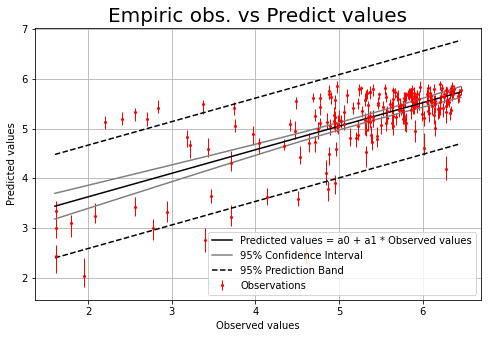

In [25]:
# Building linear a graph and calculation uncertainties

# retrieve parameter values
a0 = popt[0]
a1 = popt[1]

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
index_a0 = str(a0).find('+/-')
index_a1 = str(a1).find('+/-')
am_a0 = str(a0)[0:index_a0]
ci_a0 = str(a0)[index_a0+3:]
am_a1 = str(a1)[0:index_a1]
ci_a1 = str(a1)[index_a1+3:]

print('Uncertainty')
print(f'a0: {am_a0}+/-{round(float(ci_a0)*(n_all_y/n_stat_y)**0.5, 3)}')
print(f'a1: {am_a1}+/-{round(float(ci_a1)*(n_all_y/n_stat_y)**0.5, 3)}')

# plot data
plt.figure(figsize =(8, 5))
plt.errorbar(stat_y[predictor]['mean'], stat_y[0]['50%'], yerr=[list(l_sd_y_pred), list(t_sd_y_pred)], c = 'red', fmt='o', lw=1, ms=2, label='Observations')
plt.yscale('linear')

# calculate regression confidence interval
px = np.linspace(1.6, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std * (n_all_y**0.5)/(n_stat_y**0.5), c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std * (n_all_y**0.5)/(n_stat_y**0.5), c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

# Uncertainty parameters and confidence intervals

In [23]:
# Intermedia ratio for calculation CI
CIR = 2/((n_test + n_train)/n_test)**0.5

In [26]:
# Statistic for SHAP-values

number_iteration = len(aggr_Shap_values.groupby(['Feature']))
shap_list = aggr_Shap_values.groupby(['Feature'])


for i in range(number_iteration):
    itr_mean = round(np.mean(list(shap_list)[i][1].iloc[0:, 1]), 3)
    itr_Q50 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.50), 3)
    itr_Q16 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.16), 3)
    itr_Q84 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.84), 3)
    itr_l = (itr_Q50 - itr_Q16)*CIR
    l_CI = itr_Q50 - itr_l
    itr_t = (itr_Q84 - itr_Q50)*CIR
    t_CI = itr_Q50 + itr_t    
    print(f"SHAP-values for: {list(shap_list)[i][0]}: mean - {itr_mean}, median - {itr_Q50}, CI - [{round(l_CI, 3)}-{round(t_CI, 3)}]\n")        

SHAP-values for: r2020B01: mean - 0.173, median - 0.172, CI - [0.151-0.196]

SHAP-values for: r2020B03: mean - 0.094, median - 0.094, CI - [0.079-0.108]

SHAP-values for: r2020B05: mean - 0.107, median - 0.106, CI - [0.091-0.122]

SHAP-values for: r2020B06: mean - 0.104, median - 0.104, CI - [0.09-0.118]

SHAP-values for: r2020B07: mean - 0.055, median - 0.056, CI - [0.045-0.065]

SHAP-values for: r2020B10: mean - 0.08, median - 0.08, CI - [0.067-0.094]

SHAP-values for: r2020B11: mean - 0.124, median - 0.125, CI - [0.108-0.142]



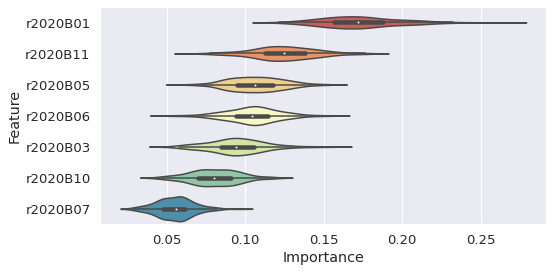

In [30]:
sns.set(font_scale=1.2)
sns.violinplot(x="Importance", y="Feature", data=aggr_Shap_values, inner="box", palette="Spectral", order=['r2020B01', 'r2020B11', 'r2020B05', 'r2020B06', 'r2020B03', 'r2020B10', 'r2020B07'])
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

In [31]:
# Aggregate stat
# optimal number of iterations
aggr_optimal_n_mean = np.mean(aggr_optimal_n)
aggr_optimal_n_Q025 = np.quantile(aggr_optimal_n, 0.025)
aggr_optimal_n_Q16 = np.quantile(aggr_optimal_n, 0.16)
aggr_optimal_n_Q50 = np.quantile(aggr_optimal_n, 0.50)
aggr_optimal_n_Q84 = np.quantile(aggr_optimal_n, 0.84)
aggr_optimal_n_Q975 = np.quantile(aggr_optimal_n, 0.975)

# bias
aggr_bias_mean = np.mean(aggr_bias)
aggr_bias_Q025 = np.quantile(aggr_bias, 0.025)
aggr_bias_Q16 = np.quantile(aggr_bias, 0.16)
aggr_bias_Q50 = np.quantile(aggr_bias, 0.50)
aggr_bias_Q84 = np.quantile(aggr_bias, 0.84)
aggr_bias_Q975 = np.quantile(aggr_bias, 0.975)

aggr_rel_bias_mean = np.mean(aggr_rel_bias)
aggr_rel_bias_Q025 = np.quantile(aggr_rel_bias, 0.025)
aggr_rel_bias_Q16 = np.quantile(aggr_rel_bias, 0.16)
aggr_rel_bias_Q50 = np.quantile(aggr_rel_bias, 0.50)
aggr_rel_bias_Q84 = np.quantile(aggr_rel_bias, 0.84)
aggr_rel_bias_Q975 = np.quantile(aggr_rel_bias, 0.975)

# RMSE
aggr_rmse_mean = np.mean(aggr_rmse)
aggr_rmse_Q025 = np.quantile(aggr_rmse, 0.025)
aggr_rmse_Q16 = np.quantile(aggr_rmse, 0.16)
aggr_rmse_Q50 = np.quantile(aggr_rmse, 0.50)
aggr_rmse_Q84 = np.quantile(aggr_rmse, 0.84)
aggr_rmse_Q975 = np.quantile(aggr_rmse, 0.975)

aggr_rel_rmse_mean = np.mean(aggr_rel_rmse)
aggr_rel_rmse_Q025 = np.quantile(aggr_rel_rmse, 0.025)
aggr_rel_rmse_Q16 = np.quantile(aggr_rel_rmse, 0.16)
aggr_rel_rmse_Q50 = np.quantile(aggr_rel_rmse, 0.50)
aggr_rel_rmse_Q84 = np.quantile(aggr_rel_rmse, 0.84)
aggr_rel_rmse_Q975 = np.quantile(aggr_rel_rmse, 0.975)

# MSE
aggr_mse_mean = np.mean(aggr_mse)
aggr_mse_Q025 = np.quantile(aggr_mse, 0.025)
aggr_mse_Q16 = np.quantile(aggr_mse, 0.16)
aggr_mse_Q50 = np.quantile(aggr_mse, 0.50)
aggr_mse_Q84 = np.quantile(aggr_mse, 0.84)
aggr_mse_Q975 = np.quantile(aggr_mse, 0.975)

# R-square
aggr_R_square_mean = np.mean(aggr_R_square)
aggr_R_square_Q025 = np.quantile(aggr_R_square, 0.025)
aggr_R_square_Q16 = np.quantile(aggr_R_square, 0.16)
aggr_R_square_Q50 = np.quantile(aggr_R_square, 0.50)
aggr_R_square_Q84 = np.quantile(aggr_R_square, 0.84)
aggr_R_square_Q975 = np.quantile(aggr_R_square, 0.975)

# exp_bias
exp_aggr_bias_mean = np.mean(exp_aggr_bias)
exp_aggr_bias_Q025 = np.quantile(exp_aggr_bias, 0.025)
exp_aggr_bias_Q16 = np.quantile(exp_aggr_bias, 0.16)
exp_aggr_bias_Q50 = np.quantile(exp_aggr_bias, 0.50)
exp_aggr_bias_Q84 = np.quantile(exp_aggr_bias, 0.84)
exp_aggr_bias_Q975 = np.quantile(exp_aggr_bias, 0.975)

exp_aggr_rel_bias_mean = np.mean(exp_aggr_rel_bias)
exp_aggr_rel_bias_Q025 = np.quantile(exp_aggr_rel_bias, 0.025)
exp_aggr_rel_bias_Q16 = np.quantile(exp_aggr_rel_bias, 0.16)
exp_aggr_rel_bias_Q50 = np.quantile(exp_aggr_rel_bias, 0.50)
exp_aggr_rel_bias_Q84 = np.quantile(exp_aggr_rel_bias, 0.84)
exp_aggr_rel_bias_Q975 = np.quantile(exp_aggr_rel_bias, 0.975)

# exp_RMSE
exp_aggr_rmse_mean = np.mean(exp_aggr_rmse)
exp_aggr_rmse_Q025 = np.quantile(exp_aggr_rmse, 0.025)
exp_aggr_rmse_Q16 = np.quantile(exp_aggr_rmse, 0.16)
exp_aggr_rmse_Q50 = np.quantile(exp_aggr_rmse, 0.50)
exp_aggr_rmse_Q84 = np.quantile(exp_aggr_rmse, 0.84)
exp_aggr_rmse_Q975 = np.quantile(exp_aggr_rmse, 0.975)

exp_aggr_rel_rmse_mean = np.mean(exp_aggr_rel_rmse)
exp_aggr_rel_rmse_Q025 = np.quantile(exp_aggr_rel_rmse, 0.025)
exp_aggr_rel_rmse_Q16 = np.quantile(exp_aggr_rel_rmse, 0.16)
exp_aggr_rel_rmse_Q50 = np.quantile(exp_aggr_rel_rmse, 0.50)
exp_aggr_rel_rmse_Q84 = np.quantile(exp_aggr_rel_rmse, 0.84)
exp_aggr_rel_rmse_Q975 = np.quantile(exp_aggr_rel_rmse, 0.975)

# exp_MSE
exp_aggr_mse_mean = np.mean(exp_aggr_mse)
exp_aggr_mse_Q025 = np.quantile(exp_aggr_mse, 0.025)
exp_aggr_mse_Q16 = np.quantile(exp_aggr_mse, 0.16)
exp_aggr_mse_Q50 = np.quantile(exp_aggr_mse, 0.50)
exp_aggr_mse_Q84 = np.quantile(exp_aggr_mse, 0.84)
exp_aggr_mse_Q975 = np.quantile(exp_aggr_mse, 0.975)

# exp_R-square
exp_aggr_R_square_mean = np.mean(exp_aggr_R_square)
exp_aggr_R_square_Q025 = np.quantile(exp_aggr_R_square, 0.025)
exp_aggr_R_square_Q16 = np.quantile(exp_aggr_R_square, 0.16)
exp_aggr_R_square_Q50 = np.quantile(exp_aggr_R_square, 0.50)
exp_aggr_R_square_Q84 = np.quantile(exp_aggr_R_square, 0.84)
exp_aggr_R_square_Q975 = np.quantile(exp_aggr_R_square, 0.975)

In [32]:
# Output calculated stat
print("Logarithmically transformed predictive values:")
print(f"Aggregate optimal number of iterations statistic: \n mean: {round(aggr_optimal_n_mean, 3)}, median: {round(aggr_optimal_n_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_optimal_n_Q025, 3)}-{round(aggr_optimal_n_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_optimal_n_Q50-((aggr_optimal_n_Q50-aggr_optimal_n_Q16)*CIR), 3)}-{round(aggr_optimal_n_Q50+((aggr_optimal_n_Q84-aggr_optimal_n_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias statistic: \n mean: {round(aggr_bias_mean, 3)}, median: {round(aggr_bias_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_bias_Q025, 3)}-{round(aggr_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_bias_Q50-((aggr_bias_Q50-aggr_bias_Q16)*CIR), 3)}-{round(aggr_bias_Q50+((aggr_bias_Q84-aggr_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE statistic: \n mean: {round(aggr_rmse_mean, 3)}, median: {round(aggr_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rmse_Q025, 3)}-{round(aggr_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rmse_Q50-((aggr_rmse_Q50-aggr_rmse_Q16)*CIR), 3)}-{round(aggr_rmse_Q50+((aggr_rmse_Q84-aggr_rmse_Q50)*CIR), 3)} \n***")
print(f"Aggregate MSE statistic: \n mean: {round(aggr_mse_mean, 3)}, median: {round(aggr_mse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_mse_Q025, 3)}-{round(aggr_mse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_mse_Q50-((aggr_mse_Q50-aggr_mse_Q16)*CIR), 3)}-{round(aggr_mse_Q50+((aggr_mse_Q84-aggr_mse_Q50)*CIR), 3)} \n***")
print(f"Aggregate R^2 statistic: \n mean: {round(aggr_R_square_mean, 3)}, median: {round(aggr_R_square_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_R_square_Q025, 3)}-{round(aggr_R_square_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_R_square_Q50-((aggr_R_square_Q50-aggr_R_square_Q16)*CIR), 3)}-{round(aggr_R_square_Q50+((aggr_R_square_Q84-aggr_R_square_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias(%) statistic: \n mean: {round(aggr_rel_bias_mean, 3)}, median: {round(aggr_rel_bias_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_bias_Q025, 3)}-{round(aggr_rel_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_bias_Q50-((aggr_rel_bias_Q50-aggr_rel_bias_Q16)*CIR), 3)}-{round(aggr_rel_bias_Q50+((aggr_rel_bias_Q84-aggr_rel_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE(%) statistic: \n mean: {round(aggr_rel_rmse_mean, 3)}, median: {round(aggr_rel_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_rmse_Q025, 3)}-{round(aggr_rel_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_rmse_Q50-((aggr_rel_rmse_Q50-aggr_rel_rmse_Q16)*CIR), 3)}-{round(aggr_rel_rmse_Q50+((aggr_rel_rmse_Q84-aggr_rel_rmse_Q50)*CIR), 3)} \n***")

print("\nTransformed predictive values into the primary state:")
print(f"Aggregate bias statistic: \n mean: {round(exp_aggr_bias_mean, 3)}, median: {round(exp_aggr_bias_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_bias_Q025, 3)}-{round(exp_aggr_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_bias_Q50-((exp_aggr_bias_Q50-exp_aggr_bias_Q16)*CIR), 3)}-{round(exp_aggr_bias_Q50+((exp_aggr_bias_Q84-exp_aggr_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE statistic: \n mean: {round(exp_aggr_rmse_mean, 3)}, median: {round(exp_aggr_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_rmse_Q025, 3)}-{round(exp_aggr_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_rmse_Q50-((exp_aggr_rmse_Q50-exp_aggr_rmse_Q16)*CIR), 3)}-{round(exp_aggr_rmse_Q50+((exp_aggr_rmse_Q84-exp_aggr_rmse_Q50)*CIR), 3)} \n***")
print(f"Aggregate MSE statistic: \n mean: {round(exp_aggr_mse_mean, 3)}, median: {round(exp_aggr_mse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_mse_Q025, 3)}-{round(exp_aggr_mse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_mse_Q50-((exp_aggr_mse_Q50-exp_aggr_mse_Q16)*CIR), 3)}-{round(exp_aggr_mse_Q50+((exp_aggr_mse_Q84-exp_aggr_mse_Q50)*CIR), 3)} \n***")
print(f"Aggregate R^2 statistic: \n mean: {round(exp_aggr_R_square_mean, 3)}, median: {round(exp_aggr_R_square_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_R_square_Q025, 3)}-{round(exp_aggr_R_square_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_R_square_Q50-((exp_aggr_R_square_Q50-exp_aggr_R_square_Q16)*CIR), 3)}-{round(exp_aggr_R_square_Q50+((exp_aggr_R_square_Q84-exp_aggr_R_square_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias(%) statistic: \n mean: {round(exp_aggr_rel_bias_mean, 3)}, median: {round(exp_aggr_rel_bias_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_rel_bias_Q025, 3)}-{round(exp_aggr_rel_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_rel_bias_Q50-((exp_aggr_rel_bias_Q50-exp_aggr_rel_bias_Q16)*CIR), 3)}-{round(exp_aggr_rel_bias_Q50+((exp_aggr_rel_bias_Q84-exp_aggr_rel_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE(%) statistic: \n mean: {round(exp_aggr_rel_rmse_mean, 3)}, median: {round(exp_aggr_rel_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_rel_rmse_Q025, 3)}-{round(exp_aggr_rel_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_rel_rmse_Q50-((exp_aggr_rel_rmse_Q50-exp_aggr_rel_rmse_Q16)*CIR), 3)}-{round(exp_aggr_rel_rmse_Q50+((exp_aggr_rel_rmse_Q84-exp_aggr_rel_rmse_Q50)*CIR), 3)} \n***")

Logarithmically transformed predictive values:
Aggregate optimal number of iterations statistic: 
 mean: 82.155, median: 85.0,
 pred. interval (P(0.025)-P(0.975)): 53.975-91.0, 
 conf. interval (p-value=0.95): 75.112-90.394 
***
Aggregate bias statistic: 
 mean: -0.082, median: -0.09,
 pred. interval (P(0.025)-P(0.975)): -0.32-0.134, 
 conf. interval (p-value=0.95): -0.18-0.021 
***
Aggregate RMSE statistic: 
 mean: 0.776, median: 0.779, pred. interval (P(0.025)-P(0.975)): 0.555-1.031, 
 conf. interval (p-value=0.95): 0.666-0.879 
***
Aggregate MSE statistic: 
 mean: 0.616, median: 0.607, pred. interval (P(0.025)-P(0.975)): 0.308-1.063, 
 conf. interval (p-value=0.95): 0.446-0.775 
***
Aggregate R^2 statistic: 
 mean: 0.448, median: 0.469, pred. interval (P(0.025)-P(0.975)): 0.05-0.698, 
 conf. interval (p-value=0.95): 0.3-0.596 
***
Aggregate bias(%) statistic: 
 mean: -1.519, median: -1.742, pred. interval (P(0.025)-P(0.975)): -5.902-2.675, 
 conf. interval (p-value=0.95): -3.369-0.4

# Analysis of residuals distributions dependents on empirical values of predicted parameter

Text(0.5, 1.0, 'In typical state')

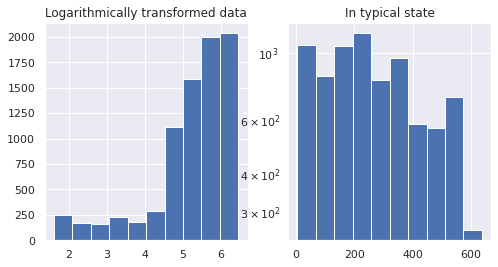

In [33]:
# Preprocessing
results_y['T_exp_empiric'] = np.exp(results_y[predictor])
results_y['T_exp_pred'] = np.exp(results_y[0])

results_y['ln_residuals'] = results_y[predictor] - results_y[0]
results_y['T_exp_residuals'] = results_y['T_exp_empiric'] - results_y['T_exp_pred']
results_y['ln_residuals_%'] =  results_y['ln_residuals'] / results_y[predictor] * 100
results_y['T_exp_residuals_%'] = results_y['T_exp_residuals'] / results_y['T_exp_empiric'] * 100

# plt.hist(results_y[predictor])
# plt.hist(results_y[predictor])
fig, axs = plt.subplots(1, 2)
axs[0].hist(results_y[predictor])
axs[0].set_title('Logarithmically transformed data')
axs[1].hist(results_y['T_exp_empiric'], log=True)
axs[1].set_title('In typical state')
# plt.show() 

In [34]:
# INPORTANT  - added your intervals
ln_intervals = pd.cut(results_y[predictor], [1, 2, 3, 4, 5, 6])
T_exp_intervals = pd.cut(results_y['T_exp_empiric'], [0, 10, 50, 100, 200, 600])

ln_grouped = results_y.groupby(ln_intervals)
T_exp_grouped = results_y.groupby(T_exp_intervals) 

max_obs_in_group = len(results_y)    
    
pre_ln = pd.DataFrame()
pre_T_exp = pd.DataFrame()
pre_rel_ln = pd.DataFrame()
pre_rel_T_exp = pd.DataFrame()

pre_ln = pre_ln.assign(row_number=range(max_obs_in_group))
pre_T_exp = pre_T_exp.assign(row_number=range(max_obs_in_group))
pre_rel_ln = pre_rel_ln.assign(row_number=range(max_obs_in_group))
pre_rel_T_exp = pre_rel_T_exp.assign(row_number=range(max_obs_in_group))

for i in range(len(list(ln_grouped))):
    pre_ln[list(ln_grouped)[i][0]] = pd.Series(list(ln_grouped)[i][1]['ln_residuals'])
    pre_rel_ln[list(ln_grouped)[i][0]] = pd.Series(list(ln_grouped)[i][1]['ln_residuals_%'])

for i in range(len(list(T_exp_grouped))):
    pre_T_exp[list(T_exp_grouped)[i][0]] = pd.Series(list(T_exp_grouped)[i][1]['T_exp_residuals'])
    pre_rel_T_exp[list(T_exp_grouped)[i][0]] = pd.Series(list(T_exp_grouped)[i][1]['T_exp_residuals_%'])

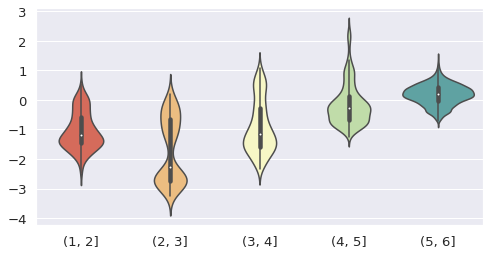

In [35]:
# Plots of residuals versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_ln[list(pre_ln.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

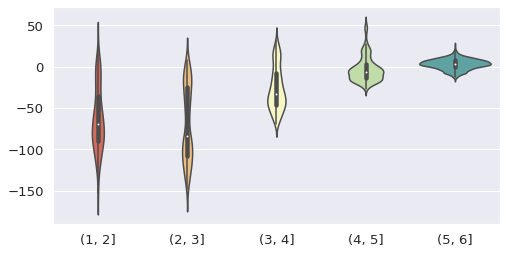

In [36]:
# Plots of relative residuals (in %) versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_rel_ln[(pre_rel_ln.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

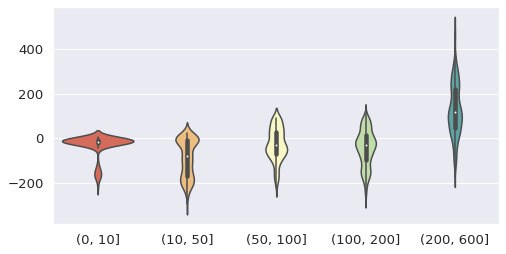

In [37]:
# Plots of residuals versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_T_exp[list(pre_T_exp.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

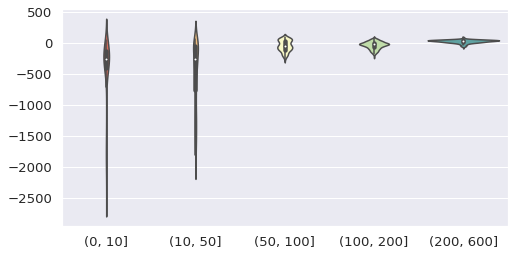

In [38]:
# Plots of relative residuals (in %) versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_rel_T_exp[(pre_rel_T_exp.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

# ***Creating final XGBoost model using all obs. for its training***

In [39]:
# Generate test and training samples
f_X_train = X
f_y_train = y

In [40]:
# Implementation of the scikit-learn API for XGBoost regression
f_xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])

In [41]:
# Fitting the model 
f_xgb_model.fit(f_X_train, f_y_train, early_stopping_rounds=20, eval_set=[(f_X_train, f_y_train)])
# learning dynamics
f_y_pred = f_xgb_model.predict(f_X_train, ntree_limit=f_xgb_model.best_ntree_limit)

[0]	validation_0-rmse:4.62274
[1]	validation_0-rmse:4.39296
[2]	validation_0-rmse:4.17485
[3]	validation_0-rmse:3.97606
[4]	validation_0-rmse:3.78289
[5]	validation_0-rmse:3.60190
[6]	validation_0-rmse:3.43840
[7]	validation_0-rmse:3.28160
[8]	validation_0-rmse:3.12769


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:2.99059
[10]	validation_0-rmse:2.85539
[11]	validation_0-rmse:2.71982
[12]	validation_0-rmse:2.59194
[13]	validation_0-rmse:2.47922
[14]	validation_0-rmse:2.36588
[15]	validation_0-rmse:2.26230
[16]	validation_0-rmse:2.15724
[17]	validation_0-rmse:2.05686
[18]	validation_0-rmse:1.97021
[19]	validation_0-rmse:1.88769
[20]	validation_0-rmse:1.80598
[21]	validation_0-rmse:1.73578
[22]	validation_0-rmse:1.65944
[23]	validation_0-rmse:1.59139
[24]	validation_0-rmse:1.52909
[25]	validation_0-rmse:1.46984
[26]	validation_0-rmse:1.41622
[27]	validation_0-rmse:1.36399
[28]	validation_0-rmse:1.31552
[29]	validation_0-rmse:1.27020
[30]	validation_0-rmse:1.22840
[31]	validation_0-rmse:1.18459
[32]	validation_0-rmse:1.14398
[33]	validation_0-rmse:1.11303
[34]	validation_0-rmse:1.07831
[35]	validation_0-rmse:1.04807
[36]	validation_0-rmse:1.02032
[37]	validation_0-rmse:0.98634
[38]	validation_0-rmse:0.96270
[39]	validation_0-rmse:0.93657
[40]	validation_0-rmse:0.91666
[41]	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [42]:
# Iteration with the best result
f_optimal_n = f_xgb_model.best_ntree_limit-1
print("The best iteration: " + str(f_optimal_n))    

The best iteration: 91


In [43]:
# Preparing data for building a learning graph
f_results = f_xgb_model.evals_result()

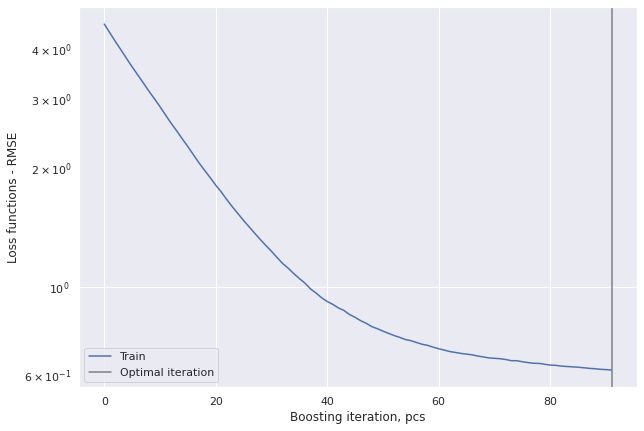

In [44]:
# Learning curves for the XGBoost model 
plt.figure(figsize=(10,7))
plt.yscale("log")
plt.plot(f_results['validation_0']['rmse'], label='Train')
plt.axvline(f_optimal_n, color="gray", label="Optimal iteration")
plt.xlabel("Boosting iteration, pcs")
plt.ylabel("Loss functions - RMSE")
plt.legend()

# Estimation of a final XGBoost model

In [45]:
# Convert data to 'array' type
f_conv_y_pred = pd.DataFrame(f_y_pred) # Double transformation
f_y_pred2 = f_conv_y_pred.values
f_y_train2 = f_y_train.values

# Intermediate results
f_n_sample = len(f_y_pred2)
f_main_sample = f_y_train.sum() / f_n_sample

# Calculation of bias
f_diff = f_y_pred2 - f_y_train2
f_bias = f_diff.sum()/f_n_sample
print('Bias: %.1f' % (f_bias))
print("Relative bias(%):", " %.2f" % (f_bias/f_main_sample*100))

# Calculation of RMSE
f_rmse = np.sqrt(mean_squared_error(f_y_train, f_y_pred))
print("RMSE: %.1f" % (f_rmse))
print("Relative RMSE(%):", " %.3f" % (f_rmse/f_main_sample*100))

# Calculation of MSE
f_mse = mean_squared_error(f_y_train, f_y_pred)
print("MSE: %.1f" % (f_mse))

# Calculation of Square R
f_R_square = r2_score(f_y_train, f_y_pred)
print("R square: %.1f%%" % (f_R_square * 100.0))

Bias: -0.0
Relative bias(%):  -0.71
RMSE: 0.6
Relative RMSE(%):  11.735
MSE: 0.4
R square: 68.1%


In [46]:
# Convert input data
f_x_train_conv = np.array(f_y_train)
f_x_train_convert = np.array([None]*f_n_sample)
for i in range(f_n_sample):
    f_x_train_convert[i] = float(f_x_train_conv[i])

x_plot = f_x_train_convert
y_plot = f_y_pred
n = len(y_plot)

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

R^2: 0.692
Uncertainty
a0: 2.01+/-0.16
a1: 0.610+/-0.029


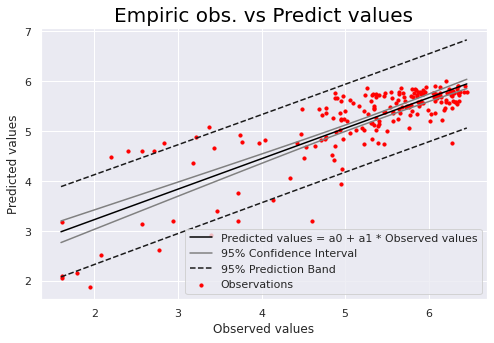

In [49]:
# Building linear a graph and calculation uncertainties

# retrieve parameter values
a0 = popt[0]
a1 = popt[1]

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
print('Uncertainty')
print('a0: ' + str(a0))
print('a1: ' + str(a1))

# plot data
plt.figure(figsize =(8, 5))
plt.scatter(x_plot, y_plot, s = 10, c = 'red', label='Observations', marker = 'o')
plt.yscale('linear')

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

# calculate regression confidence interval
px = np.linspace(1.6, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std, c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std, c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

# ***Analisys output final model***

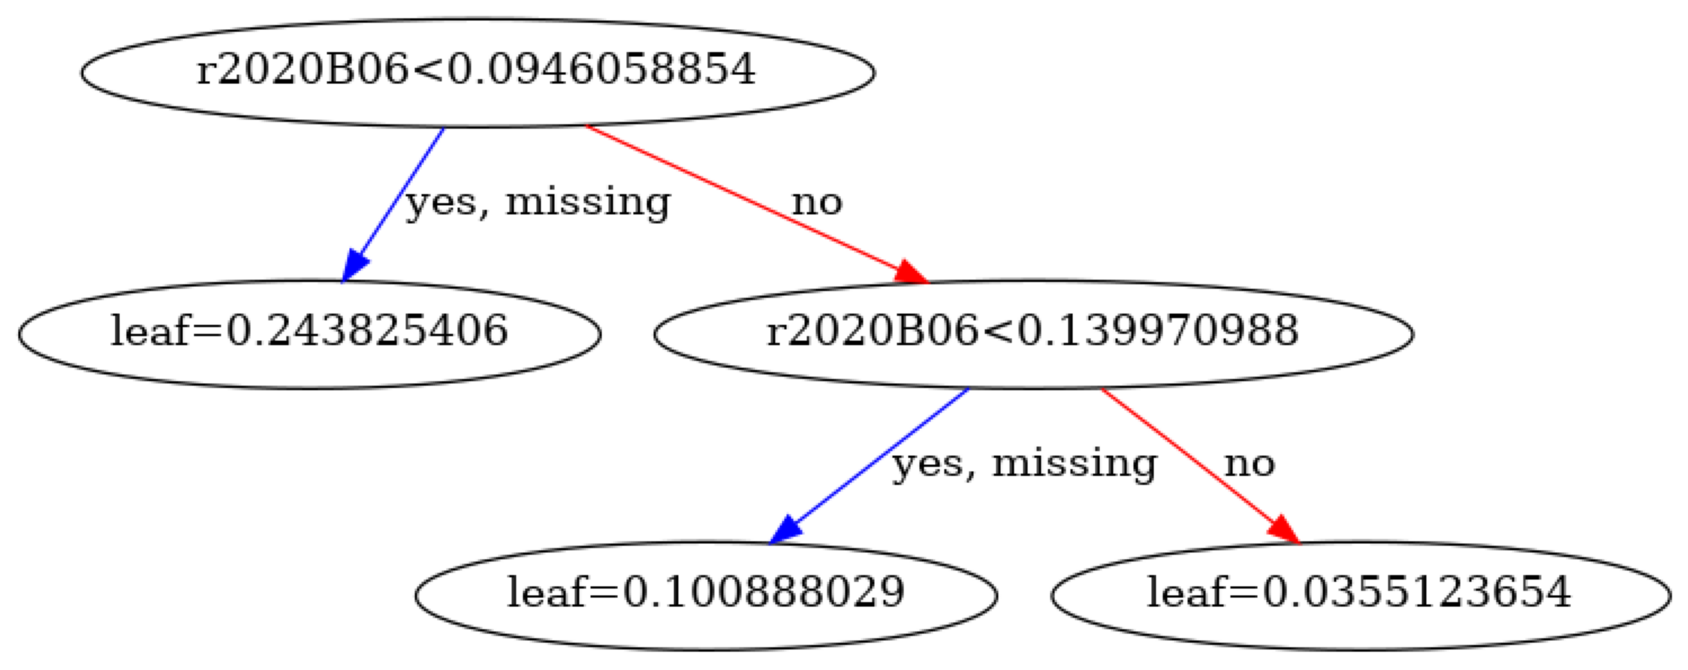

In [55]:
# Visualize the Decision tree (individual obs.)
xgb.plot_tree(f_xgb_model, num_trees=1) # "num_trees" is number of obs.
plt.rcParams['figure.figsize'] = [30, 45]
plt.show()

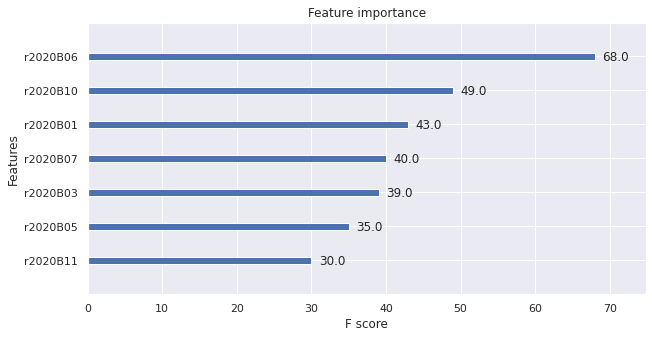

In [57]:
# Importance is calculated as: ”weight” is the number of times a feature appears in a trees
xgb.plot_importance(f_xgb_model, importance_type='weight')
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

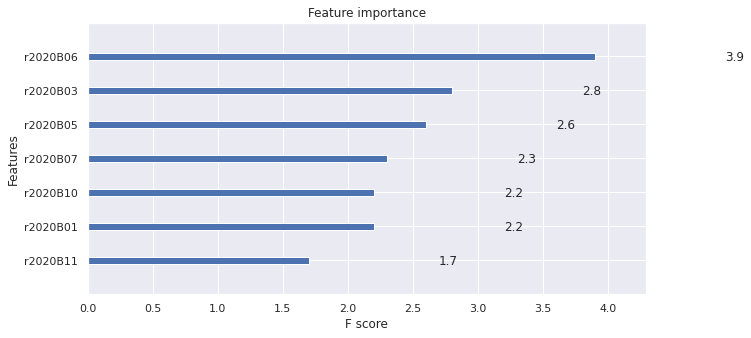

In [58]:
# Importance is calculated as: ”gain” is the average gain of splits which use the feature
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="gain")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key], 1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='gain', show_values=True)

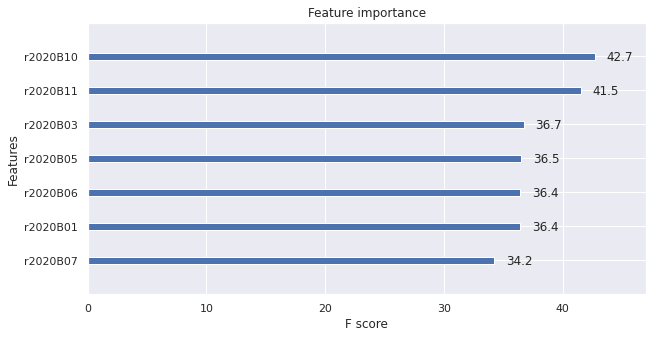

In [59]:
# Importance is calculated as: "cover” is the average coverage of splits which use the feature where coverage is defined as the number of samples affected by the split
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="cover")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key],1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='cover', show_values=True)

# Est. of SHAP values for final models

In [60]:
# Сreate an уxplainer object
explainer = shap.TreeExplainer(f_xgb_model)
shap_values = explainer.shap_values(f_X_train)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


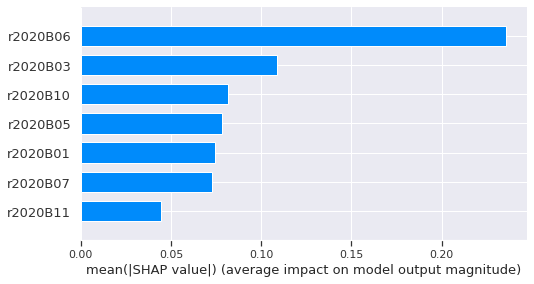

In [61]:
# Mean absolute value of the SHAP values for each feature 
shap.summary_plot(shap_values, f_X_train, plot_type="bar")

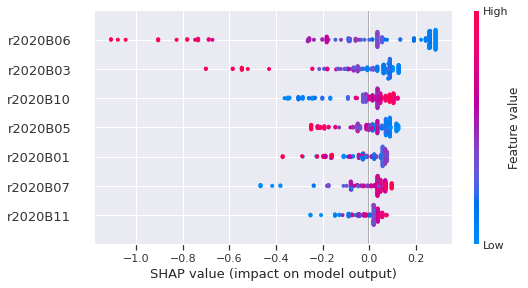

In [62]:
# Graph that summarises the effects of all the features
shap.summary_plot(shap_values, f_X_train)

invalid value encountered in true_divide
invalid value encountered in true_divide


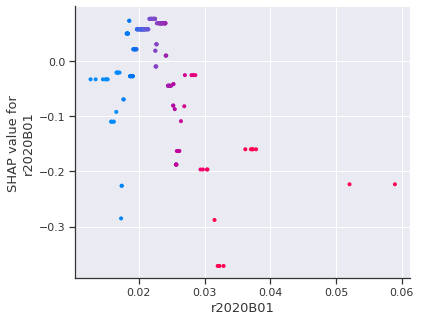

invalid value encountered in true_divide
invalid value encountered in true_divide


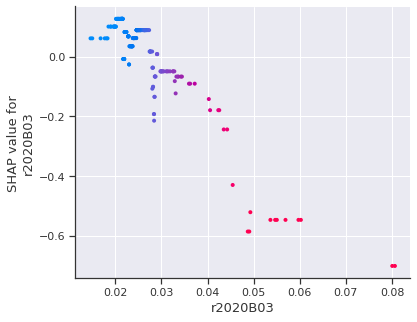

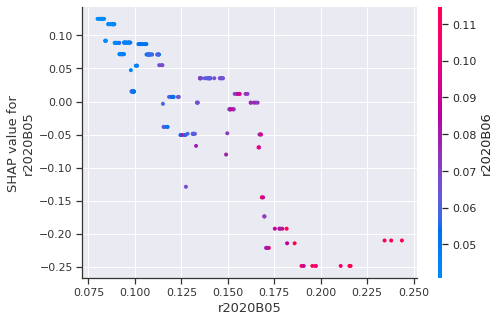

invalid value encountered in true_divide
invalid value encountered in true_divide


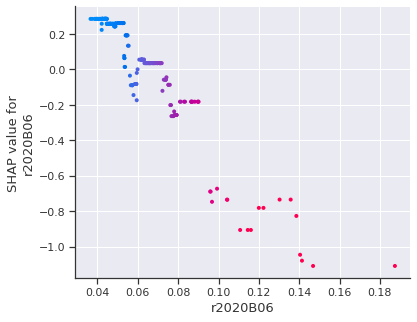

invalid value encountered in true_divide
invalid value encountered in true_divide


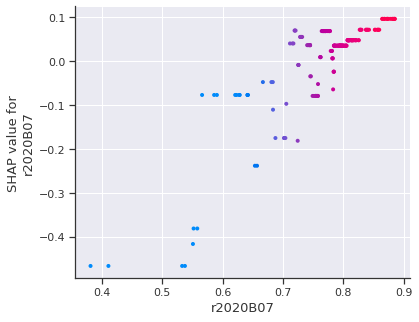

invalid value encountered in true_divide
invalid value encountered in true_divide


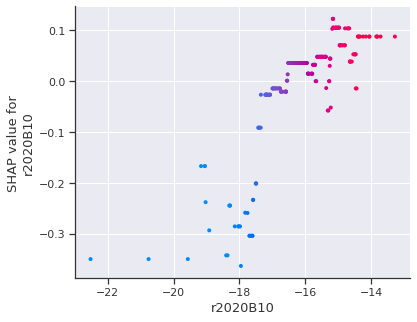

invalid value encountered in true_divide
invalid value encountered in true_divide


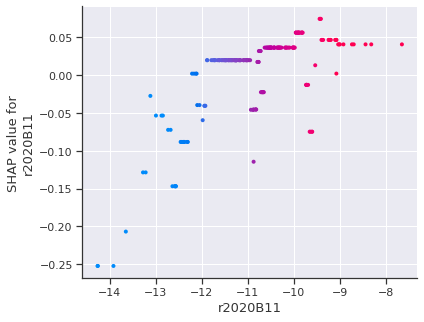

In [63]:
# Create a dependence scatter plot to show the effect of a single feature across the whole dataset
for name in X_train.columns:
    shap.dependence_plot(name, shap_values, f_X_train, color=shap_values)

# *Save XGBoost model*

In [64]:
# Save to JSON
f_xgb_model.save_model("../05_output_data/XGBoost_models/06_LN_GS_SENTINEL_2020_XGB_model.json")
# Save to text format
f_xgb_model.save_model("../05_output_data/XGBoost_models/06_LN_GS_SENTINEL_2020_XGB_model.txt")